In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

All the simulations here analyzed are executed on a virtual machine with the following characteristics:
- Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz (16 cores)
- 32 GB memory
- Concurrency = 10 parallel simulations
- Max duration of a single simulation = 10 minutes

Each configuration (i.e., each point plotted in the next figures) requires less than 2 minutes to be simulated. The total simulation time for each architecture is shown in every section of this notebook.

# Figure 2

Time required to simulate:
- the centralized architecture = ~20 minutes
- the semi-distributed architecture = ~15 minutes
- the fully-distributed architecture = ~13 minutes

In [2]:
df = pd.read_csv('./figure2/results/slidingDoor_centralizedDecision_varChangePolicy/slidingDoor_centralizedDecision_collectResults.csv')
df.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
df.drop(list(df.filter(regex = 'reqB')), axis=1, inplace=True)
df['p_openDoor'] = df['S_door_closing'] / (df['S_door_opening'] + df['S_door_closing'])
df.sort_values(by=['p_openDoor'], inplace=True)

In [3]:
#############
### Robot ###
#############

#df['R_robot_choosing_mean']
#df['R_robot_delivered_mean']

COMM_COST = 1

###### Mean values ######
#Compute the probability of each path
df['X_robot_A_mean'] = df['X_robot_goFast_A_mean'] + df['X_robot_goSlow_A_mean']
df['pRobot_fastSucc_A_mean'] = df['X_robot_success_A_mean'] / df['X_robot_A_mean']
df['pRobot_fastFail_A_mean'] = df['X_robot_fail_A_mean'] / df['X_robot_A_mean']
df['pRobot_slow_A_mean'] = df['X_robot_goSlow_A_mean'] / df['X_robot_A_mean']
df['X_robot_R_mean'] = df['X_robot_goFast_R_mean'] + df['X_robot_goSlow_R_mean']
df['pRobot_fastSucc_R_mean'] = df['X_robot_success_R_mean'] / df['X_robot_R_mean']
df['pRobot_fastFail_R_mean'] = df['X_robot_fail_R_mean'] / df['X_robot_R_mean']
df['pRobot_slow_R_mean'] = df['X_robot_goSlow_R_mean'] / df['X_robot_R_mean']

#Use probabilities for computing the system response time
df['R_robot_A_mean'] = COMM_COST + df['pRobot_fastSucc_A_mean'] * (df['R_robot_reachDoor_A_mean'] + df['R_robot_driveThru_A_mean'] + df['R_robot_driveFwd_A_mean']) + df['pRobot_fastFail_A_mean'] * (df['R_robot_reachDoor_A_mean'] + df['R_robot_driveThru_A_mean'] + df['R_robot_driveBack_A_mean'] + df['R_robot_driveAround_A_mean']) + df['pRobot_slow_A_mean'] * df['R_robot_driveAround_A_mean']
df['R_robot_R_mean'] = COMM_COST + df['pRobot_fastSucc_R_mean'] * (df['R_robot_reachDoor_R_mean'] + df['R_robot_driveThru_R_mean'] + df['R_robot_driveFwd_R_mean']) + df['pRobot_fastFail_R_mean'] * (df['R_robot_reachDoor_R_mean'] + df['R_robot_driveThru_R_mean'] + df['R_robot_driveBack_R_mean'] + df['R_robot_driveAround_R_mean']) + df['pRobot_slow_R_mean'] * df['R_robot_driveAround_R_mean']
df['R_robot_sys_mean'] = df['R_robot_A_mean'] + df['R_robot_R_mean']


###### Lower bound values ######
#Compute the probability of each path
df['X_robot_A_low'] = df['X_robot_goFast_A_low'] + df['X_robot_goSlow_A_low']
df['pRobot_fastSucc_A_low'] = df['X_robot_success_A_low'] / df['X_robot_A_low']
df['pRobot_fastFail_A_low'] = df['X_robot_fail_A_low'] / df['X_robot_A_low']
df['pRobot_slow_A_low'] = df['X_robot_goSlow_A_low'] / df['X_robot_A_low']
df['X_robot_R_low'] = df['X_robot_goFast_R_low'] + df['X_robot_goSlow_R_low']
df['pRobot_fastSucc_R_low'] = df['X_robot_success_R_low'] / df['X_robot_R_low']
df['pRobot_fastFail_R_low'] = df['X_robot_fail_R_low'] / df['X_robot_R_low']
df['pRobot_slow_R_low'] = df['X_robot_goSlow_R_low'] / df['X_robot_R_low']

#Use probabilities for computing the system response time
df['R_robot_A_low'] = COMM_COST + df['pRobot_fastSucc_A_low'] * (df['R_robot_reachDoor_A_low'] + df['R_robot_driveThru_A_low'] + df['R_robot_driveFwd_A_low']) + df['pRobot_fastFail_A_low'] * (df['R_robot_reachDoor_A_low'] + df['R_robot_driveThru_A_low'] + df['R_robot_driveBack_A_low'] + df['R_robot_driveAround_A_low']) + df['pRobot_slow_A_low'] * df['R_robot_driveAround_A_low']
df['R_robot_R_low'] = COMM_COST + df['pRobot_fastSucc_R_low'] * (df['R_robot_reachDoor_R_low'] + df['R_robot_driveThru_R_low'] + df['R_robot_driveFwd_R_low']) + df['pRobot_fastFail_R_low'] * (df['R_robot_reachDoor_R_low'] + df['R_robot_driveThru_R_low'] + df['R_robot_driveBack_R_low'] + df['R_robot_driveAround_R_low']) + df['pRobot_slow_R_low'] * df['R_robot_driveAround_R_low']
df['R_robot_sys_low'] = df['R_robot_A_low'] + df['R_robot_R_low']


###### Upper bound values ######
#Compute the probability of each path
df['X_robot_A_up'] = df['X_robot_goFast_A_up'] + df['X_robot_goSlow_A_up']
df['pRobot_fastSucc_A_up'] = df['X_robot_success_A_up'] / df['X_robot_A_up']
df['pRobot_fastFail_A_up'] = df['X_robot_fail_A_up'] / df['X_robot_A_up']
df['pRobot_slow_A_up'] = df['X_robot_goSlow_A_up'] / df['X_robot_A_up']
df['X_robot_R_up'] = df['X_robot_goFast_R_up'] + df['X_robot_goSlow_R_up']
df['pRobot_fastSucc_R_up'] = df['X_robot_success_R_up'] / df['X_robot_R_up']
df['pRobot_fastFail_R_up'] = df['X_robot_fail_R_up'] / df['X_robot_R_up']
df['pRobot_slow_R_up'] = df['X_robot_goSlow_R_up'] / df['X_robot_R_up']

#Use probabilities for computing the system response time
df['R_robot_A_up'] = COMM_COST + df['pRobot_fastSucc_A_up'] * (df['R_robot_reachDoor_A_up'] + df['R_robot_driveFwd_A_up']) + df['pRobot_fastFail_A_up'] * (df['R_robot_reachDoor_A_up'] + df['R_robot_driveThru_A_up'] + df['R_robot_driveBack_A_up'] + df['R_robot_driveAround_A_up']) + df['pRobot_slow_A_up'] * df['R_robot_driveAround_A_up']
df['R_robot_R_up'] = COMM_COST + df['pRobot_fastSucc_R_up'] * (df['R_robot_reachDoor_R_up'] + df['R_robot_driveFwd_R_up']) + df['pRobot_fastFail_R_up'] * (df['R_robot_reachDoor_R_up'] + df['R_robot_driveThru_A_up'] + df['R_robot_driveBack_R_up'] + df['R_robot_driveAround_R_up']) + df['pRobot_slow_R_up'] * df['R_robot_driveAround_R_up']
df['R_robot_sys_up'] = df['R_robot_A_up'] + df['R_robot_R_up']

In [4]:
dfSingle = pd.read_csv('./figure2/results/slidingDoor_semiDistrDecision_varArrivals/slidingDoor_semiDistrDecision_collectResults.csv')
dfSingle.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfSingle.drop(list(dfSingle.filter(regex = 'reqB')), axis=1, inplace=True)
dfSingle['p_openDoor'] = dfSingle['S_door_closing'] / (dfSingle['S_door_opening'] + dfSingle['S_door_closing'])
dfSingle.sort_values(by=['p_openDoor'], inplace=True)

In [5]:
#############
### Robot ###
#############


###### Mean values ######
#Compute the probability of each path
dfSingle['X_robot_A_mean'] = dfSingle['X_robot_success_A_mean'] + dfSingle['X_robot_follow_A_mean']
dfSingle['pRobot_fast_A_mean'] = dfSingle['X_robot_success_A_mean'] / dfSingle['X_robot_A_mean']
dfSingle['pRobot_leader_A_mean'] = dfSingle['X_robot_fail_A_mean'] / dfSingle['X_robot_A_mean']
dfSingle['pRobot_slow_A_mean'] = dfSingle['X_robotA_follow_A_mean'] / dfSingle['X_robot_A_mean']
dfSingle['X_robot_R_mean'] = dfSingle['X_robot_success_R_mean'] + dfSingle['X_robot_follow_R_mean']
dfSingle['pRobot_fast_R_mean'] = dfSingle['X_robot_success_R_mean'] / dfSingle['X_robot_R_mean']
dfSingle['pRobot_leader_R_mean'] = dfSingle['X_robot_fail_R_mean'] / dfSingle['X_robot_R_mean']
dfSingle['pRobot_slow_R_mean'] = dfSingle['X_robotR_follow_R_mean'] / dfSingle['X_robot_R_mean']

#Use probabilities for computing the system response time
dfSingle['R_robot_A_mean'] = dfSingle['R_robot_choosing_A_mean'] + dfSingle['pRobot_fast_A_mean'] * (dfSingle['R_robot_reachDoor_A_mean'] + dfSingle['R_robot_driveThru_A_mean'] + dfSingle['R_robot_driveFwd_A_mean']) + dfSingle['pRobot_slow_A_mean'] * (dfSingle['R_robot_reachDoor_A_mean'] + dfSingle['R_robot_driveAround_A_mean']) + dfSingle['pRobot_leader_A_mean'] * (dfSingle['R_robot_reachDoor_A_mean'] + dfSingle['R_robot_driveBack_A_mean'] + dfSingle['R_robot_driveAround_A_mean'] + dfSingle['R_robot_communicate_A_mean'])
dfSingle['R_robot_R_mean'] = dfSingle['R_robot_delivered_mean'] + dfSingle['pRobot_fast_R_mean'] * (dfSingle['R_robot_reachDoor_R_mean'] + dfSingle['R_robot_driveThru_R_mean'] + dfSingle['R_robot_driveFwd_R_mean']) + dfSingle['pRobot_slow_R_mean'] * (dfSingle['R_robot_reachDoor_R_mean'] + dfSingle['R_robot_driveAround_R_mean']) + dfSingle['pRobot_leader_R_mean'] * (dfSingle['R_robot_reachDoor_R_mean'] + dfSingle['R_robot_driveBack_R_mean'] + dfSingle['R_robot_driveAround_R_mean'] + dfSingle['R_robot_communicate_R_mean'])
dfSingle['R_robot_sys_mean'] = dfSingle['R_robot_A_mean'] + dfSingle['R_robot_R_mean']


###### Lower bound values ######
#Compute the probability of each path
dfSingle['X_robot_A_low'] = dfSingle['X_robot_success_A_low'] + dfSingle['X_robot_follow_A_low']
dfSingle['pRobot_fast_A_low'] = dfSingle['X_robot_success_A_low'] / dfSingle['X_robot_A_low']
dfSingle['pRobot_leader_A_low'] = dfSingle['X_robot_fail_A_low'] / dfSingle['X_robot_A_low']
dfSingle['pRobot_slow_A_low'] = dfSingle['X_robotA_follow_A_low'] / dfSingle['X_robot_A_low']
dfSingle['X_robot_R_low'] = dfSingle['X_robot_success_R_low'] + dfSingle['X_robot_follow_R_low']
dfSingle['pRobot_fast_R_low'] = dfSingle['X_robot_success_R_low'] / dfSingle['X_robot_R_low']
dfSingle['pRobot_leader_R_low'] = dfSingle['X_robot_fail_R_low'] / dfSingle['X_robot_R_low']
dfSingle['pRobot_slow_R_low'] = dfSingle['X_robotR_follow_R_low'] / dfSingle['X_robot_R_low']

#Use probabilities for computing the system response time
dfSingle['R_robot_A_low'] = dfSingle['R_robot_choosing_A_low'] + dfSingle['pRobot_fast_A_low'] * (dfSingle['R_robot_reachDoor_A_low'] + dfSingle['R_robot_driveThru_A_low'] + dfSingle['R_robot_driveFwd_A_low']) + dfSingle['pRobot_slow_A_low'] * (dfSingle['R_robot_reachDoor_A_low'] + dfSingle['R_robot_driveAround_A_low']) + dfSingle['pRobot_leader_A_low'] * (dfSingle['R_robot_reachDoor_A_low'] + dfSingle['R_robot_driveBack_A_low'] + dfSingle['R_robot_driveAround_A_low'] + dfSingle['R_robot_communicate_A_low'])
dfSingle['R_robot_R_low'] = dfSingle['R_robot_delivered_low'] + dfSingle['pRobot_fast_R_low'] * (dfSingle['R_robot_reachDoor_R_low'] + dfSingle['R_robot_driveThru_R_low'] + dfSingle['R_robot_driveFwd_R_low']) + dfSingle['pRobot_slow_R_low'] * (dfSingle['R_robot_reachDoor_R_low'] + dfSingle['R_robot_driveAround_R_low']) + dfSingle['pRobot_leader_R_low'] * (dfSingle['R_robot_reachDoor_R_low'] + dfSingle['R_robot_driveBack_R_low'] + dfSingle['R_robot_driveAround_R_low'] + dfSingle['R_robot_communicate_R_low'])
dfSingle['R_robot_sys_low'] = dfSingle['R_robot_A_low'] + dfSingle['R_robot_R_low']


###### Upper bound values ######
#Compute the probability of each path
dfSingle['X_robot_A_up'] = dfSingle['X_robot_success_A_up'] + dfSingle['X_robot_follow_A_up']
dfSingle['pRobot_fast_A_up'] = dfSingle['X_robot_success_A_up'] / dfSingle['X_robot_A_up']
dfSingle['pRobot_leader_A_up'] = dfSingle['X_robot_fail_A_up'] / dfSingle['X_robot_A_up']
dfSingle['pRobot_slow_A_up'] = dfSingle['X_robotA_follow_A_up'] / dfSingle['X_robot_A_up']
dfSingle['X_robot_R_up'] = dfSingle['X_robot_success_R_up'] + dfSingle['X_robot_follow_R_up']
dfSingle['pRobot_fast_R_up'] = dfSingle['X_robot_success_R_up'] / dfSingle['X_robot_R_up']
dfSingle['pRobot_leader_R_up'] = dfSingle['X_robot_fail_R_up'] / dfSingle['X_robot_R_up']
dfSingle['pRobot_slow_R_up'] = dfSingle['X_robotR_follow_R_up'] / dfSingle['X_robot_R_up']

#Use probabilities for computing the system response time
dfSingle['R_robot_A_up'] = dfSingle['R_robot_choosing_A_up'] + dfSingle['pRobot_fast_A_up'] * (dfSingle['R_robot_reachDoor_A_up'] + dfSingle['R_robot_driveThru_A_up'] + dfSingle['R_robot_driveFwd_A_up']) + dfSingle['pRobot_slow_A_up'] * (dfSingle['R_robot_reachDoor_A_up'] + dfSingle['R_robot_driveAround_A_up']) + dfSingle['pRobot_leader_A_up'] * (dfSingle['R_robot_reachDoor_A_up'] + dfSingle['R_robot_driveBack_A_up'] + dfSingle['R_robot_driveAround_A_up'] + dfSingle['R_robot_communicate_A_up'])
dfSingle['R_robot_R_up'] = dfSingle['R_robot_delivered_up'] + dfSingle['pRobot_fast_R_up'] * (dfSingle['R_robot_reachDoor_R_up'] + dfSingle['R_robot_driveThru_R_up'] + dfSingle['R_robot_driveFwd_R_up']) + dfSingle['pRobot_slow_R_up'] * (dfSingle['R_robot_reachDoor_R_up'] + dfSingle['R_robot_driveAround_R_up']) + dfSingle['pRobot_leader_R_up'] * (dfSingle['R_robot_reachDoor_R_up'] + dfSingle['R_robot_driveBack_R_up'] + dfSingle['R_robot_driveAround_R_up'] + dfSingle['R_robot_communicate_R_up'])
dfSingle['R_robot_sys_up'] = dfSingle['R_robot_A_up'] + dfSingle['R_robot_R_up']


#dfSingle[dfSingle < 0] = 0.0

In [6]:
dfInd = pd.read_csv('./figure2/results/slidingDoor_independentDecision_varArrivals/slidingDoor_independentDecision_collectResults.csv')
dfInd.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfInd.drop(list(dfInd.filter(regex = 'reqB')), axis=1, inplace=True)
dfInd['p_openDoor'] = dfInd['S_door_closing'] / (dfInd['S_door_opening'] + dfInd['S_door_closing'])
dfInd.sort_values(by=['p_openDoor'], inplace=True)

In [7]:
#############
### Robot ###
#############


###### Mean values ######
#Compute the probability of each path
dfInd['X_robot_A_mean'] = dfInd['X_robot_goFast_A_mean']
dfInd['pRobot_fastSucc_A_mean'] = dfInd['X_robot_success_A_mean'] / dfInd['X_robot_A_mean']
dfInd['pRobot_fastFail_A_mean'] = dfInd['X_robot_fail_A_mean'] / dfInd['X_robot_A_mean']
#dfInd['pRobot_followLeader_A_mean'] = (dfInd['X_robot_A_mean'] - dfInd['X_robot_success_A_mean'] - dfInd['X_robot_fail_A_mean']) / dfInd['X_robot_A_mean']
dfInd['X_robot_R_mean'] = dfInd['X_robot_goFast_R_mean']
dfInd['pRobot_fastSucc_R_mean'] = dfInd['X_robot_success_R_mean'] / dfInd['X_robot_R_mean']
dfInd['pRobot_fastFail_R_mean'] = dfInd['X_robot_fail_R_mean'] / dfInd['X_robot_R_mean']
#dfInd['pRobot_followLeader_R_mean'] = (dfInd['X_robot_R_mean'] - dfInd['X_robot_success_R_mean'] - dfInd['X_robot_fail_R_mean']) / dfInd['X_robot_R_mean']

#Use probabilities for computing the system response time
dfInd['R_robot_A_mean'] = dfInd['R_robot_choosing_A_mean'] + dfInd['pRobot_fastSucc_A_mean'] * (dfInd['R_robot_reachDoor_A_mean'] + dfInd['R_robot_driveThru_A_mean'] + dfInd['R_robot_driveFwd_A_mean']) + dfInd['pRobot_fastFail_A_mean'] * (dfInd['R_robot_reachDoor_A_mean'] + dfInd['R_robot_driveBack_A_mean'] + dfInd['R_robot_driveAround_A_mean'])
dfInd['R_robot_R_mean'] = dfInd['R_robot_delivered_mean'] + dfInd['pRobot_fastSucc_R_mean'] * (dfInd['R_robot_reachDoor_R_mean'] + dfInd['R_robot_driveThru_R_mean'] + dfInd['R_robot_driveFwd_R_mean']) + dfInd['pRobot_fastFail_R_mean'] * (dfInd['R_robot_reachDoor_R_mean'] + dfInd['R_robot_driveBack_R_mean'] + dfInd['R_robot_driveAround_R_mean'])
dfInd['R_robot_sys_mean'] = dfInd['R_robot_A_mean'] + dfInd['R_robot_R_mean']


###### Lower bound values ######
#Compute the probability of each path
dfInd['X_robot_A_low'] = dfInd['X_robot_goFast_A_low']
dfInd['pRobot_fastSucc_A_low'] = dfInd['X_robot_success_A_low'] / dfInd['X_robot_A_low']
dfInd['pRobot_fastFail_A_low'] = dfInd['X_robot_fail_A_low'] / dfInd['X_robot_A_low']
#dfInd['pRobot_followLeader_A_low'] = (dfInd['X_robot_A_low'] - dfInd['X_robot_success_A_low'] - dfInd['X_robot_fail_A_low']) / dfInd['X_robot_A_low']
dfInd['X_robot_R_low'] = dfInd['X_robot_goFast_R_low']
dfInd['pRobot_fastSucc_R_low'] = dfInd['X_robot_success_R_low'] / dfInd['X_robot_R_low']
dfInd['pRobot_fastFail_R_low'] = dfInd['X_robot_fail_R_low'] / dfInd['X_robot_R_low']
#dfInd['pRobot_followLeader_R_low'] = (dfInd['X_robot_R_low'] - dfInd['X_robot_success_R_low'] - dfInd['X_robot_fail_R_low']) / dfInd['X_robot_R_low']

#Use probabilities for computing the system response time
dfInd['R_robot_A_low'] = dfInd['R_robot_choosing_A_low'] + dfInd['pRobot_fastSucc_A_low'] * (dfInd['R_robot_reachDoor_A_low'] + dfInd['R_robot_driveThru_A_low'] + dfInd['R_robot_driveFwd_A_low']) + dfInd['pRobot_fastFail_A_low'] * (dfInd['R_robot_reachDoor_A_low'] + dfInd['R_robot_driveBack_A_low'] + dfInd['R_robot_driveAround_A_low'])
dfInd['R_robot_R_low'] = dfInd['R_robot_delivered_low'] + dfInd['pRobot_fastSucc_R_low'] * (dfInd['R_robot_reachDoor_R_low'] + dfInd['R_robot_driveThru_R_low'] + dfInd['R_robot_driveFwd_R_low']) + dfInd['pRobot_fastFail_R_low'] * (dfInd['R_robot_reachDoor_R_low'] + dfInd['R_robot_driveBack_R_low'] + dfInd['R_robot_driveAround_R_low'])
dfInd['R_robot_sys_low'] = dfInd['R_robot_A_low'] + dfInd['R_robot_R_low']


###### Upper bound values ######
#Compute the probability of each path
dfInd['X_robot_A_up'] = dfInd['X_robot_goFast_A_up']
dfInd['pRobot_fastSucc_A_up'] = dfInd['X_robot_success_A_up'] / dfInd['X_robot_A_up']
dfInd['pRobot_fastFail_A_up'] = dfInd['X_robot_fail_A_up'] / dfInd['X_robot_A_up']
#dfInd['pRobot_followLeader_A_up'] = (dfInd['X_robot_A_up'] - dfInd['X_robot_success_A_up'] - dfInd['X_robot_fail_A_up']) / dfInd['X_robot_A_up']
dfInd['X_robot_R_up'] = dfInd['X_robot_goFast_R_up']
dfInd['pRobot_fastSucc_R_up'] = dfInd['X_robot_success_R_up'] / dfInd['X_robot_R_up']
dfInd['pRobot_fastFail_R_up'] = dfInd['X_robot_fail_R_up'] / dfInd['X_robot_R_up']
#dfInd['pRobot_followLeader_R_up'] = (dfInd['X_robot_R_up'] - dfInd['X_robot_success_R_up'] - dfInd['X_robot_fail_R_up']) / dfInd['X_robot_R_up']

#Use probabilities for computing the system response time
dfInd['R_robot_A_up'] = dfInd['R_robot_choosing_A_up'] + dfInd['pRobot_fastSucc_A_up'] * (dfInd['R_robot_reachDoor_A_up'] + dfInd['R_robot_driveThru_A_up'] + dfInd['R_robot_driveFwd_A_up']) + dfInd['pRobot_fastFail_A_up'] * (dfInd['R_robot_reachDoor_A_up'] + dfInd['R_robot_driveBack_A_up'] + dfInd['R_robot_driveAround_A_up'])
dfInd['R_robot_R_up'] = dfInd['R_robot_delivered_up'] + dfInd['pRobot_fastSucc_R_up'] * (dfInd['R_robot_reachDoor_R_up'] + dfInd['R_robot_driveThru_R_up'] + dfInd['R_robot_driveFwd_R_up']) + dfInd['pRobot_fastFail_R_up'] * (dfInd['R_robot_reachDoor_R_up'] + dfInd['R_robot_driveBack_R_up'] + dfInd['R_robot_driveAround_R_up'])
dfInd['R_robot_sys_up'] = dfInd['R_robot_A_up'] + dfInd['R_robot_R_up']

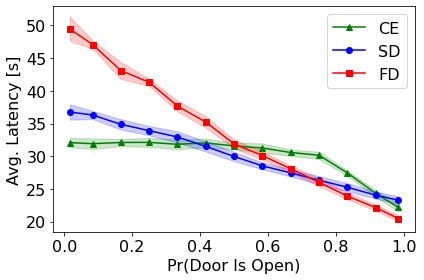

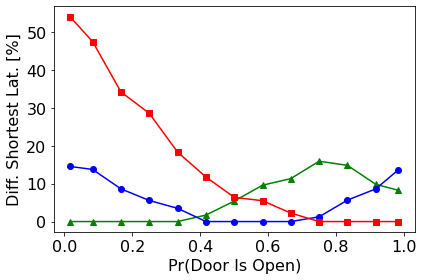

In [8]:
FONT_SIZE = 16

THINK_TIME = 1
NUM_ROBOT_MAX = 100
POLICY_REFRESH = 300
COMM_COST = 1

#############
## Latency ##
#############

dfCentralTmp = df[(df['comm_same_room']==COMM_COST) & (df['S_changePolicyToOpen']==POLICY_REFRESH) & (df['Z_robot']==THINK_TIME) & (df['N_robot']==NUM_ROBOT_MAX)]
dfSingleTmp = dfSingle[(dfSingle['comm_same_room']==COMM_COST) & (dfSingle['Z_robot']==THINK_TIME) & (dfSingle['N_robot']==NUM_ROBOT_MAX)]
dfIndTmp = dfInd[(dfInd['Z_robot']==THINK_TIME) & (dfInd['N_robot']==NUM_ROBOT_MAX)]

fig, ax1 = plt.subplots()

ax1.plot(dfCentralTmp['p_openDoor'], dfCentralTmp['R_robot_sys_mean'], color='green', marker='^', label='CE')
ax1.fill_between(dfCentralTmp['p_openDoor'], dfCentralTmp['R_robot_sys_low'], dfCentralTmp['R_robot_sys_up'], color='green', alpha=.2)

ax1.plot(dfSingleTmp['p_openDoor'], dfSingleTmp['R_robot_sys_mean'], color='blue', marker='o', label='SD')
ax1.fill_between(dfSingleTmp['p_openDoor'], dfSingleTmp['R_robot_sys_low'], dfSingleTmp['R_robot_sys_up'], color='blue', alpha=.2)

ax1.plot(dfIndTmp['p_openDoor'], dfIndTmp['R_robot_sys_mean'], color='red', marker='s', label='FD')
ax1.fill_between(dfIndTmp['p_openDoor'], dfIndTmp['R_robot_sys_low'], dfIndTmp['R_robot_sys_up'], color='red', alpha=.2)

plt.xlabel('Pr(Door Is Open)', fontsize=FONT_SIZE)
plt.ylabel('Avg. Latency [s]', fontsize=FONT_SIZE)
#plt.title('N = '+str(NUM_ROBOT_MAX)+' | Z = '+str(THINK_TIME)+' | Comm. Cost = '+str(COMM_COST)+' | Policy Refresh = '+str(POLICY_REFRESH))
plt.xticks(size=FONT_SIZE)
plt.yticks(size=FONT_SIZE)
plt.legend(fontsize=FONT_SIZE)

plt.tight_layout()
#plt.savefig('images/90-10_N'+str(NUM_ROBOT_MAX)+'_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_lat.pdf')
plt.show()

#############
### Error ###
#############

df1 = dfCentralTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()
df2 = dfSingleTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()
df3 = dfIndTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()

dfTot = df1.join(df2.join(df3, rsuffix='_distr'), lsuffix='_central', rsuffix='_semi')
dfTot.drop(['p_openDoor_semi', 'p_openDoor_distr'], axis=1, inplace=True)
dfTot.rename({'p_openDoor_central':'p_openDoor'}, inplace=True)

dfTot['min_R_robot_sys_mean'] = dfTot[['R_robot_sys_mean_central', 'R_robot_sys_mean_semi', 'R_robot_sys_mean_distr']].min(axis=1)

dfTot['diffCentralMin'] = abs(dfTot['R_robot_sys_mean_central'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffSemiMin'] = abs(dfTot['R_robot_sys_mean_semi'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffDistrMin'] = abs(dfTot['R_robot_sys_mean_distr'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']

fig, ax1 = plt.subplots()

ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffCentralMin']*100, color='green', marker='^', label='Central')
ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffSemiMin']*100, color='blue', marker='o', label='Semi')
ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffDistrMin']*100, color='red', marker='s', label='Fully')

plt.xlabel('Pr(Door Is Open)', fontsize=FONT_SIZE)
plt.ylabel('Diff. Shortest Lat. [%]', fontsize=FONT_SIZE)
plt.xticks(size=FONT_SIZE)
plt.yticks(size=FONT_SIZE)
#plt.legend(fontsize=FONT_SIZE)

plt.tight_layout()
#plt.savefig('images/90-10_N'+str(NUM_ROBOT_MAX)+'_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_diff.pdf')
plt.show()

# Figure 10

Time required to simulate:
- the centralized architecture = ~20 minutes
- the semi-distributed architecture = ~20 minutes
- the fully-distributed architecture = ~15 minutes

In [9]:
df = pd.read_csv('./figures10and12/results/three_doors/slidingDoor_centralizedDecision_threeDoors_varChangePolicy/slidingDoor_centralizedDecision_threeDoors_collectResults.csv')
df.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
df.drop(list(df.filter(regex = 'reqB')), axis=1, inplace=True)
df['p_openDoor'] = df['S_door_closing'] / (df['S_door_opening'] + df['S_door_closing'])
df.sort_values(by=['p_openDoor'], inplace=True)
df[df == np.inf] = 0.0

In [10]:
#############
### Robot ###
#############

###### Mean values ######
for i in range(1,3+1):
    #Compute the probability of each path
    df['X'+str(i)+'_robot_A_mean'] = df['X_robot_success'+str(i)+'_A_mean'] + df['X_robot_fail'+str(i)+'_A_mean'] + df['X_robot_goSlow'+str(i)+'_A_mean']
    df['pRobot_fastSucc'+str(i)+'_A_mean'] = df['X_robot_success'+str(i)+'_A_mean'] / df['X'+str(i)+'_robot_A_mean']
    df['pRobot_fastFail'+str(i)+'_A_mean'] = df['X_robot_fail'+str(i)+'_A_mean'] / df['X'+str(i)+'_robot_A_mean']
    df['pRobot_slow'+str(i)+'_A_mean'] = df['X_robot_goSlow'+str(i)+'_A_mean'] / df['X'+str(i)+'_robot_A_mean']
    if i > 1:
        df['pRobot_fastSucc'+str(i)+'_A_mean'] = df['pRobot_fastSucc'+str(i)+'_A_mean'] * df['pRobot_fastSucc'+str(i-1)+'_A_mean']
        df['pRobot_fastFail'+str(i)+'_A_mean'] = df['pRobot_fastFail'+str(i)+'_A_mean'] * df['pRobot_fastSucc'+str(i-1)+'_A_mean']
        df['pRobot_slow'+str(i)+'_A_mean'] = df['pRobot_slow'+str(i)+'_A_mean'] * df['pRobot_fastSucc'+str(i-1)+'_A_mean']
for i in reversed(range(1,3+1)):    
    df['X'+str(i)+'_robot_B_mean'] = df['X_robot_success'+str(i)+'_B_mean'] + df['X_robot_fail'+str(i)+'_B_mean'] + df['X_robot_goSlow'+str(i)+'_B_mean']
    df['pRobot_fastSucc'+str(i)+'_B_mean'] = df['X_robot_success'+str(i)+'_B_mean'] / df['X'+str(i)+'_robot_B_mean']
    df['pRobot_fastFail'+str(i)+'_B_mean'] = df['X_robot_fail'+str(i)+'_B_mean'] / df['X'+str(i)+'_robot_B_mean']
    df['pRobot_slow'+str(i)+'_B_mean'] = df['X_robot_goSlow'+str(i)+'_B_mean'] / df['X'+str(i)+'_robot_B_mean']
    if i < 3:
        df['pRobot_fastSucc'+str(i)+'_B_mean'] = df['pRobot_fastSucc'+str(i)+'_B_mean'] * df['pRobot_fastSucc'+str(i+1)+'_B_mean']
        df['pRobot_fastFail'+str(i)+'_B_mean'] = df['pRobot_fastFail'+str(i)+'_B_mean'] * df['pRobot_fastSucc'+str(i+1)+'_B_mean']
        df['pRobot_slow'+str(i)+'_B_mean'] = df['pRobot_slow'+str(i)+'_B_mean'] * df['pRobot_fastSucc'+str(i+1)+'_B_mean']

df[df.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    df['R'+str(i)+'_robot_A_mean'] = df['R_robot_choosing'+str(i)+'_A_mean'] + df['pRobot_fastSucc'+str(i)+'_A_mean'] * (df['R_robot_reachDoor'+str(i)+'_A_mean'] + df['R_robot_driveThru'+str(i)+'_A_mean'] + df['R_robot_driveFwd'+str(i)+'_A_mean']) + df['pRobot_fastFail'+str(i)+'_A_mean'] * (df['R_robot_reachDoor'+str(i)+'_A_mean'] + df['R_robot_driveThru'+str(i)+'_A_mean'] + df['R_robot_driveBack'+str(i)+'_A_mean'] + df['R_robot_driveAround'+str(i)+'_A_mean']) + df['pRobot_slow'+str(i)+'_A_mean'] * df['R_robot_driveAround'+str(i)+'_A_mean']
    df['R'+str(i)+'_robot_B_mean'] = df['R_robot_choosing'+str(i)+'_B_mean'] + df['pRobot_fastSucc'+str(i)+'_B_mean'] * (df['R_robot_reachDoor'+str(i)+'_B_mean'] + df['R_robot_driveThru'+str(i)+'_B_mean'] + df['R_robot_driveFwd'+str(i)+'_B_mean']) + df['pRobot_fastFail'+str(i)+'_B_mean'] * (df['R_robot_reachDoor'+str(i)+'_B_mean'] + df['R_robot_driveThru'+str(i)+'_B_mean'] + df['R_robot_driveBack'+str(i)+'_B_mean'] + df['R_robot_driveAround'+str(i)+'_B_mean']) + df['pRobot_slow'+str(i)+'_B_mean'] * df['R_robot_driveAround'+str(i)+'_B_mean']
    df['R'+str(i)+'_robot_sys_mean'] = df['R'+str(i)+'_robot_A_mean'] + df['R'+str(i)+'_robot_B_mean']

    
###### Lower bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    df['X'+str(i)+'_robot_A_low'] = df['X_robot_success'+str(i)+'_A_low'] + df['X_robot_fail'+str(i)+'_A_low'] + df['X_robot_goSlow'+str(i)+'_A_low']
    df['pRobot_fastSucc'+str(i)+'_A_low'] = df['X_robot_success'+str(i)+'_A_low'] / df['X'+str(i)+'_robot_A_low']
    df['pRobot_fastFail'+str(i)+'_A_low'] = df['X_robot_fail'+str(i)+'_A_low'] / df['X'+str(i)+'_robot_A_low']
    df['pRobot_slow'+str(i)+'_A_low'] = df['X_robot_goSlow'+str(i)+'_A_low'] / df['X'+str(i)+'_robot_A_low']
    if i > 1:
        df['pRobot_fastSucc'+str(i)+'_A_low'] = df['pRobot_fastSucc'+str(i)+'_A_low'] * df['pRobot_fastSucc'+str(i-1)+'_A_low']
        df['pRobot_fastFail'+str(i)+'_A_low'] = df['pRobot_fastFail'+str(i)+'_A_low'] * df['pRobot_fastSucc'+str(i-1)+'_A_low']
        df['pRobot_slow'+str(i)+'_A_low'] = df['pRobot_slow'+str(i)+'_A_low'] * df['pRobot_fastSucc'+str(i-1)+'_A_low']
for i in reversed(range(1,3+1)):    
    df['X'+str(i)+'_robot_B_low'] = df['X_robot_success'+str(i)+'_B_low'] + df['X_robot_fail'+str(i)+'_B_low'] +  + df['X_robot_goSlow'+str(i)+'_B_low']
    df['pRobot_fastSucc'+str(i)+'_B_low'] = df['X_robot_success'+str(i)+'_B_low'] / df['X'+str(i)+'_robot_B_low']
    df['pRobot_fastFail'+str(i)+'_B_low'] = df['X_robot_fail'+str(i)+'_B_low'] / df['X'+str(i)+'_robot_B_low']
    df['pRobot_slow'+str(i)+'_B_low'] = df['X_robot_goSlow'+str(i)+'_B_low'] / df['X'+str(i)+'_robot_B_low']
    if i < 3:
        df['pRobot_fastSucc'+str(i)+'_B_low'] = df['pRobot_fastSucc'+str(i)+'_B_low'] * df['pRobot_fastSucc'+str(i+1)+'_B_low']
        df['pRobot_fastFail'+str(i)+'_B_low'] = df['pRobot_fastFail'+str(i)+'_B_low'] * df['pRobot_fastSucc'+str(i+1)+'_B_low']
        df['pRobot_slow'+str(i)+'_B_low'] = df['pRobot_slow'+str(i)+'_B_low'] * df['pRobot_fastSucc'+str(i+1)+'_B_low']

df[df.isna()] = 0.0        

for i in range(1,3+1):    
    #Use probabilities for computing the system response time
    df['R'+str(i)+'_robot_A_low'] = df['R_robot_choosing'+str(i)+'_A_low'] + df['pRobot_fastSucc'+str(i)+'_A_low'] * (df['R_robot_reachDoor'+str(i)+'_A_low'] + df['R_robot_driveThru'+str(i)+'_A_low'] + df['R_robot_driveFwd'+str(i)+'_A_low']) + df['pRobot_fastFail'+str(i)+'_A_low'] * (df['R_robot_reachDoor'+str(i)+'_A_low'] + df['R_robot_driveThru'+str(i)+'_A_low'] + df['R_robot_driveBack'+str(i)+'_A_low'] + df['R_robot_driveAround'+str(i)+'_A_low']) + df['pRobot_slow'+str(i)+'_A_low'] * df['R_robot_driveAround'+str(i)+'_A_low']
    df['R'+str(i)+'_robot_B_low'] = df['R_robot_choosing'+str(i)+'_B_low'] + df['pRobot_fastSucc'+str(i)+'_B_low'] * (df['R_robot_reachDoor'+str(i)+'_B_low'] + df['R_robot_driveThru'+str(i)+'_B_low'] + df['R_robot_driveFwd'+str(i)+'_B_low']) + df['pRobot_fastFail'+str(i)+'_B_low'] * (df['R_robot_reachDoor'+str(i)+'_B_low'] + df['R_robot_driveThru'+str(i)+'_B_low'] + df['R_robot_driveBack'+str(i)+'_B_low'] + df['R_robot_driveAround'+str(i)+'_B_low']) + df['pRobot_slow'+str(i)+'_B_low'] * df['R_robot_driveAround'+str(i)+'_B_low']
    df['R'+str(i)+'_robot_sys_low'] = df['R'+str(i)+'_robot_A_low'] + df['R'+str(i)+'_robot_B_low']
    
    
###### Upper bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    df['X'+str(i)+'_robot_A_up'] = df['X_robot_success'+str(i)+'_A_up'] + df['X_robot_fail'+str(i)+'_A_up'] + df['X_robot_goSlow'+str(i)+'_A_up']
    df['pRobot_fastSucc'+str(i)+'_A_up'] = df['X_robot_success'+str(i)+'_A_up'] / df['X'+str(i)+'_robot_A_up']
    df['pRobot_fastFail'+str(i)+'_A_up'] = df['X_robot_fail'+str(i)+'_A_up'] / df['X'+str(i)+'_robot_A_up']
    df['pRobot_slow'+str(i)+'_A_up'] = df['X_robot_goSlow'+str(i)+'_A_up'] / df['X'+str(i)+'_robot_A_up']
    if i > 1:
        df['pRobot_fastSucc'+str(i)+'_A_up'] = df['pRobot_fastSucc'+str(i)+'_A_up'] * df['pRobot_fastSucc'+str(i-1)+'_A_up']
        df['pRobot_fastFail'+str(i)+'_A_up'] = df['pRobot_fastFail'+str(i)+'_A_up'] * df['pRobot_fastSucc'+str(i-1)+'_A_up']
        df['pRobot_slow'+str(i)+'_A_up'] = df['pRobot_slow'+str(i)+'_A_up'] * df['pRobot_fastSucc'+str(i-1)+'_A_up']
for i in reversed(range(1,3+1)):    
    df['X'+str(i)+'_robot_B_up'] = df['X_robot_success'+str(i)+'_B_up'] + df['X_robot_fail'+str(i)+'_B_up'] + df['X_robot_goSlow'+str(i)+'_B_up']
    df['pRobot_fastSucc'+str(i)+'_B_up'] = df['X_robot_success'+str(i)+'_B_up'] / df['X'+str(i)+'_robot_B_up']
    df['pRobot_fastFail'+str(i)+'_B_up'] = df['X_robot_fail'+str(i)+'_B_up'] / df['X'+str(i)+'_robot_B_up']
    df['pRobot_slow'+str(i)+'_B_up'] = df['X_robot_goSlow'+str(i)+'_B_up'] / df['X'+str(i)+'_robot_B_up']
    if i < 3:
        df['pRobot_fastSucc'+str(i)+'_B_up'] = df['pRobot_fastSucc'+str(i)+'_B_up'] * df['pRobot_fastSucc'+str(i+1)+'_B_up']
        df['pRobot_fastFail'+str(i)+'_B_up'] = df['pRobot_fastFail'+str(i)+'_B_up'] * df['pRobot_fastSucc'+str(i+1)+'_B_up']
        df['pRobot_slow'+str(i)+'_B_up'] = df['pRobot_slow'+str(i)+'_B_up'] * df['pRobot_fastSucc'+str(i+1)+'_B_up']

df[df.isna()] = 0.0        

for i in range(1,3+1):    
    #Use probabilities for computing the system response time
    df['R'+str(i)+'_robot_A_up'] = df['R_robot_choosing'+str(i)+'_A_up'] + df['pRobot_fastSucc'+str(i)+'_A_up'] * (df['R_robot_reachDoor'+str(i)+'_A_up'] + df['R_robot_driveThru'+str(i)+'_A_up'] + df['R_robot_driveFwd'+str(i)+'_A_up']) + df['pRobot_fastFail'+str(i)+'_A_up'] * (df['R_robot_reachDoor'+str(i)+'_A_up'] + df['R_robot_driveThru'+str(i)+'_A_up'] + df['R_robot_driveBack'+str(i)+'_A_up'] + df['R_robot_driveAround'+str(i)+'_A_up']) + df['pRobot_slow'+str(i)+'_A_up'] * df['R_robot_driveAround'+str(i)+'_A_up']
    df['R'+str(i)+'_robot_B_up'] = df['R_robot_choosing'+str(i)+'_B_up'] + df['pRobot_fastSucc'+str(i)+'_B_up'] * (df['R_robot_reachDoor'+str(i)+'_B_up'] + df['R_robot_driveThru'+str(i)+'_B_up'] + df['R_robot_driveFwd'+str(i)+'_B_up']) + df['pRobot_fastFail'+str(i)+'_B_up'] * (df['R_robot_reachDoor'+str(i)+'_B_up'] + df['R_robot_driveThru'+str(i)+'_B_up'] + df['R_robot_driveBack'+str(i)+'_B_up'] + df['R_robot_driveAround'+str(i)+'_B_up']) + df['pRobot_slow'+str(i)+'_B_up'] * df['R_robot_driveAround'+str(i)+'_B_up']
    df['R'+str(i)+'_robot_sys_up'] = df['R'+str(i)+'_robot_A_up'] + df['R'+str(i)+'_robot_B_up']
    

df['R_robot_sys_mean'] = df['R1_robot_sys_mean'] + df['R2_robot_sys_mean'] + df['R3_robot_sys_mean']
df['R_robot_sys_low'] = df['R1_robot_sys_low'] + df['R2_robot_sys_low'] + df['R3_robot_sys_low']
df['R_robot_sys_up'] = df['R1_robot_sys_up'] + df['R2_robot_sys_up'] + df['R3_robot_sys_up']

In [11]:
dfSingle = pd.read_csv('./figures10and12/results/three_doors/slidingDoor_semiDistrDecision_threeDoors_varArrivals/slidingDoor_semiDistrDecision_threeDoors_collectResults.csv')
dfSingle.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfSingle.drop(list(dfSingle.filter(regex = 'reqB')), axis=1, inplace=True)
dfSingle['p_openDoor'] = dfSingle['S_door_closing'] / (dfSingle['S_door_opening'] + dfSingle['S_door_closing'])
dfSingle.sort_values(by=['p_openDoor'], inplace=True)
dfSingle[dfSingle == np.inf] = 0.0

In [12]:
#############
### Robot ###
#############

###### Mean values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfSingle['X'+str(i)+'_robot_A_mean'] = dfSingle['X_robot_success'+str(i)+'_A_mean'] + dfSingle['X_robot_fail'+str(i)+'_A_mean'] + dfSingle['X_robot_follow'+str(i)+'_A_mean']
    dfSingle['pRobot_fast'+str(i)+'_A_mean'] = dfSingle['X_robot_success'+str(i)+'_A_mean'] / dfSingle['X'+str(i)+'_robot_A_mean']
    dfSingle['pRobot_leader'+str(i)+'_A_mean'] = dfSingle['X_robot_fail'+str(i)+'_A_mean'] / dfSingle['X'+str(i)+'_robot_A_mean']
    dfSingle['pRobot_slow'+str(i)+'_A_mean'] = dfSingle['X_robot_follow'+str(i)+'_A_mean'] / dfSingle['X'+str(i)+'_robot_A_mean']
    if i > 1:
        dfSingle['pRobot_fast'+str(i)+'_A_mean'] = dfSingle['pRobot_fast'+str(i)+'_A_mean'] * dfSingle['pRobot_fast'+str(i-1)+'_A_mean']
        dfSingle['pRobot_leader'+str(i)+'_A_mean'] = dfSingle['pRobot_leader'+str(i)+'_A_mean'] * dfSingle['pRobot_fast'+str(i-1)+'_A_mean']
        dfSingle['pRobot_slow'+str(i)+'_A_mean'] = dfSingle['pRobot_slow'+str(i)+'_A_mean'] * dfSingle['pRobot_fast'+str(i-1)+'_A_mean']
for i in reversed(range(1,3+1)):
    dfSingle['X'+str(i)+'_robot_B_mean'] = dfSingle['X_robot_success'+str(i)+'_B_mean'] + dfSingle['X_robot_fail'+str(i)+'_B_mean'] + dfSingle['X_robot_follow'+str(i)+'_B_mean']
    dfSingle['pRobot_fast'+str(i)+'_B_mean'] = dfSingle['X_robot_success'+str(i)+'_B_mean'] / dfSingle['X'+str(i)+'_robot_B_mean']
    dfSingle['pRobot_leader'+str(i)+'_B_mean'] = dfSingle['X_robot_fail'+str(i)+'_B_mean'] / dfSingle['X'+str(i)+'_robot_B_mean']
    dfSingle['pRobot_slow'+str(i)+'_B_mean'] = dfSingle['X_robot_follow'+str(i)+'_B_mean'] / dfSingle['X'+str(i)+'_robot_B_mean']
    if i < 3:
        dfSingle['pRobot_fast'+str(i)+'_B_mean'] = dfSingle['pRobot_fast'+str(i)+'_B_mean'] * dfSingle['pRobot_fast'+str(i+1)+'_B_mean']
        dfSingle['pRobot_leader'+str(i)+'_B_mean'] = dfSingle['pRobot_leader'+str(i)+'_B_mean'] * dfSingle['pRobot_fast'+str(i+1)+'_B_mean']
        dfSingle['pRobot_slow'+str(i)+'_B_mean'] = dfSingle['pRobot_slow'+str(i)+'_B_mean'] * dfSingle['pRobot_fast'+str(i+1)+'_B_mean']

dfSingle[dfSingle.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfSingle['R'+str(i)+'_robot_A_mean'] = dfSingle['R_robot_choosing'+str(i)+'_A_mean'] + dfSingle['pRobot_fast'+str(i)+'_A_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_mean'] + dfSingle['R_robot_driveThru'+str(i)+'_A_mean'] + dfSingle['R_robot_driveFwd'+str(i)+'_A_mean']) + dfSingle['pRobot_slow'+str(i)+'_A_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_A_mean']) + dfSingle['pRobot_leader'+str(i)+'_A_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_mean'] + dfSingle['R_robot_communicate'+str(i)+'_A_mean'] + dfSingle['R_robot_driveBack'+str(i)+'_A_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_A_mean'])
    dfSingle['R'+str(i)+'_robot_B_mean'] = dfSingle['R_robot_choosing'+str(i)+'_B_mean'] + dfSingle['pRobot_fast'+str(i)+'_B_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_mean'] + dfSingle['R_robot_driveThru'+str(i)+'_B_mean'] + dfSingle['R_robot_driveFwd'+str(i)+'_B_mean']) + dfSingle['pRobot_slow'+str(i)+'_B_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_B_mean']) + dfSingle['pRobot_leader'+str(i)+'_B_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_mean'] + dfSingle['R_robot_communicate'+str(i)+'_B_mean'] + dfSingle['R_robot_driveBack'+str(i)+'_B_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_B_mean'])
    dfSingle['R'+str(i)+'_robot_sys_mean'] = dfSingle['R'+str(i)+'_robot_A_mean'] + dfSingle['R'+str(i)+'_robot_B_mean']


###### Lower bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfSingle['X'+str(i)+'_robot_A_low'] = dfSingle['X_robot_success'+str(i)+'_A_low'] + dfSingle['X_robot_fail'+str(i)+'_A_low'] + dfSingle['X_robot_follow'+str(i)+'_A_low']
    dfSingle['pRobot_fast'+str(i)+'_A_low'] = dfSingle['X_robot_success'+str(i)+'_A_low'] / dfSingle['X'+str(i)+'_robot_A_low']
    dfSingle['pRobot_leader'+str(i)+'_A_low'] = dfSingle['X_robot_fail'+str(i)+'_A_low'] / dfSingle['X'+str(i)+'_robot_A_low']
    dfSingle['pRobot_slow'+str(i)+'_A_low'] = dfSingle['X_robot_follow'+str(i)+'_A_low'] / dfSingle['X'+str(i)+'_robot_A_low']
    if i > 1:
        dfSingle['pRobot_fast'+str(i)+'_A_low'] = dfSingle['pRobot_fast'+str(i)+'_A_low'] * dfSingle['pRobot_fast'+str(i-1)+'_A_low']
        dfSingle['pRobot_leader'+str(i)+'_A_low'] = dfSingle['pRobot_leader'+str(i)+'_A_low'] * dfSingle['pRobot_fast'+str(i-1)+'_A_low']
        dfSingle['pRobot_slow'+str(i)+'_A_low'] = dfSingle['pRobot_slow'+str(i)+'_A_low'] * dfSingle['pRobot_fast'+str(i-1)+'_A_low']
for i in reversed(range(1,3+1)):
    dfSingle['X'+str(i)+'_robot_B_low'] = dfSingle['X_robot_success'+str(i)+'_B_low'] + dfSingle['X_robot_fail'+str(i)+'_B_low'] + dfSingle['X_robot_follow'+str(i)+'_B_low']
    dfSingle['pRobot_fast'+str(i)+'_B_low'] = dfSingle['X_robot_success'+str(i)+'_B_low'] / dfSingle['X'+str(i)+'_robot_B_low']
    dfSingle['pRobot_leader'+str(i)+'_B_low'] = dfSingle['X_robot_fail'+str(i)+'_B_low'] / dfSingle['X'+str(i)+'_robot_B_low']
    dfSingle['pRobot_slow'+str(i)+'_B_low'] = dfSingle['X_robot_follow'+str(i)+'_B_low'] / dfSingle['X'+str(i)+'_robot_B_low']
    if i < 3:
        dfSingle['pRobot_fast'+str(i)+'_B_low'] = dfSingle['pRobot_fast'+str(i)+'_B_low'] * dfSingle['pRobot_fast'+str(i+1)+'_B_low']
        dfSingle['pRobot_leader'+str(i)+'_B_low'] = dfSingle['pRobot_leader'+str(i)+'_B_low'] * dfSingle['pRobot_fast'+str(i+1)+'_B_low']
        dfSingle['pRobot_slow'+str(i)+'_B_low'] = dfSingle['pRobot_slow'+str(i)+'_B_low'] * dfSingle['pRobot_fast'+str(i+1)+'_B_low']

dfSingle[dfSingle.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfSingle['R'+str(i)+'_robot_A_low'] = dfSingle['R_robot_choosing'+str(i)+'_A_low'] + dfSingle['pRobot_fast'+str(i)+'_A_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_low'] + dfSingle['R_robot_driveThru'+str(i)+'_A_low'] + dfSingle['R_robot_driveFwd'+str(i)+'_A_low']) + dfSingle['pRobot_slow'+str(i)+'_A_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_low'] + dfSingle['R_robot_driveAround'+str(i)+'_A_low']) + dfSingle['pRobot_leader'+str(i)+'_A_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_low'] + dfSingle['R_robot_communicate'+str(i)+'_A_low'] + dfSingle['R_robot_driveBack'+str(i)+'_A_low'] + dfSingle['R_robot_driveAround'+str(i)+'_A_low'])
    dfSingle['R'+str(i)+'_robot_B_low'] = dfSingle['R_robot_choosing'+str(i)+'_B_low'] + dfSingle['pRobot_fast'+str(i)+'_B_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_low'] + dfSingle['R_robot_driveThru'+str(i)+'_B_low'] + dfSingle['R_robot_driveFwd'+str(i)+'_B_low']) + dfSingle['pRobot_slow'+str(i)+'_B_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_low'] + dfSingle['R_robot_driveAround'+str(i)+'_B_low']) + dfSingle['pRobot_leader'+str(i)+'_B_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_low'] + dfSingle['R_robot_communicate'+str(i)+'_B_low'] + dfSingle['R_robot_driveBack'+str(i)+'_B_low'] + dfSingle['R_robot_driveAround'+str(i)+'_B_low'])
    dfSingle['R'+str(i)+'_robot_sys_low'] = dfSingle['R'+str(i)+'_robot_A_low'] + dfSingle['R'+str(i)+'_robot_B_low']


###### Upper bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfSingle['X'+str(i)+'_robot_A_up'] = dfSingle['X_robot_success'+str(i)+'_A_up'] + dfSingle['X_robot_fail'+str(i)+'_A_up'] + dfSingle['X_robot_follow'+str(i)+'_A_up']
    dfSingle['pRobot_fast'+str(i)+'_A_up'] = dfSingle['X_robot_success'+str(i)+'_A_up'] / dfSingle['X'+str(i)+'_robot_A_up']
    dfSingle['pRobot_leader'+str(i)+'_A_up'] = dfSingle['X_robot_fail'+str(i)+'_A_up'] / dfSingle['X'+str(i)+'_robot_A_up']
    dfSingle['pRobot_slow'+str(i)+'_A_up'] = dfSingle['X_robot_follow'+str(i)+'_A_up'] / dfSingle['X'+str(i)+'_robot_A_up']
    if i > 1:
        dfSingle['pRobot_fast'+str(i)+'_A_up'] = dfSingle['pRobot_fast'+str(i)+'_A_up'] * dfSingle['pRobot_fast'+str(i-1)+'_A_up']
        dfSingle['pRobot_leader'+str(i)+'_A_up'] = dfSingle['pRobot_leader'+str(i)+'_A_up'] * dfSingle['pRobot_fast'+str(i-1)+'_A_up']
        dfSingle['pRobot_slow'+str(i)+'_A_up'] = dfSingle['pRobot_slow'+str(i)+'_A_up'] * dfSingle['pRobot_fast'+str(i-1)+'_A_up']
for i in reversed(range(1,3+1)):
    dfSingle['X'+str(i)+'_robot_B_up'] = dfSingle['X_robot_success'+str(i)+'_B_up'] + dfSingle['X_robot_fail'+str(i)+'_B_up'] + dfSingle['X_robot_follow'+str(i)+'_B_up']
    dfSingle['pRobot_fast'+str(i)+'_B_up'] = dfSingle['X_robot_success'+str(i)+'_B_up'] / dfSingle['X'+str(i)+'_robot_B_up']
    dfSingle['pRobot_leader'+str(i)+'_B_up'] = dfSingle['X_robot_fail'+str(i)+'_B_up'] / dfSingle['X'+str(i)+'_robot_B_up']
    dfSingle['pRobot_slow'+str(i)+'_B_up'] = dfSingle['X_robot_follow'+str(i)+'_B_up'] / dfSingle['X'+str(i)+'_robot_B_up']
    if i < 3:
        dfSingle['pRobot_fast'+str(i)+'_B_up'] = dfSingle['pRobot_fast'+str(i)+'_B_up'] * dfSingle['pRobot_fast'+str(i+1)+'_B_up']
        dfSingle['pRobot_leader'+str(i)+'_B_up'] = dfSingle['pRobot_leader'+str(i)+'_B_up'] * dfSingle['pRobot_fast'+str(i+1)+'_B_up']
        dfSingle['pRobot_slow'+str(i)+'_B_up'] = dfSingle['pRobot_slow'+str(i)+'_B_up'] * dfSingle['pRobot_fast'+str(i+1)+'_B_up']

dfSingle[dfSingle.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfSingle['R'+str(i)+'_robot_A_up'] = dfSingle['R_robot_choosing'+str(i)+'_A_up'] + dfSingle['pRobot_fast'+str(i)+'_A_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_up'] + dfSingle['R_robot_driveThru'+str(i)+'_A_up'] + dfSingle['R_robot_driveFwd'+str(i)+'_A_up']) + dfSingle['pRobot_slow'+str(i)+'_A_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_up'] + dfSingle['R_robot_driveAround'+str(i)+'_A_up']) + dfSingle['pRobot_leader'+str(i)+'_A_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_up'] + dfSingle['R_robot_communicate'+str(i)+'_A_up'] + dfSingle['R_robot_driveBack'+str(i)+'_A_up'] + dfSingle['R_robot_driveAround'+str(i)+'_A_up'])
    dfSingle['R'+str(i)+'_robot_B_up'] = dfSingle['R_robot_choosing'+str(i)+'_B_up'] + dfSingle['pRobot_fast'+str(i)+'_B_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_up'] + dfSingle['R_robot_driveThru'+str(i)+'_B_up'] + dfSingle['R_robot_driveFwd'+str(i)+'_B_up']) + dfSingle['pRobot_slow'+str(i)+'_B_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_up'] + dfSingle['R_robot_driveAround'+str(i)+'_B_up']) + dfSingle['pRobot_leader'+str(i)+'_B_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_up'] + dfSingle['R_robot_communicate'+str(i)+'_B_up'] + dfSingle['R_robot_driveBack'+str(i)+'_B_up'] + dfSingle['R_robot_driveAround'+str(i)+'_B_up'])
    dfSingle['R'+str(i)+'_robot_sys_up'] = dfSingle['R'+str(i)+'_robot_A_up'] + dfSingle['R'+str(i)+'_robot_B_up']
    
dfSingle['R_robot_sys_mean'] = dfSingle['R1_robot_sys_mean'] + dfSingle['R2_robot_sys_mean'] + dfSingle['R3_robot_sys_mean']
dfSingle['R_robot_sys_low'] = dfSingle['R1_robot_sys_low'] + dfSingle['R2_robot_sys_low'] + dfSingle['R3_robot_sys_low']
dfSingle['R_robot_sys_up'] = dfSingle['R1_robot_sys_up'] + dfSingle['R2_robot_sys_up'] + dfSingle['R3_robot_sys_up']

In [13]:
dfInd = pd.read_csv('./figures10and12/results/three_doors/slidingDoor_independentDecision_threeDoors_varArrivals/slidingDoor_independentDecision_threeDoors_collectResults.csv')
dfInd.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfInd.drop(list(dfInd.filter(regex = 'reqB')), axis=1, inplace=True)
dfInd['p_openDoor'] = dfInd['S_door_closing'] / (dfInd['S_door_opening'] + dfInd['S_door_closing'])
dfInd.sort_values(by=['p_openDoor'], inplace=True)
dfInd[dfInd == np.inf] = 0.0

In [14]:
#############
### Robot ###
#############

###### Mean values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfInd['X'+str(i)+'_robot_A_mean'] = dfInd['X_robot_goFast'+str(i)+'_A_mean']
    dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] = dfInd['X_robot_success'+str(i)+'_A_mean'] / dfInd['X'+str(i)+'_robot_A_mean']
    dfInd['pRobot_fastFail'+str(i)+'_A_mean'] = dfInd['X_robot_fail'+str(i)+'_A_mean'] / dfInd['X'+str(i)+'_robot_A_mean']
    if i > 1:
        dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] = dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_mean']
        dfInd['pRobot_fastFail'+str(i)+'_A_mean'] = dfInd['pRobot_fastFail'+str(i)+'_A_mean'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_mean']
for i in reversed(range(1,3+1)):
    dfInd['X'+str(i)+'_robot_B_mean'] = dfInd['X_robot_goFast'+str(i)+'_B_mean']
    dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] = dfInd['X_robot_success'+str(i)+'_B_mean'] / dfInd['X'+str(i)+'_robot_B_mean']
    dfInd['pRobot_fastFail'+str(i)+'_B_mean'] = dfInd['X_robot_fail'+str(i)+'_B_mean'] / dfInd['X'+str(i)+'_robot_B_mean']
    if i < 3:
        dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] = dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_mean']
        dfInd['pRobot_fastFail'+str(i)+'_B_mean'] = dfInd['pRobot_fastFail'+str(i)+'_B_mean'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_mean']

dfInd[dfInd.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfInd['R'+str(i)+'_robot_A_mean'] = dfInd['R_robot_choosing'+str(i)+'_A_mean'] + dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_mean'] + dfInd['R_robot_driveThru'+str(i)+'_A_mean'] + dfInd['R_robot_driveFwd'+str(i)+'_A_mean']) + dfInd['pRobot_fastFail'+str(i)+'_A_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_mean'] + dfInd['R_robot_driveBack'+str(i)+'_A_mean'] + dfInd['R_robot_driveAround'+str(i)+'_A_mean'])
    dfInd['R'+str(i)+'_robot_B_mean'] = dfInd['R_robot_choosing'+str(i)+'_B_mean'] + dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_mean'] + dfInd['R_robot_driveThru'+str(i)+'_B_mean'] + dfInd['R_robot_driveFwd'+str(i)+'_B_mean']) + dfInd['pRobot_fastFail'+str(i)+'_B_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_mean'] + dfInd['R_robot_driveBack'+str(i)+'_B_mean'] + dfInd['R_robot_driveAround'+str(i)+'_B_mean'])
    dfInd['R'+str(i)+'_robot_sys_mean'] = dfInd['R'+str(i)+'_robot_A_mean'] + dfInd['R'+str(i)+'_robot_B_mean']



###### Lower values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfInd['X'+str(i)+'_robot_A_low'] = dfInd['X_robot_goFast'+str(i)+'_A_low']
    dfInd['pRobot_fastSucc'+str(i)+'_A_low'] = dfInd['X_robot_success'+str(i)+'_A_low'] / dfInd['X'+str(i)+'_robot_A_low']
    dfInd['pRobot_fastFail'+str(i)+'_A_low'] = dfInd['X_robot_fail'+str(i)+'_A_low'] / dfInd['X'+str(i)+'_robot_A_low']
    if i > 1:
        dfInd['pRobot_fastSucc'+str(i)+'_A_low'] = dfInd['pRobot_fastSucc'+str(i)+'_A_low'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_low']
        dfInd['pRobot_fastFail'+str(i)+'_A_low'] = dfInd['pRobot_fastFail'+str(i)+'_A_low'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_low']
for i in reversed(range(1,3+1)):
    dfInd['X'+str(i)+'_robot_B_low'] = dfInd['X_robot_goFast'+str(i)+'_B_low']
    dfInd['pRobot_fastSucc'+str(i)+'_B_low'] = dfInd['X_robot_success'+str(i)+'_B_low'] / dfInd['X'+str(i)+'_robot_B_low']
    dfInd['pRobot_fastFail'+str(i)+'_B_low'] = dfInd['X_robot_fail'+str(i)+'_B_low'] / dfInd['X'+str(i)+'_robot_B_low']
    if i < 3:
        dfInd['pRobot_fastSucc'+str(i)+'_B_low'] = dfInd['pRobot_fastSucc'+str(i)+'_B_low'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_low']
        dfInd['pRobot_fastFail'+str(i)+'_B_low'] = dfInd['pRobot_fastFail'+str(i)+'_B_low'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_low']

dfInd[dfInd.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfInd['R'+str(i)+'_robot_A_low'] = dfInd['R_robot_choosing'+str(i)+'_A_low'] + dfInd['pRobot_fastSucc'+str(i)+'_A_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_low'] + dfInd['R_robot_driveThru'+str(i)+'_A_low'] + dfInd['R_robot_driveFwd'+str(i)+'_A_low']) + dfInd['pRobot_fastFail'+str(i)+'_A_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_low'] + dfInd['R_robot_driveBack'+str(i)+'_A_low'] + dfInd['R_robot_driveAround'+str(i)+'_A_low'])
    dfInd['R'+str(i)+'_robot_B_low'] = dfInd['R_robot_choosing'+str(i)+'_B_low'] + dfInd['pRobot_fastSucc'+str(i)+'_B_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_low'] + dfInd['R_robot_driveThru'+str(i)+'_B_low'] + dfInd['R_robot_driveFwd'+str(i)+'_B_low']) + dfInd['pRobot_fastFail'+str(i)+'_B_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_low'] + dfInd['R_robot_driveBack'+str(i)+'_B_low'] + dfInd['R_robot_driveAround'+str(i)+'_B_low'])
    dfInd['R'+str(i)+'_robot_sys_low'] = dfInd['R'+str(i)+'_robot_A_low'] + dfInd['R'+str(i)+'_robot_B_low']


###### Upper bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfInd['X'+str(i)+'_robot_A_up'] = dfInd['X_robot_goFast'+str(i)+'_A_up']
    dfInd['pRobot_fastSucc'+str(i)+'_A_up'] = dfInd['X_robot_success'+str(i)+'_A_up'] / dfInd['X'+str(i)+'_robot_A_up']
    dfInd['pRobot_fastFail'+str(i)+'_A_up'] = dfInd['X_robot_fail'+str(i)+'_A_up'] / dfInd['X'+str(i)+'_robot_A_up']
    if i > 1:
        dfInd['pRobot_fastSucc'+str(i)+'_A_up'] = dfInd['pRobot_fastSucc'+str(i)+'_A_up'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_up']
        dfInd['pRobot_fastFail'+str(i)+'_A_up'] = dfInd['pRobot_fastFail'+str(i)+'_A_up'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_up']
for i in reversed(range(1,3+1)):
    dfInd['X'+str(i)+'_robot_B_up'] = dfInd['X_robot_goFast'+str(i)+'_B_up']
    dfInd['pRobot_fastSucc'+str(i)+'_B_up'] = dfInd['X_robot_success'+str(i)+'_B_up'] / dfInd['X'+str(i)+'_robot_B_up']
    dfInd['pRobot_fastFail'+str(i)+'_B_up'] = dfInd['X_robot_fail'+str(i)+'_B_up'] / dfInd['X'+str(i)+'_robot_B_up']
    if i < 3:
        dfInd['pRobot_fastSucc'+str(i)+'_B_up'] = dfInd['pRobot_fastSucc'+str(i)+'_B_up'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_up']
        dfInd['pRobot_fastFail'+str(i)+'_B_up'] = dfInd['pRobot_fastFail'+str(i)+'_B_up'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_up']

dfInd[dfInd.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfInd['R'+str(i)+'_robot_A_up'] = dfInd['R_robot_choosing'+str(i)+'_A_up'] + dfInd['pRobot_fastSucc'+str(i)+'_A_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_up'] + dfInd['R_robot_driveThru'+str(i)+'_A_up'] + dfInd['R_robot_driveFwd'+str(i)+'_A_up']) + dfInd['pRobot_fastFail'+str(i)+'_A_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_up'] + dfInd['R_robot_driveBack'+str(i)+'_A_up'] + dfInd['R_robot_driveAround'+str(i)+'_A_up'])
    dfInd['R'+str(i)+'_robot_B_up'] = dfInd['R_robot_choosing'+str(i)+'_B_up'] + dfInd['pRobot_fastSucc'+str(i)+'_B_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_up'] + dfInd['R_robot_driveThru'+str(i)+'_B_up'] + dfInd['R_robot_driveFwd'+str(i)+'_B_up']) + dfInd['pRobot_fastFail'+str(i)+'_B_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_up'] + dfInd['R_robot_driveBack'+str(i)+'_B_up'] + dfInd['R_robot_driveAround'+str(i)+'_B_up'])
    dfInd['R'+str(i)+'_robot_sys_up'] = dfInd['R'+str(i)+'_robot_A_up'] + dfInd['R'+str(i)+'_robot_B_up']
    
dfInd['R_robot_sys_mean'] = dfInd['R1_robot_sys_mean'] + dfInd['R2_robot_sys_mean'] + dfInd['R3_robot_sys_mean']
dfInd['R_robot_sys_low'] = dfInd['R1_robot_sys_low'] + dfInd['R2_robot_sys_low'] + dfInd['R3_robot_sys_low']
dfInd['R_robot_sys_up'] = dfInd['R1_robot_sys_up'] + dfInd['R2_robot_sys_up'] + dfInd['R3_robot_sys_up']

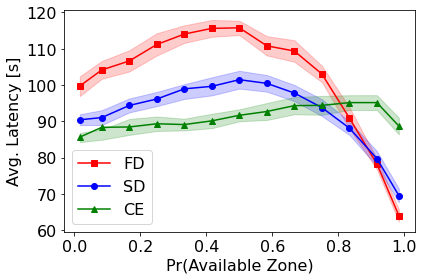

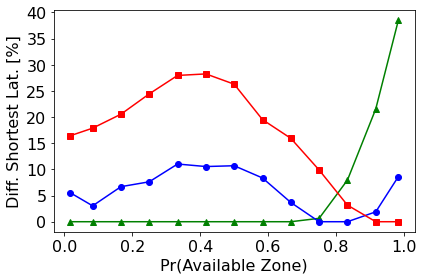

In [15]:
THINK_TIME = 10
NUM_ROBOT_MAX = 100
POLICY_REFRESH = 60
COMM_COST = 1

#############
## Latency ##
#############

dfCentralTmp = df[(df['comm_same_room']==COMM_COST) & (df['S_changePolicyToOpen']==POLICY_REFRESH) & (df['Z_robot']==THINK_TIME) & (df['N_robot']==NUM_ROBOT_MAX)]
dfSingleTmp = dfSingle[(dfSingle['comm_same_room']==COMM_COST) & (dfSingle['Z_robot']==THINK_TIME) & (dfSingle['N_robot']==NUM_ROBOT_MAX)]
dfIndTmp = dfInd[(dfInd['Z_robot']==THINK_TIME) & (dfInd['N_robot']==NUM_ROBOT_MAX)]

fig, ax1 = plt.subplots()

ax1.plot(dfIndTmp['p_openDoor'], dfIndTmp['R_robot_sys_mean'], color='red', marker='s', label='FD')
ax1.fill_between(dfIndTmp['p_openDoor'], dfIndTmp['R_robot_sys_low'], dfIndTmp['R_robot_sys_up'], color='red', alpha=.2)

ax1.plot(dfSingleTmp['p_openDoor'], dfSingleTmp['R_robot_sys_mean'], color='blue', marker='o', label='SD')
ax1.fill_between(dfSingleTmp['p_openDoor'], dfSingleTmp['R_robot_sys_low'], dfSingleTmp['R_robot_sys_up'], color='blue', alpha=.2)

ax1.plot(dfCentralTmp['p_openDoor'], dfCentralTmp['R_robot_sys_mean'], color='green', marker='^', label='CE')
ax1.fill_between(dfCentralTmp['p_openDoor'], dfCentralTmp['R_robot_sys_low'], dfCentralTmp['R_robot_sys_up'], color='green', alpha=.2)

plt.xlabel('Pr(Available Zone)', fontsize=16)
plt.ylabel('Avg. Latency [s]', fontsize=16)
#plt.title('N = '+str(NUM_ROBOT_MAX)+' | Z = '+str(THINK_TIME)+' | Comm. Cost = '+str(COMM_COST)+' | Policy Refresh = '+str(POLICY_REFRESH))
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/50-50_emergencyExit_N'+str(NUM_ROBOT_MAX)+'_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_lat.pdf')
plt.show()

#############
### Error ###
#############

df1 = dfCentralTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()
df2 = dfSingleTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()
df3 = dfIndTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()

dfTot = df1.join(df2.join(df3, rsuffix='_distr'), lsuffix='_central', rsuffix='_semi')
dfTot.drop(['p_openDoor_semi', 'p_openDoor_distr'], axis=1, inplace=True)
dfTot.rename({'p_openDoor_central':'p_openDoor'}, inplace=True)

dfTot['min_R_robot_sys_mean'] = dfTot[['R_robot_sys_mean_central', 'R_robot_sys_mean_semi', 'R_robot_sys_mean_distr']].min(axis=1)

dfTot['diffCentralMin'] = abs(dfTot['R_robot_sys_mean_central'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffSemiMin'] = abs(dfTot['R_robot_sys_mean_semi'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffDistrMin'] = abs(dfTot['R_robot_sys_mean_distr'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']

fig, ax1 = plt.subplots()

ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffCentralMin']*100, color='green', marker='^', label='CE')
ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffSemiMin']*100, color='blue', marker='o', label='SD')
ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffDistrMin']*100, color='red', marker='s', label='FD')

plt.xlabel('Pr(Available Zone)', fontsize=16)
plt.ylabel('Diff. Shortest Lat. [%]', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/50-50_emergencyExit_N'+str(NUM_ROBOT_MAX)+'_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_diff.pdf')
plt.show()

# Figure 12

Time required to simulate:
- the centralized architecture = ~20 minutes
- the semi-distributed architecture = ~20 minutes
- the fully-distributed architecture = ~20 minutes

In [16]:
df = pd.read_csv('./figures10and12/results/stairs_elevator/slidingDoor_centralizedDecision_stairsElevator_varArrivals/slidingDoor_centralizedDecision_stairsElevator_collectResults.csv')
df.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
df.drop(list(df.filter(regex = 'reqB')), axis=1, inplace=True)
df['p_openDoor'] = df['S_door_closing'] / (df['S_door_opening'] + df['S_door_closing'])
df.sort_values(by=['p_openDoor'], inplace=True)
df[df == np.inf] = 0.0

In [17]:
#############
### Robot ###
#############

###### Mean values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    df['X1_'+str(t)+'_A_mean'] = df['X_'+str(t)+'_success1_A_mean'] + df['X_'+str(t)+'_fail1_A_mean'] + df['X_'+str(t)+'_goSlow1_A_mean']
    df['p'+str(t)+'_fastSucc1_A_mean'] = df['X_'+str(t)+'_success1_A_mean'] / df['X1_'+str(t)+'_A_mean']
    df['p'+str(t)+'_fastFail1_A_mean'] = df['X_'+str(t)+'_fail1_A_mean'] / df['X1_'+str(t)+'_A_mean']
    df['p'+str(t)+'_slow1_A_mean'] = df['X_'+str(t)+'_goSlow1_A_mean'] / df['X1_'+str(t)+'_A_mean']
    df['X1_'+str(t)+'_B_mean'] = df['X_'+str(t)+'_success1_B_mean'] + df['X_'+str(t)+'_fail1_B_mean'] + df['X_'+str(t)+'_goSlow1_B_mean']
    df['p'+str(t)+'_fastSucc1_B_mean'] = df['X_'+str(t)+'_success1_B_mean'] / df['X1_'+str(t)+'_B_mean']
    df['p'+str(t)+'_fastFail1_B_mean'] = df['X_'+str(t)+'_fail1_B_mean'] / df['X1_'+str(t)+'_B_mean']
    df['p'+str(t)+'_slow1_B_mean'] = df['X_'+str(t)+'_goSlow1_B_mean'] / df['X1_'+str(t)+'_B_mean']    
    df['X2_'+str(t)+'_A_mean'] = df['X_'+str(t)+'_success2_A_mean'] + df['X_'+str(t)+'_fail2_A_mean'] + df['X_'+str(t)+'_elevator2_A_mean']
    df['p'+str(t)+'_fastSucc2_A_mean'] = df['X_'+str(t)+'_success2_A_mean'] / df['X2_'+str(t)+'_A_mean']
    df['p'+str(t)+'_fastFail2_A_mean'] = df['X_'+str(t)+'_fail2_A_mean'] / df['X2_'+str(t)+'_A_mean']
    df['p'+str(t)+'_elevator2_A_mean'] = df['X_'+str(t)+'_elevator2_A_mean'] / df['X2_'+str(t)+'_A_mean']
    df['X2_'+str(t)+'_B_mean'] = df['X_'+str(t)+'_success2_B_mean'] + df['X_'+str(t)+'_fail2_B_mean'] + df['X_'+str(t)+'_elevator2_B_mean']
    df['p'+str(t)+'_fastSucc2_B_mean'] = df['X_'+str(t)+'_success2_B_mean'] / df['X2_'+str(t)+'_B_mean']
    df['p'+str(t)+'_fastFail2_B_mean'] = df['X_'+str(t)+'_fail2_B_mean'] / df['X2_'+str(t)+'_B_mean']
    df['p'+str(t)+'_elevator2_B_mean'] = df['X_'+str(t)+'_elevator2_B_mean'] / df['X2_'+str(t)+'_B_mean']

df[df.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    df['R1_'+str(t)+'_A_mean'] = df['R_'+str(t)+'_choosing1_A_mean'] + df['p'+str(t)+'_fastSucc1_A_mean'] * (df['R_'+str(t)+'_reachDoor1_A_mean'] + df['R_'+str(t)+'_driveThru1_A_mean'] + df['R_'+str(t)+'_driveFwd1_A_mean']) + df['p'+str(t)+'_fastFail1_A_mean'] * (df['R_'+str(t)+'_reachDoor1_A_mean'] + df['R_'+str(t)+'_driveThru1_A_mean'] + df['R_'+str(t)+'_driveBack1_A_mean'] + df['R_'+str(t)+'_driveAround1_A_mean']) + df['p'+str(t)+'_slow1_A_mean'] * df['R_'+str(t)+'_driveAround1_A_mean']
    df['R1_'+str(t)+'_B_mean'] = df['R_'+str(t)+'_choosing1_B_mean'] + df['p'+str(t)+'_fastSucc1_B_mean'] * (df['R_'+str(t)+'_reachDoor1_B_mean'] + df['R_'+str(t)+'_driveThru1_B_mean'] + df['R_'+str(t)+'_driveFwd1_B_mean']) + df['p'+str(t)+'_fastFail1_B_mean'] * (df['R_'+str(t)+'_reachDoor1_B_mean'] + df['R_'+str(t)+'_driveThru1_B_mean'] + df['R_'+str(t)+'_driveBack1_B_mean'] + df['R_'+str(t)+'_driveAround1_B_mean']) + df['p'+str(t)+'_slow1_B_mean'] * df['R_'+str(t)+'_driveAround1_B_mean']
    df['R2_'+str(t)+'_A_mean'] = df['R_'+str(t)+'_choosing2_A_mean'] + df['p'+str(t)+'_fastSucc2_A_mean'] * (df['R_'+str(t)+'_startClimbing2_A_mean'] + df['R_'+str(t)+'_obstacles?2_A_mean'] + df['R_'+str(t)+'_keepClimbing2_A_mean']) + df['p'+str(t)+'_fastFail2_A_mean'] * (df['R_'+str(t)+'_startClimbing2_A_mean'] + df['R_'+str(t)+'_obstacles?2_A_mean'] + df['R_'+str(t)+'_goBack2_A_mean'] + df['R_'+str(t)+'_boarding2_A_mean'] + df['R_'+str(t)+'_onBoard2_A_mean']) + df['p'+str(t)+'_elevator2_A_mean'] * (df['R_'+str(t)+'_boarding2_A_mean'] + df['R_'+str(t)+'_onBoard2_A_mean'])
    df['R2_'+str(t)+'_B_mean'] = df['R_'+str(t)+'_choosing2_B_mean'] + df['p'+str(t)+'_fastSucc2_B_mean'] * (df['R_'+str(t)+'_startClimbing2_B_mean'] + df['R_'+str(t)+'_obstacles?2_B_mean'] + df['R_'+str(t)+'_keepClimbing2_B_mean']) + df['p'+str(t)+'_fastFail2_B_mean'] * (df['R_'+str(t)+'_startClimbing2_B_mean'] + df['R_'+str(t)+'_obstacles?2_B_mean'] + df['R_'+str(t)+'_goBack2_B_mean'] + df['R_'+str(t)+'_boarding2_B_mean'] + df['R_'+str(t)+'_onBoard2_B_mean']) + df['p'+str(t)+'_elevator2_B_mean'] * (df['R_'+str(t)+'_boarding2_B_mean'] + df['R_'+str(t)+'_onBoard2_B_mean'])

df['X1_A_mean'] = df['X1_legs_A_mean'] + df['X1_wheels_A_mean']
df['X1_B_mean'] = df['X1_legs_B_mean'] + df['X1_wheels_B_mean']
df['R1_sys_mean'] = (df['X1_legs_A_mean']/df['X1_A_mean']) * df['R1_legs_A_mean'] + (df['X1_wheels_A_mean']/df['X1_A_mean']) * df['R1_wheels_A_mean'] + (df['X1_legs_B_mean']/df['X1_B_mean']) * df['R1_legs_B_mean'] + (df['X1_wheels_B_mean']/df['X1_B_mean']) * df['R1_wheels_B_mean']
df['X2_A_mean'] = df['X2_legs_A_mean'] + df['X2_wheels_A_mean']
df['X2_B_mean'] = df['X2_legs_B_mean'] + df['X2_wheels_B_mean']
df['R2_sys_mean'] = (df['X2_legs_A_mean']/df['X2_A_mean']) * df['R2_legs_A_mean'] + (df['X2_wheels_A_mean']/df['X2_A_mean']) * df['R2_wheels_A_mean'] + (df['X2_legs_B_mean']/df['X2_B_mean']) * df['R2_legs_B_mean'] + (df['X2_wheels_B_mean']/df['X2_B_mean']) * df['R2_wheels_B_mean']
    
    
###### Lower bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    df['X1_'+str(t)+'_A_low'] = df['X_'+str(t)+'_success1_A_low'] + df['X_'+str(t)+'_fail1_A_low'] + df['X_'+str(t)+'_goSlow1_A_low']
    df['p'+str(t)+'_fastSucc1_A_low'] = df['X_'+str(t)+'_success1_A_low'] / df['X1_'+str(t)+'_A_low']
    df['p'+str(t)+'_fastFail1_A_low'] = df['X_'+str(t)+'_fail1_A_low'] / df['X1_'+str(t)+'_A_low']
    df['p'+str(t)+'_slow1_A_low'] = df['X_'+str(t)+'_goSlow1_A_low'] / df['X1_'+str(t)+'_A_low']
    df['X1_'+str(t)+'_B_low'] = df['X_'+str(t)+'_success1_B_low'] + df['X_'+str(t)+'_fail1_B_low'] + df['X_'+str(t)+'_goSlow1_B_low']
    df['p'+str(t)+'_fastSucc1_B_low'] = df['X_'+str(t)+'_success1_B_low'] / df['X1_'+str(t)+'_B_low']
    df['p'+str(t)+'_fastFail1_B_low'] = df['X_'+str(t)+'_fail1_B_low'] / df['X1_'+str(t)+'_B_low']
    df['p'+str(t)+'_slow1_B_low'] = df['X_'+str(t)+'_goSlow1_B_low'] / df['X1_'+str(t)+'_B_low']    
    df['X2_'+str(t)+'_A_low'] = df['X_'+str(t)+'_success2_A_low'] + df['X_'+str(t)+'_fail2_A_low'] + df['X_'+str(t)+'_elevator2_A_low']
    df['p'+str(t)+'_fastSucc2_A_low'] = df['X_'+str(t)+'_success2_A_low'] / df['X2_'+str(t)+'_A_low']
    df['p'+str(t)+'_fastFail2_A_low'] = df['X_'+str(t)+'_fail2_A_low'] / df['X2_'+str(t)+'_A_low']
    df['p'+str(t)+'_elevator2_A_low'] = df['X_'+str(t)+'_elevator2_A_low'] / df['X2_'+str(t)+'_A_low']
    df['X2_'+str(t)+'_B_low'] = df['X_'+str(t)+'_success2_B_low'] + df['X_'+str(t)+'_fail2_B_low'] + df['X_'+str(t)+'_elevator2_B_low']
    df['p'+str(t)+'_fastSucc2_B_low'] = df['X_'+str(t)+'_success2_B_low'] / df['X2_'+str(t)+'_B_low']
    df['p'+str(t)+'_fastFail2_B_low'] = df['X_'+str(t)+'_fail2_B_low'] / df['X2_'+str(t)+'_B_low']
    df['p'+str(t)+'_elevator2_B_low'] = df['X_'+str(t)+'_elevator2_B_low'] / df['X2_'+str(t)+'_B_low']

df[df.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    df['R1_'+str(t)+'_A_low'] = df['R_'+str(t)+'_choosing1_A_low'] + df['p'+str(t)+'_fastSucc1_A_low'] * (df['R_'+str(t)+'_reachDoor1_A_low'] + df['R_'+str(t)+'_driveThru1_A_low'] + df['R_'+str(t)+'_driveFwd1_A_low']) + df['p'+str(t)+'_fastFail1_A_low'] * (df['R_'+str(t)+'_reachDoor1_A_low'] + df['R_'+str(t)+'_driveThru1_A_low'] + df['R_'+str(t)+'_driveBack1_A_low'] + df['R_'+str(t)+'_driveAround1_A_low']) + df['p'+str(t)+'_slow1_A_low'] * df['R_'+str(t)+'_driveAround1_A_low']
    df['R1_'+str(t)+'_B_low'] = df['R_'+str(t)+'_choosing1_B_low'] + df['p'+str(t)+'_fastSucc1_B_low'] * (df['R_'+str(t)+'_reachDoor1_B_low'] + df['R_'+str(t)+'_driveThru1_B_low'] + df['R_'+str(t)+'_driveFwd1_B_low']) + df['p'+str(t)+'_fastFail1_B_low'] * (df['R_'+str(t)+'_reachDoor1_B_low'] + df['R_'+str(t)+'_driveThru1_B_low'] + df['R_'+str(t)+'_driveBack1_B_low'] + df['R_'+str(t)+'_driveAround1_B_low']) + df['p'+str(t)+'_slow1_B_low'] * df['R_'+str(t)+'_driveAround1_B_low']
    df['R2_'+str(t)+'_A_low'] = df['R_'+str(t)+'_choosing2_A_low'] + df['p'+str(t)+'_fastSucc2_A_low'] * (df['R_'+str(t)+'_startClimbing2_A_low'] + df['R_'+str(t)+'_obstacles?2_A_low'] + df['R_'+str(t)+'_keepClimbing2_A_low']) + df['p'+str(t)+'_fastFail2_A_low'] * (df['R_'+str(t)+'_startClimbing2_A_low'] + df['R_'+str(t)+'_obstacles?2_A_low'] + df['R_'+str(t)+'_goBack2_A_low'] + df['R_'+str(t)+'_boarding2_A_low'] + df['R_'+str(t)+'_onBoard2_A_low']) + df['p'+str(t)+'_elevator2_A_low'] * (df['R_'+str(t)+'_boarding2_A_low'] + df['R_'+str(t)+'_onBoard2_A_low'])
    df['R2_'+str(t)+'_B_low'] = df['R_'+str(t)+'_choosing2_B_low'] + df['p'+str(t)+'_fastSucc2_B_low'] * (df['R_'+str(t)+'_startClimbing2_B_low'] + df['R_'+str(t)+'_obstacles?2_B_low'] + df['R_'+str(t)+'_keepClimbing2_B_low']) + df['p'+str(t)+'_fastFail2_B_low'] * (df['R_'+str(t)+'_startClimbing2_B_low'] + df['R_'+str(t)+'_obstacles?2_B_low'] + df['R_'+str(t)+'_goBack2_B_low'] + df['R_'+str(t)+'_boarding2_B_low'] + df['R_'+str(t)+'_onBoard2_B_low']) + df['p'+str(t)+'_elevator2_B_low'] * (df['R_'+str(t)+'_boarding2_B_low'] + df['R_'+str(t)+'_onBoard2_B_low'])

df['X1_A_low'] = df['X1_legs_A_low'] + df['X1_wheels_A_low']
df['X1_B_low'] = df['X1_legs_B_low'] + df['X1_wheels_B_low']
df['R1_sys_low'] = (df['X1_legs_A_low']/df['X1_A_low']) * df['R1_legs_A_low'] + (df['X1_wheels_A_low']/df['X1_A_low']) * df['R1_wheels_A_low'] + (df['X1_legs_B_low']/df['X1_B_low']) * df['R1_legs_B_low'] + (df['X1_wheels_B_low']/df['X1_B_low']) * df['R1_wheels_B_low']
df['X2_A_low'] = df['X2_legs_A_low'] + df['X2_wheels_A_low']
df['X2_B_low'] = df['X2_legs_B_low'] + df['X2_wheels_B_low']
df['R2_sys_low'] = (df['X2_legs_A_low']/df['X2_A_low']) * df['R2_legs_A_low'] + (df['X2_wheels_A_low']/df['X2_A_low']) * df['R2_wheels_A_low'] + (df['X2_legs_B_low']/df['X2_B_low']) * df['R2_legs_B_low'] + (df['X2_wheels_B_low']/df['X2_B_low']) * df['R2_wheels_B_low']

    
###### Upper bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    df['X1_'+str(t)+'_A_up'] = df['X_'+str(t)+'_success1_A_up'] + df['X_'+str(t)+'_fail1_A_up'] + df['X_'+str(t)+'_goSlow1_A_up']
    df['p'+str(t)+'_fastSucc1_A_up'] = df['X_'+str(t)+'_success1_A_up'] / df['X1_'+str(t)+'_A_up']
    df['p'+str(t)+'_fastFail1_A_up'] = df['X_'+str(t)+'_fail1_A_up'] / df['X1_'+str(t)+'_A_up']
    df['p'+str(t)+'_slow1_A_up'] = df['X_'+str(t)+'_goSlow1_A_up'] / df['X1_'+str(t)+'_A_up']
    df['X1_'+str(t)+'_B_up'] = df['X_'+str(t)+'_success1_B_up'] + df['X_'+str(t)+'_fail1_B_up'] + df['X_'+str(t)+'_goSlow1_B_up']
    df['p'+str(t)+'_fastSucc1_B_up'] = df['X_'+str(t)+'_success1_B_up'] / df['X1_'+str(t)+'_B_up']
    df['p'+str(t)+'_fastFail1_B_up'] = df['X_'+str(t)+'_fail1_B_up'] / df['X1_'+str(t)+'_B_up']
    df['p'+str(t)+'_slow1_B_up'] = df['X_'+str(t)+'_goSlow1_B_up'] / df['X1_'+str(t)+'_B_up']    
    df['X2_'+str(t)+'_A_up'] = df['X_'+str(t)+'_success2_A_up'] + df['X_'+str(t)+'_fail2_A_up'] + df['X_'+str(t)+'_elevator2_A_up']
    df['p'+str(t)+'_fastSucc2_A_up'] = df['X_'+str(t)+'_success2_A_up'] / df['X2_'+str(t)+'_A_up']
    df['p'+str(t)+'_fastFail2_A_up'] = df['X_'+str(t)+'_fail2_A_up'] / df['X2_'+str(t)+'_A_up']
    df['p'+str(t)+'_elevator2_A_up'] = df['X_'+str(t)+'_elevator2_A_up'] / df['X2_'+str(t)+'_A_up']
    df['X2_'+str(t)+'_B_up'] = df['X_'+str(t)+'_success2_B_up'] + df['X_'+str(t)+'_fail2_B_up'] + df['X_'+str(t)+'_elevator2_B_up']
    df['p'+str(t)+'_fastSucc2_B_up'] = df['X_'+str(t)+'_success2_B_up'] / df['X2_'+str(t)+'_B_up']
    df['p'+str(t)+'_fastFail2_B_up'] = df['X_'+str(t)+'_fail2_B_up'] / df['X2_'+str(t)+'_B_up']
    df['p'+str(t)+'_elevator2_B_up'] = df['X_'+str(t)+'_elevator2_B_up'] / df['X2_'+str(t)+'_B_up']

df[df.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    df['R1_'+str(t)+'_A_up'] = df['R_'+str(t)+'_choosing1_A_up'] + df['p'+str(t)+'_fastSucc1_A_up'] * (df['R_'+str(t)+'_reachDoor1_A_up'] + df['R_'+str(t)+'_driveThru1_A_up'] + df['R_'+str(t)+'_driveFwd1_A_up']) + df['p'+str(t)+'_fastFail1_A_up'] * (df['R_'+str(t)+'_reachDoor1_A_up'] + df['R_'+str(t)+'_driveThru1_A_up'] + df['R_'+str(t)+'_driveBack1_A_up'] + df['R_'+str(t)+'_driveAround1_A_up']) + df['p'+str(t)+'_slow1_A_up'] * df['R_'+str(t)+'_driveAround1_A_up']
    df['R1_'+str(t)+'_B_up'] = df['R_'+str(t)+'_choosing1_B_up'] + df['p'+str(t)+'_fastSucc1_B_up'] * (df['R_'+str(t)+'_reachDoor1_B_up'] + df['R_'+str(t)+'_driveThru1_B_up'] + df['R_'+str(t)+'_driveFwd1_B_up']) + df['p'+str(t)+'_fastFail1_B_up'] * (df['R_'+str(t)+'_reachDoor1_B_up'] + df['R_'+str(t)+'_driveThru1_B_up'] + df['R_'+str(t)+'_driveBack1_B_up'] + df['R_'+str(t)+'_driveAround1_B_up']) + df['p'+str(t)+'_slow1_B_up'] * df['R_'+str(t)+'_driveAround1_B_up']
    df['R2_'+str(t)+'_A_up'] = df['R_'+str(t)+'_choosing2_A_up'] + df['p'+str(t)+'_fastSucc2_A_up'] * (df['R_'+str(t)+'_startClimbing2_A_up'] + df['R_'+str(t)+'_obstacles?2_A_up'] + df['R_'+str(t)+'_keepClimbing2_A_up']) + df['p'+str(t)+'_fastFail2_A_up'] * (df['R_'+str(t)+'_startClimbing2_A_up'] + df['R_'+str(t)+'_obstacles?2_A_up'] + df['R_'+str(t)+'_goBack2_A_up'] + df['R_'+str(t)+'_boarding2_A_up'] + df['R_'+str(t)+'_onBoard2_A_up']) + df['p'+str(t)+'_elevator2_A_up'] * (df['R_'+str(t)+'_boarding2_A_up'] + df['R_'+str(t)+'_onBoard2_A_up'])
    df['R2_'+str(t)+'_B_up'] = df['R_'+str(t)+'_choosing2_B_up'] + df['p'+str(t)+'_fastSucc2_B_up'] * (df['R_'+str(t)+'_startClimbing2_B_up'] + df['R_'+str(t)+'_obstacles?2_B_up'] + df['R_'+str(t)+'_keepClimbing2_B_up']) + df['p'+str(t)+'_fastFail2_B_up'] * (df['R_'+str(t)+'_startClimbing2_B_up'] + df['R_'+str(t)+'_obstacles?2_B_up'] + df['R_'+str(t)+'_goBack2_B_up'] + df['R_'+str(t)+'_boarding2_B_up'] + df['R_'+str(t)+'_onBoard2_B_up']) + df['p'+str(t)+'_elevator2_B_up'] * (df['R_'+str(t)+'_boarding2_B_up'] + df['R_'+str(t)+'_onBoard2_B_up'])

df['X1_A_up'] = df['X1_legs_A_up'] + df['X1_wheels_A_up']
df['X1_B_up'] = df['X1_legs_B_up'] + df['X1_wheels_B_up']
df['R1_sys_up'] = (df['X1_legs_A_up']/df['X1_A_up']) * df['R1_legs_A_up'] + (df['X1_wheels_A_up']/df['X1_A_up']) * df['R1_wheels_A_up'] + (df['X1_legs_B_up']/df['X1_B_up']) * df['R1_legs_B_up'] + (df['X1_wheels_B_up']/df['X1_B_up']) * df['R1_wheels_B_up']
df['X2_A_up'] = df['X2_legs_A_up'] + df['X2_wheels_A_up']
df['X2_B_up'] = df['X2_legs_B_up'] + df['X2_wheels_B_up']
df['R2_sys_up'] = (df['X2_legs_A_up']/df['X2_A_up']) * df['R2_legs_A_up'] + (df['X2_wheels_A_up']/df['X2_A_up']) * df['R2_wheels_A_up'] + (df['X2_legs_B_up']/df['X2_B_up']) * df['R2_legs_B_up'] + (df['X2_wheels_B_up']/df['X2_B_up']) * df['R2_wheels_B_up']


df['R_robot_sys_mean'] = df['R1_sys_mean'] + df['R2_sys_mean']
df['R_robot_sys_low'] = df['R1_sys_low'] + df['R2_sys_low']
df['R_robot_sys_up'] = df['R1_sys_up'] + df['R2_sys_up']

In [18]:
dfSingle = pd.read_csv('./figures10and12/results/stairs_elevator/slidingDoor_semiDistrDecision_stairsElevator_varArrivals/slidingDoor_semiDistrDecision_stairsElevator_collectResults.csv')
dfSingle.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfSingle.drop(list(dfSingle.filter(regex = 'reqB')), axis=1, inplace=True)
dfSingle['p_openDoor'] = dfSingle['S_door_closing'] / (dfSingle['S_door_opening'] + dfSingle['S_door_closing'])
dfSingle.sort_values(by=['p_openDoor'], inplace=True)
dfSingle[dfSingle == np.inf] = 0.0

In [19]:
#############
### Robot ###
#############

###### Mean values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfSingle['X1_'+str(t)+'_A_mean'] = dfSingle['X_'+str(t)+'_success1_A_mean'] + dfSingle['X_'+str(t)+'_fail1_A_mean'] + dfSingle['X_'+str(t)+'_follow1_A_mean']
    dfSingle['p'+str(t)+'_fast1_A_mean'] = dfSingle['X_'+str(t)+'_success1_A_mean'] / dfSingle['X1_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_leader1_A_mean'] = dfSingle['X_'+str(t)+'_fail1_A_mean'] / dfSingle['X1_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_slow1_A_mean'] = dfSingle['X_'+str(t)+'_follow1_A_mean'] / dfSingle['X1_'+str(t)+'_A_mean']
    dfSingle['X1_'+str(t)+'_B_mean'] = dfSingle['X_'+str(t)+'_success1_B_mean'] + dfSingle['X_'+str(t)+'_fail1_B_mean'] + dfSingle['X_'+str(t)+'_follow1_B_mean']
    dfSingle['p'+str(t)+'_fast1_B_mean'] = dfSingle['X_'+str(t)+'_success1_B_mean'] / dfSingle['X1_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_leader1_B_mean'] = dfSingle['X_'+str(t)+'_fail1_B_mean'] / dfSingle['X1_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_slow1_B_mean'] = dfSingle['X_'+str(t)+'_follow1_B_mean'] / dfSingle['X1_'+str(t)+'_B_mean']        
    dfSingle['X2_'+str(t)+'_A_mean'] = dfSingle['X_'+str(t)+'_success2_A_mean'] + dfSingle['X_'+str(t)+'_fail2_A_mean'] + dfSingle['X_'+str(t)+'_follow2_A_mean'] + dfSingle['X_'+str(t)+'_elevator2_A_mean']
    dfSingle['p'+str(t)+'_fast2_A_mean'] = dfSingle['X_'+str(t)+'_success2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_leader2_A_mean'] = dfSingle['X_'+str(t)+'_fail2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_slow2_A_mean'] = dfSingle['X_'+str(t)+'_follow2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_elevator2_A_mean'] = dfSingle['X_'+str(t)+'_elevator2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['X2_'+str(t)+'_B_mean'] = dfSingle['X_'+str(t)+'_success2_B_mean'] + dfSingle['X_'+str(t)+'_fail2_B_mean'] + dfSingle['X_'+str(t)+'_follow2_B_mean'] + dfSingle['X_'+str(t)+'_elevator2_B_mean']
    dfSingle['p'+str(t)+'_fast2_B_mean'] = dfSingle['X_'+str(t)+'_success2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_leader2_B_mean'] = dfSingle['X_'+str(t)+'_fail2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_slow2_B_mean'] = dfSingle['X_'+str(t)+'_follow2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_elevator2_B_mean'] = dfSingle['X_'+str(t)+'_elevator2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']

    dfSingle[dfSingle.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfSingle['R1_'+str(t)+'_A_mean'] = dfSingle['R_'+str(t)+'_choosing1_A_mean'] + dfSingle['p'+str(t)+'_fast1_A_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_mean'] + dfSingle['R_'+str(t)+'_driveThru1_A_mean'] + dfSingle['R_'+str(t)+'_driveFwd1_A_mean']) + dfSingle['p'+str(t)+'_slow1_A_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_mean'] + dfSingle['R_'+str(t)+'_driveAround1_A_mean']) + dfSingle['p'+str(t)+'_leader1_A_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_mean'] + dfSingle['R_'+str(t)+'_communicate1_A_mean'] + dfSingle['R_'+str(t)+'_driveBack1_A_mean'] + dfSingle['R_'+str(t)+'_driveAround1_A_mean'])
    dfSingle['R1_'+str(t)+'_B_mean'] = dfSingle['R_'+str(t)+'_choosing1_B_mean'] + dfSingle['p'+str(t)+'_fast1_B_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_mean'] + dfSingle['R_'+str(t)+'_driveThru1_B_mean'] + dfSingle['R_'+str(t)+'_driveFwd1_B_mean']) + dfSingle['p'+str(t)+'_slow1_B_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_mean'] + dfSingle['R_'+str(t)+'_driveAround1_B_mean']) + dfSingle['p'+str(t)+'_leader1_B_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_mean'] + dfSingle['R_'+str(t)+'_communicate1_B_mean'] + dfSingle['R_'+str(t)+'_driveBack1_B_mean'] + dfSingle['R_'+str(t)+'_driveAround1_B_mean'])
    dfSingle['R2_'+str(t)+'_A_mean'] = dfSingle['R_'+str(t)+'_choosing2_A_mean'] + dfSingle['p'+str(t)+'_fast2_A_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_mean'] + dfSingle['R_'+str(t)+'_obstacles?2_A_mean'] + dfSingle['R_'+str(t)+'_keepClimbing2_A_mean']) + dfSingle['p'+str(t)+'_slow2_A_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_mean'] + dfSingle['R_'+str(t)+'_boarding2_A_mean'] + dfSingle['R_'+str(t)+'_onBoard2_A_mean']) + dfSingle['p'+str(t)+'_leader2_A_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_mean'] + dfSingle['R_'+str(t)+'_communicate2_A_mean'] + dfSingle['R_'+str(t)+'_goBack2_A_mean'] + dfSingle['R_'+str(t)+'_boarding2_A_mean'] + dfSingle['R_'+str(t)+'_onBoard2_A_mean']) + dfSingle['p'+str(t)+'_elevator2_A_mean'] * (dfSingle['R_'+str(t)+'_boarding2_A_mean'] + dfSingle['R_'+str(t)+'_onBoard2_A_mean'])
    dfSingle['R2_'+str(t)+'_B_mean'] = dfSingle['R_'+str(t)+'_choosing2_B_mean'] + dfSingle['p'+str(t)+'_fast2_B_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_mean'] + dfSingle['R_'+str(t)+'_obstacles?2_B_mean'] + dfSingle['R_'+str(t)+'_keepClimbing2_B_mean']) + dfSingle['p'+str(t)+'_slow2_B_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_mean'] + dfSingle['R_'+str(t)+'_boarding2_B_mean'] + dfSingle['R_'+str(t)+'_onBoard2_B_mean']) + dfSingle['p'+str(t)+'_leader2_B_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_mean'] + dfSingle['R_'+str(t)+'_communicate2_B_mean'] + dfSingle['R_'+str(t)+'_goBack2_B_mean'] + dfSingle['R_'+str(t)+'_boarding2_B_mean'] + dfSingle['R_'+str(t)+'_onBoard2_B_mean']) + dfSingle['p'+str(t)+'_elevator2_B_mean'] * (dfSingle['R_'+str(t)+'_boarding2_B_mean'] + dfSingle['R_'+str(t)+'_onBoard2_B_mean'])
dfSingle['X1_A_mean'] = dfSingle['X1_legs_A_mean'] + dfSingle['X1_wheels_A_mean']
dfSingle['X1_B_mean'] = dfSingle['X1_legs_B_mean'] + dfSingle['X1_wheels_B_mean']
dfSingle['R1_sys_mean'] = (dfSingle['X1_legs_A_mean']/dfSingle['X1_A_mean']) * dfSingle['R1_legs_A_mean'] + (dfSingle['X1_wheels_A_mean']/dfSingle['X1_A_mean']) * dfSingle['R1_wheels_A_mean'] + (dfSingle['X1_legs_B_mean']/dfSingle['X1_B_mean']) * dfSingle['R1_legs_B_mean'] + (dfSingle['X1_wheels_B_mean']/dfSingle['X1_B_mean']) * dfSingle['R1_wheels_B_mean']
dfSingle['X2_A_mean'] = dfSingle['X2_legs_A_mean'] + dfSingle['X2_wheels_A_mean']
dfSingle['X2_B_mean'] = dfSingle['X2_legs_B_mean'] + dfSingle['X2_wheels_B_mean']
dfSingle['R2_sys_mean'] = (dfSingle['X2_legs_A_mean']/dfSingle['X2_A_mean']) * dfSingle['R2_legs_A_mean'] + (dfSingle['X2_wheels_A_mean']/dfSingle['X2_A_mean']) * dfSingle['R2_wheels_A_mean'] + (dfSingle['X2_legs_B_mean']/dfSingle['X2_B_mean']) * dfSingle['R2_legs_B_mean'] + (dfSingle['X2_wheels_B_mean']/dfSingle['X2_B_mean']) * dfSingle['R2_wheels_B_mean']
    
    
###### Lower bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfSingle['X1_'+str(t)+'_A_low'] = dfSingle['X_'+str(t)+'_success1_A_low'] + dfSingle['X_'+str(t)+'_fail1_A_low'] + dfSingle['X_'+str(t)+'_follow1_A_low']
    dfSingle['p'+str(t)+'_fast1_A_low'] = dfSingle['X_'+str(t)+'_success1_A_low'] / dfSingle['X1_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_leader1_A_low'] = dfSingle['X_'+str(t)+'_fail1_A_low'] / dfSingle['X1_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_slow1_A_low'] = dfSingle['X_'+str(t)+'_follow1_A_low'] / dfSingle['X1_'+str(t)+'_A_low']
    dfSingle['X1_'+str(t)+'_B_low'] = dfSingle['X_'+str(t)+'_success1_B_low'] + dfSingle['X_'+str(t)+'_fail1_B_low'] + dfSingle['X_'+str(t)+'_follow1_B_low']
    dfSingle['p'+str(t)+'_fast1_B_low'] = dfSingle['X_'+str(t)+'_success1_B_low'] / dfSingle['X1_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_leader1_B_low'] = dfSingle['X_'+str(t)+'_fail1_B_low'] / dfSingle['X1_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_slow1_B_low'] = dfSingle['X_'+str(t)+'_follow1_B_low'] / dfSingle['X1_'+str(t)+'_B_low']        
    dfSingle['X2_'+str(t)+'_A_low'] = dfSingle['X_'+str(t)+'_success2_A_low'] + dfSingle['X_'+str(t)+'_fail2_A_low'] + dfSingle['X_'+str(t)+'_follow2_A_low'] + dfSingle['X_'+str(t)+'_elevator2_A_low']
    dfSingle['p'+str(t)+'_fast2_A_low'] = dfSingle['X_'+str(t)+'_success2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_leader2_A_low'] = dfSingle['X_'+str(t)+'_fail2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_slow2_A_low'] = dfSingle['X_'+str(t)+'_follow2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_elevator2_A_low'] = dfSingle['X_'+str(t)+'_elevator2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['X2_'+str(t)+'_B_low'] = dfSingle['X_'+str(t)+'_success2_B_low'] + dfSingle['X_'+str(t)+'_fail2_B_low'] + dfSingle['X_'+str(t)+'_follow2_B_low'] + dfSingle['X_'+str(t)+'_elevator2_B_low']
    dfSingle['p'+str(t)+'_fast2_B_low'] = dfSingle['X_'+str(t)+'_success2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_leader2_B_low'] = dfSingle['X_'+str(t)+'_fail2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_slow2_B_low'] = dfSingle['X_'+str(t)+'_follow2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_elevator2_B_low'] = dfSingle['X_'+str(t)+'_elevator2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']

    dfSingle[dfSingle.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfSingle['R1_'+str(t)+'_A_low'] = dfSingle['R_'+str(t)+'_choosing1_A_low'] + dfSingle['p'+str(t)+'_fast1_A_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_low'] + dfSingle['R_'+str(t)+'_driveThru1_A_low'] + dfSingle['R_'+str(t)+'_driveFwd1_A_low']) + dfSingle['p'+str(t)+'_slow1_A_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_low'] + dfSingle['R_'+str(t)+'_driveAround1_A_low']) + dfSingle['p'+str(t)+'_leader1_A_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_low'] + dfSingle['R_'+str(t)+'_communicate1_A_low'] + dfSingle['R_'+str(t)+'_driveBack1_A_low'] + dfSingle['R_'+str(t)+'_driveAround1_A_low'])
    dfSingle['R1_'+str(t)+'_B_low'] = dfSingle['R_'+str(t)+'_choosing1_B_low'] + dfSingle['p'+str(t)+'_fast1_B_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_low'] + dfSingle['R_'+str(t)+'_driveThru1_B_low'] + dfSingle['R_'+str(t)+'_driveFwd1_B_low']) + dfSingle['p'+str(t)+'_slow1_B_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_low'] + dfSingle['R_'+str(t)+'_driveAround1_B_low']) + dfSingle['p'+str(t)+'_leader1_B_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_low'] + dfSingle['R_'+str(t)+'_communicate1_B_low'] + dfSingle['R_'+str(t)+'_driveBack1_B_low'] + dfSingle['R_'+str(t)+'_driveAround1_B_low'])
    dfSingle['R2_'+str(t)+'_A_low'] = dfSingle['R_'+str(t)+'_choosing2_A_low'] + dfSingle['p'+str(t)+'_fast2_A_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_low'] + dfSingle['R_'+str(t)+'_obstacles?2_A_low'] + dfSingle['R_'+str(t)+'_keepClimbing2_A_low']) + dfSingle['p'+str(t)+'_slow2_A_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_low'] + dfSingle['R_'+str(t)+'_boarding2_A_low'] + dfSingle['R_'+str(t)+'_onBoard2_A_low']) + dfSingle['p'+str(t)+'_leader2_A_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_low'] + dfSingle['R_'+str(t)+'_communicate2_A_low'] + dfSingle['R_'+str(t)+'_goBack2_A_low'] + dfSingle['R_'+str(t)+'_boarding2_A_low'] + dfSingle['R_'+str(t)+'_onBoard2_A_low']) + dfSingle['p'+str(t)+'_elevator2_A_low'] * (dfSingle['R_'+str(t)+'_boarding2_A_low'] + dfSingle['R_'+str(t)+'_onBoard2_A_low'])
    dfSingle['R2_'+str(t)+'_B_low'] = dfSingle['R_'+str(t)+'_choosing2_B_low'] + dfSingle['p'+str(t)+'_fast2_B_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_low'] + dfSingle['R_'+str(t)+'_obstacles?2_B_low'] + dfSingle['R_'+str(t)+'_keepClimbing2_B_low']) + dfSingle['p'+str(t)+'_slow2_B_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_low'] + dfSingle['R_'+str(t)+'_boarding2_B_low'] + dfSingle['R_'+str(t)+'_onBoard2_B_low']) + dfSingle['p'+str(t)+'_leader2_B_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_low'] + dfSingle['R_'+str(t)+'_communicate2_B_low'] + dfSingle['R_'+str(t)+'_goBack2_B_low'] + dfSingle['R_'+str(t)+'_boarding2_B_low'] + dfSingle['R_'+str(t)+'_onBoard2_B_low']) + dfSingle['p'+str(t)+'_elevator2_B_low'] * (dfSingle['R_'+str(t)+'_boarding2_B_low'] + dfSingle['R_'+str(t)+'_onBoard2_B_low'])
dfSingle['X1_A_low'] = dfSingle['X1_legs_A_low'] + dfSingle['X1_wheels_A_low']
dfSingle['X1_B_low'] = dfSingle['X1_legs_B_low'] + dfSingle['X1_wheels_B_low']
dfSingle['R1_sys_low'] = (dfSingle['X1_legs_A_low']/dfSingle['X1_A_low']) * dfSingle['R1_legs_A_low'] + (dfSingle['X1_wheels_A_low']/dfSingle['X1_A_low']) * dfSingle['R1_wheels_A_low'] + (dfSingle['X1_legs_B_low']/dfSingle['X1_B_low']) * dfSingle['R1_legs_B_low'] + (dfSingle['X1_wheels_B_low']/dfSingle['X1_B_low']) * dfSingle['R1_wheels_B_low']
dfSingle['X2_A_low'] = dfSingle['X2_legs_A_low'] + dfSingle['X2_wheels_A_low']
dfSingle['X2_B_low'] = dfSingle['X2_legs_B_low'] + dfSingle['X2_wheels_B_low']
dfSingle['R2_sys_low'] = (dfSingle['X2_legs_A_low']/dfSingle['X2_A_low']) * dfSingle['R2_legs_A_low'] + (dfSingle['X2_wheels_A_low']/dfSingle['X2_A_low']) * dfSingle['R2_wheels_A_low'] + (dfSingle['X2_legs_B_low']/dfSingle['X2_B_low']) * dfSingle['R2_legs_B_low'] + (dfSingle['X2_wheels_B_low']/dfSingle['X2_B_low']) * dfSingle['R2_wheels_B_low']
 
    
###### Upper bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfSingle['X1_'+str(t)+'_A_up'] = dfSingle['X_'+str(t)+'_success1_A_up'] + dfSingle['X_'+str(t)+'_fail1_A_up'] + dfSingle['X_'+str(t)+'_follow1_A_up']
    dfSingle['p'+str(t)+'_fast1_A_up'] = dfSingle['X_'+str(t)+'_success1_A_up'] / dfSingle['X1_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_leader1_A_up'] = dfSingle['X_'+str(t)+'_fail1_A_up'] / dfSingle['X1_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_slow1_A_up'] = dfSingle['X_'+str(t)+'_follow1_A_up'] / dfSingle['X1_'+str(t)+'_A_up']
    dfSingle['X1_'+str(t)+'_B_up'] = dfSingle['X_'+str(t)+'_success1_B_up'] + dfSingle['X_'+str(t)+'_fail1_B_up'] + dfSingle['X_'+str(t)+'_follow1_B_up']
    dfSingle['p'+str(t)+'_fast1_B_up'] = dfSingle['X_'+str(t)+'_success1_B_up'] / dfSingle['X1_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_leader1_B_up'] = dfSingle['X_'+str(t)+'_fail1_B_up'] / dfSingle['X1_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_slow1_B_up'] = dfSingle['X_'+str(t)+'_follow1_B_up'] / dfSingle['X1_'+str(t)+'_B_up']        
    dfSingle['X2_'+str(t)+'_A_up'] = dfSingle['X_'+str(t)+'_success2_A_up'] + dfSingle['X_'+str(t)+'_fail2_A_up'] + dfSingle['X_'+str(t)+'_follow2_A_up'] + dfSingle['X_'+str(t)+'_elevator2_A_up']
    dfSingle['p'+str(t)+'_fast2_A_up'] = dfSingle['X_'+str(t)+'_success2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_leader2_A_up'] = dfSingle['X_'+str(t)+'_fail2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_slow2_A_up'] = dfSingle['X_'+str(t)+'_follow2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_elevator2_A_up'] = dfSingle['X_'+str(t)+'_elevator2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['X2_'+str(t)+'_B_up'] = dfSingle['X_'+str(t)+'_success2_B_up'] + dfSingle['X_'+str(t)+'_fail2_B_up'] + dfSingle['X_'+str(t)+'_follow2_B_up'] + dfSingle['X_'+str(t)+'_elevator2_B_up']
    dfSingle['p'+str(t)+'_fast2_B_up'] = dfSingle['X_'+str(t)+'_success2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_leader2_B_up'] = dfSingle['X_'+str(t)+'_fail2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_slow2_B_up'] = dfSingle['X_'+str(t)+'_follow2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_elevator2_B_up'] = dfSingle['X_'+str(t)+'_elevator2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']

    dfSingle[dfSingle.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfSingle['R1_'+str(t)+'_A_up'] = dfSingle['R_'+str(t)+'_choosing1_A_up'] + dfSingle['p'+str(t)+'_fast1_A_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_up'] + dfSingle['R_'+str(t)+'_driveThru1_A_up'] + dfSingle['R_'+str(t)+'_driveFwd1_A_up']) + dfSingle['p'+str(t)+'_slow1_A_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_up'] + dfSingle['R_'+str(t)+'_driveAround1_A_up']) + dfSingle['p'+str(t)+'_leader1_A_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_up'] + dfSingle['R_'+str(t)+'_communicate1_A_up'] + dfSingle['R_'+str(t)+'_driveBack1_A_up'] + dfSingle['R_'+str(t)+'_driveAround1_A_up'])
    dfSingle['R1_'+str(t)+'_B_up'] = dfSingle['R_'+str(t)+'_choosing1_B_up'] + dfSingle['p'+str(t)+'_fast1_B_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_up'] + dfSingle['R_'+str(t)+'_driveThru1_B_up'] + dfSingle['R_'+str(t)+'_driveFwd1_B_up']) + dfSingle['p'+str(t)+'_slow1_B_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_up'] + dfSingle['R_'+str(t)+'_driveAround1_B_up']) + dfSingle['p'+str(t)+'_leader1_B_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_up'] + dfSingle['R_'+str(t)+'_communicate1_B_up'] + dfSingle['R_'+str(t)+'_driveBack1_B_up'] + dfSingle['R_'+str(t)+'_driveAround1_B_up'])
    dfSingle['R2_'+str(t)+'_A_up'] = dfSingle['R_'+str(t)+'_choosing2_A_up'] + dfSingle['p'+str(t)+'_fast2_A_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_up'] + dfSingle['R_'+str(t)+'_obstacles?2_A_up'] + dfSingle['R_'+str(t)+'_keepClimbing2_A_up']) + dfSingle['p'+str(t)+'_slow2_A_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_up'] + dfSingle['R_'+str(t)+'_boarding2_A_up'] + dfSingle['R_'+str(t)+'_onBoard2_A_up']) + dfSingle['p'+str(t)+'_leader2_A_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_up'] + dfSingle['R_'+str(t)+'_communicate2_A_up'] + dfSingle['R_'+str(t)+'_goBack2_A_up'] + dfSingle['R_'+str(t)+'_boarding2_A_up'] + dfSingle['R_'+str(t)+'_onBoard2_A_up']) + dfSingle['p'+str(t)+'_elevator2_A_up'] * (dfSingle['R_'+str(t)+'_boarding2_A_up'] + dfSingle['R_'+str(t)+'_onBoard2_A_up'])
    dfSingle['R2_'+str(t)+'_B_up'] = dfSingle['R_'+str(t)+'_choosing2_B_up'] + dfSingle['p'+str(t)+'_fast2_B_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_up'] + dfSingle['R_'+str(t)+'_obstacles?2_B_up'] + dfSingle['R_'+str(t)+'_keepClimbing2_B_up']) + dfSingle['p'+str(t)+'_slow2_B_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_up'] + dfSingle['R_'+str(t)+'_boarding2_B_up'] + dfSingle['R_'+str(t)+'_onBoard2_B_up']) + dfSingle['p'+str(t)+'_leader2_B_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_up'] + dfSingle['R_'+str(t)+'_communicate2_B_up'] + dfSingle['R_'+str(t)+'_goBack2_B_up'] + dfSingle['R_'+str(t)+'_boarding2_B_up'] + dfSingle['R_'+str(t)+'_onBoard2_B_up']) + dfSingle['p'+str(t)+'_elevator2_B_up'] * (dfSingle['R_'+str(t)+'_boarding2_B_up'] + dfSingle['R_'+str(t)+'_onBoard2_B_up'])
dfSingle['X1_A_up'] = dfSingle['X1_legs_A_up'] + dfSingle['X1_wheels_A_up']
dfSingle['X1_B_up'] = dfSingle['X1_legs_B_up'] + dfSingle['X1_wheels_B_up']
dfSingle['R1_sys_up'] = (dfSingle['X1_legs_A_up']/dfSingle['X1_A_up']) * dfSingle['R1_legs_A_up'] + (dfSingle['X1_wheels_A_up']/dfSingle['X1_A_up']) * dfSingle['R1_wheels_A_up'] + (dfSingle['X1_legs_B_up']/dfSingle['X1_B_up']) * dfSingle['R1_legs_B_up'] + (dfSingle['X1_wheels_B_up']/dfSingle['X1_B_up']) * dfSingle['R1_wheels_B_up']
dfSingle['X2_A_up'] = dfSingle['X2_legs_A_up'] + dfSingle['X2_wheels_A_up']
dfSingle['X2_B_up'] = dfSingle['X2_legs_B_up'] + dfSingle['X2_wheels_B_up']
dfSingle['R2_sys_up'] = (dfSingle['X2_legs_A_up']/dfSingle['X2_A_up']) * dfSingle['R2_legs_A_up'] + (dfSingle['X2_wheels_A_up']/dfSingle['X2_A_up']) * dfSingle['R2_wheels_A_up'] + (dfSingle['X2_legs_B_up']/dfSingle['X2_B_up']) * dfSingle['R2_legs_B_up'] + (dfSingle['X2_wheels_B_up']/dfSingle['X2_B_up']) * dfSingle['R2_wheels_B_up']


dfSingle['R_robot_sys_mean'] = dfSingle['R1_sys_mean'] + dfSingle['R2_sys_mean']
dfSingle['R_robot_sys_low'] = dfSingle['R1_sys_low'] + dfSingle['R2_sys_low']
dfSingle['R_robot_sys_up'] = dfSingle['R1_sys_up'] + dfSingle['R2_sys_up']

In [20]:
dfInd = pd.read_csv('./figures10and12/results/stairs_elevator/slidingDoor_independentDecision_stairsElevator_varArrivals/slidingDoor_independentDecision_stairsElevator_collectResults.csv')
dfInd.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfInd.drop(list(dfInd.filter(regex = 'reqB')), axis=1, inplace=True)
dfInd['p_openDoor'] = dfInd['S_door_closing'] / (dfInd['S_door_opening'] + dfInd['S_door_closing'])
dfInd.sort_values(by=['p_openDoor'], inplace=True)
dfInd[dfInd == np.inf] = 0.0

In [21]:
#############
### Robot ###
#############

###### Mean values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfInd['X1_'+str(t)+'_A_mean'] = dfInd['X_'+str(t)+'_success1_A_mean'] + dfInd['X_'+str(t)+'_fail1_A_mean']
    dfInd['p'+str(t)+'_fastSucc1_A_mean'] = dfInd['X_'+str(t)+'_success1_A_mean'] / dfInd['X1_'+str(t)+'_A_mean']
    dfInd['p'+str(t)+'_fastFail1_A_mean'] = dfInd['X_'+str(t)+'_fail1_A_mean'] / dfInd['X1_'+str(t)+'_A_mean']
    dfInd['X1_'+str(t)+'_B_mean'] = dfInd['X_'+str(t)+'_success1_B_mean'] + dfInd['X_'+str(t)+'_fail1_B_mean']
    dfInd['p'+str(t)+'_fastSucc1_B_mean'] = dfInd['X_'+str(t)+'_success1_B_mean'] / dfInd['X1_'+str(t)+'_B_mean']
    dfInd['p'+str(t)+'_fastFail1_B_mean'] = dfInd['X_'+str(t)+'_fail1_B_mean'] / dfInd['X1_'+str(t)+'_B_mean']
    dfInd['X2_'+str(t)+'_A_mean'] = dfInd['X_'+str(t)+'_success2_A_mean'] + dfInd['X_'+str(t)+'_fail2_A_mean'] + dfInd['X_'+str(t)+'_elevator2_A_mean']
    dfInd['p'+str(t)+'_fastSucc2_A_mean'] = dfInd['X_'+str(t)+'_success2_A_mean'] / dfInd['X2_'+str(t)+'_A_mean']
    dfInd['p'+str(t)+'_fastFail2_A_mean'] = dfInd['X_'+str(t)+'_fail2_A_mean'] / dfInd['X2_'+str(t)+'_A_mean']
    dfInd['p'+str(t)+'_elevator2_A_mean'] = dfInd['X_'+str(t)+'_elevator2_A_mean'] / dfInd['X2_'+str(t)+'_A_mean']
    dfInd['X2_'+str(t)+'_B_mean'] = dfInd['X_'+str(t)+'_success2_B_mean'] + dfInd['X_'+str(t)+'_fail2_B_mean'] + dfInd['X_'+str(t)+'_elevator2_B_mean']
    dfInd['p'+str(t)+'_fastSucc2_B_mean'] = dfInd['X_'+str(t)+'_success2_B_mean'] / dfInd['X2_'+str(t)+'_B_mean']
    dfInd['p'+str(t)+'_fastFail2_B_mean'] = dfInd['X_'+str(t)+'_fail2_B_mean'] / dfInd['X2_'+str(t)+'_B_mean']
    dfInd['p'+str(t)+'_elevator2_B_mean'] = dfInd['X_'+str(t)+'_elevator2_B_mean'] / dfInd['X2_'+str(t)+'_B_mean']

dfInd[dfInd.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfInd['R1_'+str(t)+'_A_mean'] = dfInd['R_'+str(t)+'_choosing1_A_mean'] + dfInd['p'+str(t)+'_fastSucc1_A_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_A_mean'] + dfInd['R_'+str(t)+'_driveThru1_A_mean'] + dfInd['R_'+str(t)+'_driveFwd1_A_mean']) + dfInd['p'+str(t)+'_fastFail1_A_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_A_mean'] + dfInd['R_'+str(t)+'_driveThru1_A_mean'] + dfInd['R_'+str(t)+'_driveBack1_A_mean'] + dfInd['R_'+str(t)+'_driveAround1_A_mean'])
    dfInd['R1_'+str(t)+'_B_mean'] = dfInd['R_'+str(t)+'_choosing1_B_mean'] + dfInd['p'+str(t)+'_fastSucc1_B_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_B_mean'] + dfInd['R_'+str(t)+'_driveThru1_B_mean'] + dfInd['R_'+str(t)+'_driveFwd1_B_mean']) + dfInd['p'+str(t)+'_fastFail1_B_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_B_mean'] + dfInd['R_'+str(t)+'_driveThru1_B_mean'] + dfInd['R_'+str(t)+'_driveBack1_B_mean'] + dfInd['R_'+str(t)+'_driveAround1_B_mean'])
    dfInd['R2_'+str(t)+'_A_mean'] = dfInd['R_'+str(t)+'_choosing2_A_mean'] + dfInd['p'+str(t)+'_fastSucc2_A_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_A_mean'] + dfInd['R_'+str(t)+'_obstacles?2_A_mean'] + dfInd['R_'+str(t)+'_keepClimbing2_A_mean']) + dfInd['p'+str(t)+'_fastFail2_A_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_A_mean'] + dfInd['R_'+str(t)+'_obstacles?2_A_mean'] + dfInd['R_'+str(t)+'_goBack2_A_mean'] + dfInd['R_'+str(t)+'_boarding2_A_mean'] + dfInd['R_'+str(t)+'_onBoard2_A_mean']) + dfInd['p'+str(t)+'_elevator2_A_mean'] * (dfInd['R_'+str(t)+'_boarding2_A_mean'] + dfInd['R_'+str(t)+'_onBoard2_A_mean'])
    dfInd['R2_'+str(t)+'_B_mean'] = dfInd['R_'+str(t)+'_choosing2_B_mean'] + dfInd['p'+str(t)+'_fastSucc2_B_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_B_mean'] + dfInd['R_'+str(t)+'_obstacles?2_B_mean'] + dfInd['R_'+str(t)+'_keepClimbing2_B_mean']) + dfInd['p'+str(t)+'_fastFail2_B_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_B_mean'] + dfInd['R_'+str(t)+'_obstacles?2_B_mean'] + dfInd['R_'+str(t)+'_goBack2_B_mean'] + dfInd['R_'+str(t)+'_boarding2_B_mean'] + dfInd['R_'+str(t)+'_onBoard2_B_mean']) + dfInd['p'+str(t)+'_elevator2_B_mean'] * (dfInd['R_'+str(t)+'_boarding2_B_mean'] + dfInd['R_'+str(t)+'_onBoard2_B_mean'])

dfInd['X1_A_mean'] = dfInd['X1_legs_A_mean'] + dfInd['X1_wheels_A_mean']
dfInd['X1_B_mean'] = dfInd['X1_legs_B_mean'] + dfInd['X1_wheels_B_mean']
dfInd['R1_sys_mean'] = (dfInd['X1_legs_A_mean']/dfInd['X1_A_mean']) * dfInd['R1_legs_A_mean'] + (dfInd['X1_wheels_A_mean']/dfInd['X1_A_mean']) * dfInd['R1_wheels_A_mean'] + (dfInd['X1_legs_B_mean']/dfInd['X1_B_mean']) * dfInd['R1_legs_B_mean'] + (dfInd['X1_wheels_B_mean']/dfInd['X1_B_mean']) * dfInd['R1_wheels_B_mean']
dfInd['X2_A_mean'] = dfInd['X2_legs_A_mean'] + dfInd['X2_wheels_A_mean']
dfInd['X2_B_mean'] = dfInd['X2_legs_B_mean'] + dfInd['X2_wheels_B_mean']
dfInd['R2_sys_mean'] = (dfInd['X2_legs_A_mean']/dfInd['X2_A_mean']) * dfInd['R2_legs_A_mean'] + (dfInd['X2_wheels_A_mean']/dfInd['X2_A_mean']) * dfInd['R2_wheels_A_mean'] + (dfInd['X2_legs_B_mean']/dfInd['X2_B_mean']) * dfInd['R2_legs_B_mean'] + (dfInd['X2_wheels_B_mean']/dfInd['X2_B_mean']) * dfInd['R2_wheels_B_mean']
    
    
###### Lower bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfInd['X1_'+str(t)+'_A_low'] = dfInd['X_'+str(t)+'_success1_A_low'] + dfInd['X_'+str(t)+'_fail1_A_low']
    dfInd['p'+str(t)+'_fastSucc1_A_low'] = dfInd['X_'+str(t)+'_success1_A_low'] / dfInd['X1_'+str(t)+'_A_low']
    dfInd['p'+str(t)+'_fastFail1_A_low'] = dfInd['X_'+str(t)+'_fail1_A_low'] / dfInd['X1_'+str(t)+'_A_low']
    dfInd['X1_'+str(t)+'_B_low'] = dfInd['X_'+str(t)+'_success1_B_low'] + dfInd['X_'+str(t)+'_fail1_B_low']
    dfInd['p'+str(t)+'_fastSucc1_B_low'] = dfInd['X_'+str(t)+'_success1_B_low'] / dfInd['X1_'+str(t)+'_B_low']
    dfInd['p'+str(t)+'_fastFail1_B_low'] = dfInd['X_'+str(t)+'_fail1_B_low'] / dfInd['X1_'+str(t)+'_B_low']
    dfInd['X2_'+str(t)+'_A_low'] = dfInd['X_'+str(t)+'_success2_A_low'] + dfInd['X_'+str(t)+'_fail2_A_low'] + dfInd['X_'+str(t)+'_elevator2_A_low']
    dfInd['p'+str(t)+'_fastSucc2_A_low'] = dfInd['X_'+str(t)+'_success2_A_low'] / dfInd['X2_'+str(t)+'_A_low']
    dfInd['p'+str(t)+'_fastFail2_A_low'] = dfInd['X_'+str(t)+'_fail2_A_low'] / dfInd['X2_'+str(t)+'_A_low']
    dfInd['p'+str(t)+'_elevator2_A_low'] = dfInd['X_'+str(t)+'_elevator2_A_low'] / dfInd['X2_'+str(t)+'_A_low']
    dfInd['X2_'+str(t)+'_B_low'] = dfInd['X_'+str(t)+'_success2_B_low'] + dfInd['X_'+str(t)+'_fail2_B_low'] + dfInd['X_'+str(t)+'_elevator2_B_low']
    dfInd['p'+str(t)+'_fastSucc2_B_low'] = dfInd['X_'+str(t)+'_success2_B_low'] / dfInd['X2_'+str(t)+'_B_low']
    dfInd['p'+str(t)+'_fastFail2_B_low'] = dfInd['X_'+str(t)+'_fail2_B_low'] / dfInd['X2_'+str(t)+'_B_low']
    dfInd['p'+str(t)+'_elevator2_B_low'] = dfInd['X_'+str(t)+'_elevator2_B_low'] / dfInd['X2_'+str(t)+'_B_low']

dfInd[dfInd.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfInd['R1_'+str(t)+'_A_low'] = dfInd['R_'+str(t)+'_choosing1_A_low'] + dfInd['p'+str(t)+'_fastSucc1_A_low'] * (dfInd['R_'+str(t)+'_reachDoor1_A_low'] + dfInd['R_'+str(t)+'_driveThru1_A_low'] + dfInd['R_'+str(t)+'_driveFwd1_A_low']) + dfInd['p'+str(t)+'_fastFail1_A_low'] * (dfInd['R_'+str(t)+'_reachDoor1_A_low'] + dfInd['R_'+str(t)+'_driveThru1_A_low'] + dfInd['R_'+str(t)+'_driveBack1_A_low'] + dfInd['R_'+str(t)+'_driveAround1_A_low'])
    dfInd['R1_'+str(t)+'_B_low'] = dfInd['R_'+str(t)+'_choosing1_B_low'] + dfInd['p'+str(t)+'_fastSucc1_B_low'] * (dfInd['R_'+str(t)+'_reachDoor1_B_low'] + dfInd['R_'+str(t)+'_driveThru1_B_low'] + dfInd['R_'+str(t)+'_driveFwd1_B_low']) + dfInd['p'+str(t)+'_fastFail1_B_low'] * (dfInd['R_'+str(t)+'_reachDoor1_B_low'] + dfInd['R_'+str(t)+'_driveThru1_B_low'] + dfInd['R_'+str(t)+'_driveBack1_B_low'] + dfInd['R_'+str(t)+'_driveAround1_B_low'])
    dfInd['R2_'+str(t)+'_A_low'] = dfInd['R_'+str(t)+'_choosing2_A_low'] + dfInd['p'+str(t)+'_fastSucc2_A_low'] * (dfInd['R_'+str(t)+'_startClimbing2_A_low'] + dfInd['R_'+str(t)+'_obstacles?2_A_low'] + dfInd['R_'+str(t)+'_keepClimbing2_A_low']) + dfInd['p'+str(t)+'_fastFail2_A_low'] * (dfInd['R_'+str(t)+'_startClimbing2_A_low'] + dfInd['R_'+str(t)+'_obstacles?2_A_low'] + dfInd['R_'+str(t)+'_goBack2_A_low'] + dfInd['R_'+str(t)+'_boarding2_A_low'] + dfInd['R_'+str(t)+'_onBoard2_A_low']) + dfInd['p'+str(t)+'_elevator2_A_low'] * (dfInd['R_'+str(t)+'_boarding2_A_low'] + dfInd['R_'+str(t)+'_onBoard2_A_low'])
    dfInd['R2_'+str(t)+'_B_low'] = dfInd['R_'+str(t)+'_choosing2_B_low'] + dfInd['p'+str(t)+'_fastSucc2_B_low'] * (dfInd['R_'+str(t)+'_startClimbing2_B_low'] + dfInd['R_'+str(t)+'_obstacles?2_B_low'] + dfInd['R_'+str(t)+'_keepClimbing2_B_low']) + dfInd['p'+str(t)+'_fastFail2_B_low'] * (dfInd['R_'+str(t)+'_startClimbing2_B_low'] + dfInd['R_'+str(t)+'_obstacles?2_B_low'] + dfInd['R_'+str(t)+'_goBack2_B_low'] + dfInd['R_'+str(t)+'_boarding2_B_low'] + dfInd['R_'+str(t)+'_onBoard2_B_low']) + dfInd['p'+str(t)+'_elevator2_B_low'] * (dfInd['R_'+str(t)+'_boarding2_B_low'] + dfInd['R_'+str(t)+'_onBoard2_B_low'])

dfInd['X1_A_low'] = dfInd['X1_legs_A_low'] + dfInd['X1_wheels_A_low']
dfInd['X1_B_low'] = dfInd['X1_legs_B_low'] + dfInd['X1_wheels_B_low']
dfInd['R1_sys_low'] = (dfInd['X1_legs_A_low']/dfInd['X1_A_low']) * dfInd['R1_legs_A_low'] + (dfInd['X1_wheels_A_low']/dfInd['X1_A_low']) * dfInd['R1_wheels_A_low'] + (dfInd['X1_legs_B_low']/dfInd['X1_B_low']) * dfInd['R1_legs_B_low'] + (dfInd['X1_wheels_B_low']/dfInd['X1_B_low']) * dfInd['R1_wheels_B_low']
dfInd['X2_A_low'] = dfInd['X2_legs_A_low'] + dfInd['X2_wheels_A_low']
dfInd['X2_B_low'] = dfInd['X2_legs_B_low'] + dfInd['X2_wheels_B_low']
dfInd['R2_sys_low'] = (dfInd['X2_legs_A_low']/dfInd['X2_A_low']) * dfInd['R2_legs_A_low'] + (dfInd['X2_wheels_A_low']/dfInd['X2_A_low']) * dfInd['R2_wheels_A_low'] + (dfInd['X2_legs_B_low']/dfInd['X2_B_low']) * dfInd['R2_legs_B_low'] + (dfInd['X2_wheels_B_low']/dfInd['X2_B_low']) * dfInd['R2_wheels_B_low']

    
###### Upper bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfInd['X1_'+str(t)+'_A_up'] = dfInd['X_'+str(t)+'_success1_A_up'] + dfInd['X_'+str(t)+'_fail1_A_up']
    dfInd['p'+str(t)+'_fastSucc1_A_up'] = dfInd['X_'+str(t)+'_success1_A_up'] / dfInd['X1_'+str(t)+'_A_up']
    dfInd['p'+str(t)+'_fastFail1_A_up'] = dfInd['X_'+str(t)+'_fail1_A_up'] / dfInd['X1_'+str(t)+'_A_up']
    dfInd['X1_'+str(t)+'_B_up'] = dfInd['X_'+str(t)+'_success1_B_up'] + dfInd['X_'+str(t)+'_fail1_B_up']
    dfInd['p'+str(t)+'_fastSucc1_B_up'] = dfInd['X_'+str(t)+'_success1_B_up'] / dfInd['X1_'+str(t)+'_B_up']
    dfInd['p'+str(t)+'_fastFail1_B_up'] = dfInd['X_'+str(t)+'_fail1_B_up'] / dfInd['X1_'+str(t)+'_B_up']
    dfInd['X2_'+str(t)+'_A_up'] = dfInd['X_'+str(t)+'_success2_A_up'] + dfInd['X_'+str(t)+'_fail2_A_up'] + dfInd['X_'+str(t)+'_elevator2_A_up']
    dfInd['p'+str(t)+'_fastSucc2_A_up'] = dfInd['X_'+str(t)+'_success2_A_up'] / dfInd['X2_'+str(t)+'_A_up']
    dfInd['p'+str(t)+'_fastFail2_A_up'] = dfInd['X_'+str(t)+'_fail2_A_up'] / dfInd['X2_'+str(t)+'_A_up']
    dfInd['p'+str(t)+'_elevator2_A_up'] = dfInd['X_'+str(t)+'_elevator2_A_up'] / dfInd['X2_'+str(t)+'_A_up']
    dfInd['X2_'+str(t)+'_B_up'] = dfInd['X_'+str(t)+'_success2_B_up'] + dfInd['X_'+str(t)+'_fail2_B_up'] + dfInd['X_'+str(t)+'_elevator2_B_up']
    dfInd['p'+str(t)+'_fastSucc2_B_up'] = dfInd['X_'+str(t)+'_success2_B_up'] / dfInd['X2_'+str(t)+'_B_up']
    dfInd['p'+str(t)+'_fastFail2_B_up'] = dfInd['X_'+str(t)+'_fail2_B_up'] / dfInd['X2_'+str(t)+'_B_up']
    dfInd['p'+str(t)+'_elevator2_B_up'] = dfInd['X_'+str(t)+'_elevator2_B_up'] / dfInd['X2_'+str(t)+'_B_up']

dfInd[dfInd.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfInd['R1_'+str(t)+'_A_up'] = dfInd['R_'+str(t)+'_choosing1_A_up'] + dfInd['p'+str(t)+'_fastSucc1_A_up'] * (dfInd['R_'+str(t)+'_reachDoor1_A_up'] + dfInd['R_'+str(t)+'_driveThru1_A_up'] + dfInd['R_'+str(t)+'_driveFwd1_A_up']) + dfInd['p'+str(t)+'_fastFail1_A_up'] * (dfInd['R_'+str(t)+'_reachDoor1_A_up'] + dfInd['R_'+str(t)+'_driveThru1_A_up'] + dfInd['R_'+str(t)+'_driveBack1_A_up'] + dfInd['R_'+str(t)+'_driveAround1_A_up'])
    dfInd['R1_'+str(t)+'_B_up'] = dfInd['R_'+str(t)+'_choosing1_B_up'] + dfInd['p'+str(t)+'_fastSucc1_B_up'] * (dfInd['R_'+str(t)+'_reachDoor1_B_up'] + dfInd['R_'+str(t)+'_driveThru1_B_up'] + dfInd['R_'+str(t)+'_driveFwd1_B_up']) + dfInd['p'+str(t)+'_fastFail1_B_up'] * (dfInd['R_'+str(t)+'_reachDoor1_B_up'] + dfInd['R_'+str(t)+'_driveThru1_B_up'] + dfInd['R_'+str(t)+'_driveBack1_B_up'] + dfInd['R_'+str(t)+'_driveAround1_B_up'])
    dfInd['R2_'+str(t)+'_A_up'] = dfInd['R_'+str(t)+'_choosing2_A_up'] + dfInd['p'+str(t)+'_fastSucc2_A_up'] * (dfInd['R_'+str(t)+'_startClimbing2_A_up'] + dfInd['R_'+str(t)+'_obstacles?2_A_up'] + dfInd['R_'+str(t)+'_keepClimbing2_A_up']) + dfInd['p'+str(t)+'_fastFail2_A_up'] * (dfInd['R_'+str(t)+'_startClimbing2_A_up'] + dfInd['R_'+str(t)+'_obstacles?2_A_up'] + dfInd['R_'+str(t)+'_goBack2_A_up'] + dfInd['R_'+str(t)+'_boarding2_A_up'] + dfInd['R_'+str(t)+'_onBoard2_A_up']) + dfInd['p'+str(t)+'_elevator2_A_up'] * (dfInd['R_'+str(t)+'_boarding2_A_up'] + dfInd['R_'+str(t)+'_onBoard2_A_up'])
    dfInd['R2_'+str(t)+'_B_up'] = dfInd['R_'+str(t)+'_choosing2_B_up'] + dfInd['p'+str(t)+'_fastSucc2_B_up'] * (dfInd['R_'+str(t)+'_startClimbing2_B_up'] + dfInd['R_'+str(t)+'_obstacles?2_B_up'] + dfInd['R_'+str(t)+'_keepClimbing2_B_up']) + dfInd['p'+str(t)+'_fastFail2_B_up'] * (dfInd['R_'+str(t)+'_startClimbing2_B_up'] + dfInd['R_'+str(t)+'_obstacles?2_B_up'] + dfInd['R_'+str(t)+'_goBack2_B_up'] + dfInd['R_'+str(t)+'_boarding2_B_up'] + dfInd['R_'+str(t)+'_onBoard2_B_up']) + dfInd['p'+str(t)+'_elevator2_B_up'] * (dfInd['R_'+str(t)+'_boarding2_B_up'] + dfInd['R_'+str(t)+'_onBoard2_B_up'])

dfInd['X1_A_up'] = dfInd['X1_legs_A_up'] + dfInd['X1_wheels_A_up']
dfInd['X1_B_up'] = dfInd['X1_legs_B_up'] + dfInd['X1_wheels_B_up']
dfInd['R1_sys_up'] = (dfInd['X1_legs_A_up']/dfInd['X1_A_up']) * dfInd['R1_legs_A_up'] + (dfInd['X1_wheels_A_up']/dfInd['X1_A_up']) * dfInd['R1_wheels_A_up'] + (dfInd['X1_legs_B_up']/dfInd['X1_B_up']) * dfInd['R1_legs_B_up'] + (dfInd['X1_wheels_B_up']/dfInd['X1_B_up']) * dfInd['R1_wheels_B_up']
dfInd['X2_A_up'] = dfInd['X2_legs_A_up'] + dfInd['X2_wheels_A_up']
dfInd['X2_B_up'] = dfInd['X2_legs_B_up'] + dfInd['X2_wheels_B_up']
dfInd['R2_sys_up'] = (dfInd['X2_legs_A_up']/dfInd['X2_A_up']) * dfInd['R2_legs_A_up'] + (dfInd['X2_wheels_A_up']/dfInd['X2_A_up']) * dfInd['R2_wheels_A_up'] + (dfInd['X2_legs_B_up']/dfInd['X2_B_up']) * dfInd['R2_legs_B_up'] + (dfInd['X2_wheels_B_up']/dfInd['X2_B_up']) * dfInd['R2_wheels_B_up']


dfInd['R_robot_sys_mean'] = dfInd['R1_sys_mean'] + dfInd['R2_sys_mean']
dfInd['R_robot_sys_low'] = dfInd['R1_sys_low'] + dfInd['R2_sys_low']
dfInd['R_robot_sys_up'] = dfInd['R1_sys_up'] + dfInd['R2_sys_up']

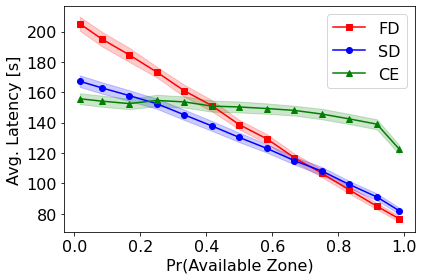

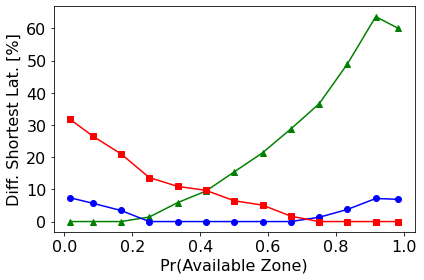

In [22]:
THINK_TIME = 10
NUM_ROBOT_LEGS = 80
POLICY_REFRESH = 300
COMM_COST = 1
ELEV_CAPACITY = 20

#############
## Latency ##
#############

dfCentralTmp = df[(df['comm_same_room']==COMM_COST) & (df['S_changePolicyToOpen']==POLICY_REFRESH) & (df['Z_robot']==THINK_TIME) & (df['N_robot_legs']==NUM_ROBOT_LEGS) & (df['elevator_capacity']==ELEV_CAPACITY)]
dfSingleTmp = dfSingle[(dfSingle['comm_same_room']==COMM_COST) & (dfSingle['Z_robot']==THINK_TIME) & (dfSingle['N_robot_legs']==NUM_ROBOT_LEGS) & (dfSingle['elevator_capacity']==ELEV_CAPACITY)]
dfIndTmp = dfInd[(dfInd['Z_robot']==THINK_TIME) & (dfInd['N_robot_legs']==NUM_ROBOT_LEGS) & (dfInd['elevator_capacity']==ELEV_CAPACITY)]

fig, ax1 = plt.subplots()

ax1.plot(dfIndTmp['p_openDoor'], dfIndTmp['R_robot_sys_mean'], color='red', marker='s', label='FD')
ax1.fill_between(dfIndTmp['p_openDoor'], dfIndTmp['R_robot_sys_low'], dfIndTmp['R_robot_sys_up'], color='red', alpha=.2)

ax1.plot(dfSingleTmp['p_openDoor'], dfSingleTmp['R_robot_sys_mean'], color='blue', marker='o', label='SD')
ax1.fill_between(dfSingleTmp['p_openDoor'], dfSingleTmp['R_robot_sys_low'], dfSingleTmp['R_robot_sys_up'], color='blue', alpha=.2)

ax1.plot(dfCentralTmp['p_openDoor'], dfCentralTmp['R_robot_sys_mean'], color='green', marker='^', label='CE')
ax1.fill_between(dfCentralTmp['p_openDoor'], dfCentralTmp['R_robot_sys_low'], dfCentralTmp['R_robot_sys_up'], color='green', alpha=.2)

plt.xlabel('Pr(Available Zone)', fontsize=16)
plt.ylabel('Avg. Latency [s]', fontsize=16)
#plt.title('N = '+str(NUM_ROBOT_MAX)+' | Z = '+str(THINK_TIME)+' | Comm. Cost = '+str(COMM_COST)+' | Policy Refresh = '+str(POLICY_REFRESH))
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/50-50_stairsElevator_N'+str(NUM_ROBOT_LEGS)+'_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_capacity'+str(ELEV_CAPACITY)+'_lat.pdf')
plt.show()

#############
### Error ###
#############

df1 = dfCentralTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()
df2 = dfSingleTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()
df3 = dfIndTmp[['p_openDoor','R_robot_sys_mean']].set_index('p_openDoor').reset_index()

dfTot = df1.join(df2.join(df3, rsuffix='_distr'), lsuffix='_central', rsuffix='_semi')
dfTot.drop(['p_openDoor_semi', 'p_openDoor_distr'], axis=1, inplace=True)
dfTot.rename({'p_openDoor_central':'p_openDoor'}, inplace=True)

dfTot['min_R_robot_sys_mean'] = dfTot[['R_robot_sys_mean_central', 'R_robot_sys_mean_semi', 'R_robot_sys_mean_distr']].min(axis=1)

dfTot['diffCentralMin'] = abs(dfTot['R_robot_sys_mean_central'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffSemiMin'] = abs(dfTot['R_robot_sys_mean_semi'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffDistrMin'] = abs(dfTot['R_robot_sys_mean_distr'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']

fig, ax1 = plt.subplots()

ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffCentralMin']*100, color='green', marker='^', label='CE')
ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffSemiMin']*100, color='blue', marker='o', label='SD')
ax1.plot(dfCentralTmp['p_openDoor'], dfTot['diffDistrMin']*100, color='red', marker='s', label='FD')

plt.xlabel('Pr(Available Zone)', fontsize=16)
plt.ylabel('Diff. Shortest Lat. [%]', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/50-50_stairsElevator_N'+str(NUM_ROBOT_LEGS)+'_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_capacity'+str(ELEV_CAPACITY)+'_diff.pdf')
plt.show()

# Figure 11

Time required to simulate:
- the centralized architecture = ~18 minutes
- the semi-distributed architecture = ~20 minutes
- the fully-distributed architecture = ~15 minutes

In [23]:
df = pd.read_csv('./figures11and13/results/three_doors/slidingDoor_centralizedDecision_threeDoors_varChangePolicy/slidingDoor_centralizedDecision_threeDoors_collectResults.csv')
df.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
df.drop(list(df.filter(regex = 'reqB')), axis=1, inplace=True)
df['p_openDoor'] = df['S_door_closing'] / (df['S_door_opening'] + df['S_door_closing'])
df.sort_values(by=['N_robot'], inplace=True)
df[df == np.inf] = 0.0

In [24]:
#############
### Robot ###
#############

###### Mean values ######
for i in range(1,3+1):
    #Compute the probability of each path
    df['X'+str(i)+'_robot_A_mean'] = df['X_robot_success'+str(i)+'_A_mean'] + df['X_robot_fail'+str(i)+'_A_mean'] + df['X_robot_goSlow'+str(i)+'_A_mean']
    df['pRobot_fastSucc'+str(i)+'_A_mean'] = df['X_robot_success'+str(i)+'_A_mean'] / df['X'+str(i)+'_robot_A_mean']
    df['pRobot_fastFail'+str(i)+'_A_mean'] = df['X_robot_fail'+str(i)+'_A_mean'] / df['X'+str(i)+'_robot_A_mean']
    df['pRobot_slow'+str(i)+'_A_mean'] = df['X_robot_goSlow'+str(i)+'_A_mean'] / df['X'+str(i)+'_robot_A_mean']
    if i > 1:
        df['pRobot_fastSucc'+str(i)+'_A_mean'] = df['pRobot_fastSucc'+str(i)+'_A_mean'] * df['pRobot_fastSucc'+str(i-1)+'_A_mean']
        df['pRobot_fastFail'+str(i)+'_A_mean'] = df['pRobot_fastFail'+str(i)+'_A_mean'] * df['pRobot_fastSucc'+str(i-1)+'_A_mean']
        df['pRobot_slow'+str(i)+'_A_mean'] = df['pRobot_slow'+str(i)+'_A_mean'] * df['pRobot_fastSucc'+str(i-1)+'_A_mean']
for i in reversed(range(1,3+1)):    
    df['X'+str(i)+'_robot_B_mean'] = df['X_robot_success'+str(i)+'_B_mean'] + df['X_robot_fail'+str(i)+'_B_mean'] + df['X_robot_goSlow'+str(i)+'_B_mean']
    df['pRobot_fastSucc'+str(i)+'_B_mean'] = df['X_robot_success'+str(i)+'_B_mean'] / df['X'+str(i)+'_robot_B_mean']
    df['pRobot_fastFail'+str(i)+'_B_mean'] = df['X_robot_fail'+str(i)+'_B_mean'] / df['X'+str(i)+'_robot_B_mean']
    df['pRobot_slow'+str(i)+'_B_mean'] = df['X_robot_goSlow'+str(i)+'_B_mean'] / df['X'+str(i)+'_robot_B_mean']
    if i < 3:
        df['pRobot_fastSucc'+str(i)+'_B_mean'] = df['pRobot_fastSucc'+str(i)+'_B_mean'] * df['pRobot_fastSucc'+str(i+1)+'_B_mean']
        df['pRobot_fastFail'+str(i)+'_B_mean'] = df['pRobot_fastFail'+str(i)+'_B_mean'] * df['pRobot_fastSucc'+str(i+1)+'_B_mean']
        df['pRobot_slow'+str(i)+'_B_mean'] = df['pRobot_slow'+str(i)+'_B_mean'] * df['pRobot_fastSucc'+str(i+1)+'_B_mean']

df[df.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    df['R'+str(i)+'_robot_A_mean'] = df['R_robot_choosing'+str(i)+'_A_mean'] + df['pRobot_fastSucc'+str(i)+'_A_mean'] * (df['R_robot_reachDoor'+str(i)+'_A_mean'] + df['R_robot_driveThru'+str(i)+'_A_mean'] + df['R_robot_driveFwd'+str(i)+'_A_mean']) + df['pRobot_fastFail'+str(i)+'_A_mean'] * (df['R_robot_reachDoor'+str(i)+'_A_mean'] + df['R_robot_driveThru'+str(i)+'_A_mean'] + df['R_robot_driveBack'+str(i)+'_A_mean'] + df['R_robot_driveAround'+str(i)+'_A_mean']) + df['pRobot_slow'+str(i)+'_A_mean'] * df['R_robot_driveAround'+str(i)+'_A_mean']
    df['R'+str(i)+'_robot_B_mean'] = df['R_robot_choosing'+str(i)+'_B_mean'] + df['pRobot_fastSucc'+str(i)+'_B_mean'] * (df['R_robot_reachDoor'+str(i)+'_B_mean'] + df['R_robot_driveThru'+str(i)+'_B_mean'] + df['R_robot_driveFwd'+str(i)+'_B_mean']) + df['pRobot_fastFail'+str(i)+'_B_mean'] * (df['R_robot_reachDoor'+str(i)+'_B_mean'] + df['R_robot_driveThru'+str(i)+'_B_mean'] + df['R_robot_driveBack'+str(i)+'_B_mean'] + df['R_robot_driveAround'+str(i)+'_B_mean']) + df['pRobot_slow'+str(i)+'_B_mean'] * df['R_robot_driveAround'+str(i)+'_B_mean']
    df['R'+str(i)+'_robot_sys_mean'] = df['R'+str(i)+'_robot_A_mean'] + df['R'+str(i)+'_robot_B_mean']

    
###### Lower bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    df['X'+str(i)+'_robot_A_low'] = df['X_robot_success'+str(i)+'_A_low'] + df['X_robot_fail'+str(i)+'_A_low'] + df['X_robot_goSlow'+str(i)+'_A_low']
    df['pRobot_fastSucc'+str(i)+'_A_low'] = df['X_robot_success'+str(i)+'_A_low'] / df['X'+str(i)+'_robot_A_low']
    df['pRobot_fastFail'+str(i)+'_A_low'] = df['X_robot_fail'+str(i)+'_A_low'] / df['X'+str(i)+'_robot_A_low']
    df['pRobot_slow'+str(i)+'_A_low'] = df['X_robot_goSlow'+str(i)+'_A_low'] / df['X'+str(i)+'_robot_A_low']
    if i > 1:
        df['pRobot_fastSucc'+str(i)+'_A_low'] = df['pRobot_fastSucc'+str(i)+'_A_low'] * df['pRobot_fastSucc'+str(i-1)+'_A_low']
        df['pRobot_fastFail'+str(i)+'_A_low'] = df['pRobot_fastFail'+str(i)+'_A_low'] * df['pRobot_fastSucc'+str(i-1)+'_A_low']
        df['pRobot_slow'+str(i)+'_A_low'] = df['pRobot_slow'+str(i)+'_A_low'] * df['pRobot_fastSucc'+str(i-1)+'_A_low']
for i in reversed(range(1,3+1)):    
    df['X'+str(i)+'_robot_B_low'] = df['X_robot_success'+str(i)+'_B_low'] + df['X_robot_fail'+str(i)+'_B_low'] +  + df['X_robot_goSlow'+str(i)+'_B_low']
    df['pRobot_fastSucc'+str(i)+'_B_low'] = df['X_robot_success'+str(i)+'_B_low'] / df['X'+str(i)+'_robot_B_low']
    df['pRobot_fastFail'+str(i)+'_B_low'] = df['X_robot_fail'+str(i)+'_B_low'] / df['X'+str(i)+'_robot_B_low']
    df['pRobot_slow'+str(i)+'_B_low'] = df['X_robot_goSlow'+str(i)+'_B_low'] / df['X'+str(i)+'_robot_B_low']
    if i < 3:
        df['pRobot_fastSucc'+str(i)+'_B_low'] = df['pRobot_fastSucc'+str(i)+'_B_low'] * df['pRobot_fastSucc'+str(i+1)+'_B_low']
        df['pRobot_fastFail'+str(i)+'_B_low'] = df['pRobot_fastFail'+str(i)+'_B_low'] * df['pRobot_fastSucc'+str(i+1)+'_B_low']
        df['pRobot_slow'+str(i)+'_B_low'] = df['pRobot_slow'+str(i)+'_B_low'] * df['pRobot_fastSucc'+str(i+1)+'_B_low']

df[df.isna()] = 0.0        

for i in range(1,3+1):    
    #Use probabilities for computing the system response time
    df['R'+str(i)+'_robot_A_low'] = df['R_robot_choosing'+str(i)+'_A_low'] + df['pRobot_fastSucc'+str(i)+'_A_low'] * (df['R_robot_reachDoor'+str(i)+'_A_low'] + df['R_robot_driveThru'+str(i)+'_A_low'] + df['R_robot_driveFwd'+str(i)+'_A_low']) + df['pRobot_fastFail'+str(i)+'_A_low'] * (df['R_robot_reachDoor'+str(i)+'_A_low'] + df['R_robot_driveThru'+str(i)+'_A_low'] + df['R_robot_driveBack'+str(i)+'_A_low'] + df['R_robot_driveAround'+str(i)+'_A_low']) + df['pRobot_slow'+str(i)+'_A_low'] * df['R_robot_driveAround'+str(i)+'_A_low']
    df['R'+str(i)+'_robot_B_low'] = df['R_robot_choosing'+str(i)+'_B_low'] + df['pRobot_fastSucc'+str(i)+'_B_low'] * (df['R_robot_reachDoor'+str(i)+'_B_low'] + df['R_robot_driveThru'+str(i)+'_B_low'] + df['R_robot_driveFwd'+str(i)+'_B_low']) + df['pRobot_fastFail'+str(i)+'_B_low'] * (df['R_robot_reachDoor'+str(i)+'_B_low'] + df['R_robot_driveThru'+str(i)+'_B_low'] + df['R_robot_driveBack'+str(i)+'_B_low'] + df['R_robot_driveAround'+str(i)+'_B_low']) + df['pRobot_slow'+str(i)+'_B_low'] * df['R_robot_driveAround'+str(i)+'_B_low']
    df['R'+str(i)+'_robot_sys_low'] = df['R'+str(i)+'_robot_A_low'] + df['R'+str(i)+'_robot_B_low']
    
    
###### Upper bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    df['X'+str(i)+'_robot_A_up'] = df['X_robot_success'+str(i)+'_A_up'] + df['X_robot_fail'+str(i)+'_A_up'] + df['X_robot_goSlow'+str(i)+'_A_up']
    df['pRobot_fastSucc'+str(i)+'_A_up'] = df['X_robot_success'+str(i)+'_A_up'] / df['X'+str(i)+'_robot_A_up']
    df['pRobot_fastFail'+str(i)+'_A_up'] = df['X_robot_fail'+str(i)+'_A_up'] / df['X'+str(i)+'_robot_A_up']
    df['pRobot_slow'+str(i)+'_A_up'] = df['X_robot_goSlow'+str(i)+'_A_up'] / df['X'+str(i)+'_robot_A_up']
    if i > 1:
        df['pRobot_fastSucc'+str(i)+'_A_up'] = df['pRobot_fastSucc'+str(i)+'_A_up'] * df['pRobot_fastSucc'+str(i-1)+'_A_up']
        df['pRobot_fastFail'+str(i)+'_A_up'] = df['pRobot_fastFail'+str(i)+'_A_up'] * df['pRobot_fastSucc'+str(i-1)+'_A_up']
        df['pRobot_slow'+str(i)+'_A_up'] = df['pRobot_slow'+str(i)+'_A_up'] * df['pRobot_fastSucc'+str(i-1)+'_A_up']
for i in reversed(range(1,3+1)):    
    df['X'+str(i)+'_robot_B_up'] = df['X_robot_success'+str(i)+'_B_up'] + df['X_robot_fail'+str(i)+'_B_up'] + df['X_robot_goSlow'+str(i)+'_B_up']
    df['pRobot_fastSucc'+str(i)+'_B_up'] = df['X_robot_success'+str(i)+'_B_up'] / df['X'+str(i)+'_robot_B_up']
    df['pRobot_fastFail'+str(i)+'_B_up'] = df['X_robot_fail'+str(i)+'_B_up'] / df['X'+str(i)+'_robot_B_up']
    df['pRobot_slow'+str(i)+'_B_up'] = df['X_robot_goSlow'+str(i)+'_B_up'] / df['X'+str(i)+'_robot_B_up']
    if i < 3:
        df['pRobot_fastSucc'+str(i)+'_B_up'] = df['pRobot_fastSucc'+str(i)+'_B_up'] * df['pRobot_fastSucc'+str(i+1)+'_B_up']
        df['pRobot_fastFail'+str(i)+'_B_up'] = df['pRobot_fastFail'+str(i)+'_B_up'] * df['pRobot_fastSucc'+str(i+1)+'_B_up']
        df['pRobot_slow'+str(i)+'_B_up'] = df['pRobot_slow'+str(i)+'_B_up'] * df['pRobot_fastSucc'+str(i+1)+'_B_up']

df[df.isna()] = 0.0        

for i in range(1,3+1):    
    #Use probabilities for computing the system response time
    df['R'+str(i)+'_robot_A_up'] = df['R_robot_choosing'+str(i)+'_A_up'] + df['pRobot_fastSucc'+str(i)+'_A_up'] * (df['R_robot_reachDoor'+str(i)+'_A_up'] + df['R_robot_driveThru'+str(i)+'_A_up'] + df['R_robot_driveFwd'+str(i)+'_A_up']) + df['pRobot_fastFail'+str(i)+'_A_up'] * (df['R_robot_reachDoor'+str(i)+'_A_up'] + df['R_robot_driveThru'+str(i)+'_A_up'] + df['R_robot_driveBack'+str(i)+'_A_up'] + df['R_robot_driveAround'+str(i)+'_A_up']) + df['pRobot_slow'+str(i)+'_A_up'] * df['R_robot_driveAround'+str(i)+'_A_up']
    df['R'+str(i)+'_robot_B_up'] = df['R_robot_choosing'+str(i)+'_B_up'] + df['pRobot_fastSucc'+str(i)+'_B_up'] * (df['R_robot_reachDoor'+str(i)+'_B_up'] + df['R_robot_driveThru'+str(i)+'_B_up'] + df['R_robot_driveFwd'+str(i)+'_B_up']) + df['pRobot_fastFail'+str(i)+'_B_up'] * (df['R_robot_reachDoor'+str(i)+'_B_up'] + df['R_robot_driveThru'+str(i)+'_B_up'] + df['R_robot_driveBack'+str(i)+'_B_up'] + df['R_robot_driveAround'+str(i)+'_B_up']) + df['pRobot_slow'+str(i)+'_B_up'] * df['R_robot_driveAround'+str(i)+'_B_up']
    df['R'+str(i)+'_robot_sys_up'] = df['R'+str(i)+'_robot_A_up'] + df['R'+str(i)+'_robot_B_up']
    

df['R_robot_sys_mean'] = df['R1_robot_sys_mean'] + df['R2_robot_sys_mean'] + df['R3_robot_sys_mean']
df['R_robot_sys_low'] = df['R1_robot_sys_low'] + df['R2_robot_sys_low'] + df['R3_robot_sys_low']
df['R_robot_sys_up'] = df['R1_robot_sys_up'] + df['R2_robot_sys_up'] + df['R3_robot_sys_up']

In [25]:
dfSingle = pd.read_csv('./figures11and13/results/three_doors/slidingDoor_semiDistrDecision_threeDoors_varArrivals/slidingDoor_semiDistrDecision_threeDoors_collectResults.csv')
dfSingle.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfSingle.drop(list(dfSingle.filter(regex = 'reqB')), axis=1, inplace=True)
dfSingle['p_openDoor'] = dfSingle['S_door_closing'] / (dfSingle['S_door_opening'] + dfSingle['S_door_closing'])
dfSingle.sort_values(by=['N_robot'], inplace=True)
dfSingle[dfSingle == np.inf] = 0.0
dfSingle.fillna(0, inplace=True)

In [26]:
#############
### Robot ###
#############

###### Mean values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfSingle['X'+str(i)+'_robot_A_mean'] = dfSingle['X_robot_success'+str(i)+'_A_mean'] + dfSingle['X_robot_fail'+str(i)+'_A_mean'] + dfSingle['X_robot_follow'+str(i)+'_A_mean']
    dfSingle['pRobot_fast'+str(i)+'_A_mean'] = dfSingle['X_robot_success'+str(i)+'_A_mean'] / dfSingle['X'+str(i)+'_robot_A_mean']
    dfSingle['pRobot_leader'+str(i)+'_A_mean'] = dfSingle['X_robot_fail'+str(i)+'_A_mean'] / dfSingle['X'+str(i)+'_robot_A_mean']
    dfSingle['pRobot_slow'+str(i)+'_A_mean'] = dfSingle['X_robot_follow'+str(i)+'_A_mean'] / dfSingle['X'+str(i)+'_robot_A_mean']
    if i > 1:
        dfSingle['pRobot_fast'+str(i)+'_A_mean'] = dfSingle['pRobot_fast'+str(i)+'_A_mean'] * dfSingle['pRobot_fast'+str(i-1)+'_A_mean']
        dfSingle['pRobot_leader'+str(i)+'_A_mean'] = dfSingle['pRobot_leader'+str(i)+'_A_mean'] * dfSingle['pRobot_fast'+str(i-1)+'_A_mean']
        dfSingle['pRobot_slow'+str(i)+'_A_mean'] = dfSingle['pRobot_slow'+str(i)+'_A_mean'] * dfSingle['pRobot_fast'+str(i-1)+'_A_mean']
for i in reversed(range(1,3+1)):
    dfSingle['X'+str(i)+'_robot_B_mean'] = dfSingle['X_robot_success'+str(i)+'_B_mean'] + dfSingle['X_robot_fail'+str(i)+'_B_mean'] + dfSingle['X_robot_follow'+str(i)+'_B_mean']
    dfSingle['pRobot_fast'+str(i)+'_B_mean'] = dfSingle['X_robot_success'+str(i)+'_B_mean'] / dfSingle['X'+str(i)+'_robot_B_mean']
    dfSingle['pRobot_leader'+str(i)+'_B_mean'] = dfSingle['X_robot_fail'+str(i)+'_B_mean'] / dfSingle['X'+str(i)+'_robot_B_mean']
    dfSingle['pRobot_slow'+str(i)+'_B_mean'] = dfSingle['X_robot_follow'+str(i)+'_B_mean'] / dfSingle['X'+str(i)+'_robot_B_mean']
    if i < 3:
        dfSingle['pRobot_fast'+str(i)+'_B_mean'] = dfSingle['pRobot_fast'+str(i)+'_B_mean'] * dfSingle['pRobot_fast'+str(i+1)+'_B_mean']
        dfSingle['pRobot_leader'+str(i)+'_B_mean'] = dfSingle['pRobot_leader'+str(i)+'_B_mean'] * dfSingle['pRobot_fast'+str(i+1)+'_B_mean']
        dfSingle['pRobot_slow'+str(i)+'_B_mean'] = dfSingle['pRobot_slow'+str(i)+'_B_mean'] * dfSingle['pRobot_fast'+str(i+1)+'_B_mean']

dfSingle[dfSingle.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfSingle['R'+str(i)+'_robot_A_mean'] = dfSingle['R_robot_choosing'+str(i)+'_A_mean'] + dfSingle['pRobot_fast'+str(i)+'_A_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_mean'] + dfSingle['R_robot_driveThru'+str(i)+'_A_mean'] + dfSingle['R_robot_driveFwd'+str(i)+'_A_mean']) + dfSingle['pRobot_slow'+str(i)+'_A_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_A_mean']) + dfSingle['pRobot_leader'+str(i)+'_A_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_mean'] + dfSingle['R_robot_communicate'+str(i)+'_A_mean'] + dfSingle['R_robot_driveBack'+str(i)+'_A_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_A_mean'])
    dfSingle['R'+str(i)+'_robot_B_mean'] = dfSingle['R_robot_choosing'+str(i)+'_B_mean'] + dfSingle['pRobot_fast'+str(i)+'_B_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_mean'] + dfSingle['R_robot_driveThru'+str(i)+'_B_mean'] + dfSingle['R_robot_driveFwd'+str(i)+'_B_mean']) + dfSingle['pRobot_slow'+str(i)+'_B_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_B_mean']) + dfSingle['pRobot_leader'+str(i)+'_B_mean'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_mean'] + dfSingle['R_robot_communicate'+str(i)+'_B_mean'] + dfSingle['R_robot_driveBack'+str(i)+'_B_mean'] + dfSingle['R_robot_driveAround'+str(i)+'_B_mean'])
    dfSingle['R'+str(i)+'_robot_sys_mean'] = dfSingle['R'+str(i)+'_robot_A_mean'] + dfSingle['R'+str(i)+'_robot_B_mean']


###### Lower bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfSingle['X'+str(i)+'_robot_A_low'] = dfSingle['X_robot_success'+str(i)+'_A_low'] + dfSingle['X_robot_fail'+str(i)+'_A_low'] + dfSingle['X_robot_follow'+str(i)+'_A_low']
    dfSingle['pRobot_fast'+str(i)+'_A_low'] = dfSingle['X_robot_success'+str(i)+'_A_low'] / dfSingle['X'+str(i)+'_robot_A_low']
    dfSingle['pRobot_leader'+str(i)+'_A_low'] = dfSingle['X_robot_fail'+str(i)+'_A_low'] / dfSingle['X'+str(i)+'_robot_A_low']
    dfSingle['pRobot_slow'+str(i)+'_A_low'] = dfSingle['X_robot_follow'+str(i)+'_A_low'] / dfSingle['X'+str(i)+'_robot_A_low']
    if i > 1:
        dfSingle['pRobot_fast'+str(i)+'_A_low'] = dfSingle['pRobot_fast'+str(i)+'_A_low'] * dfSingle['pRobot_fast'+str(i-1)+'_A_low']
        dfSingle['pRobot_leader'+str(i)+'_A_low'] = dfSingle['pRobot_leader'+str(i)+'_A_low'] * dfSingle['pRobot_fast'+str(i-1)+'_A_low']
        dfSingle['pRobot_slow'+str(i)+'_A_low'] = dfSingle['pRobot_slow'+str(i)+'_A_low'] * dfSingle['pRobot_fast'+str(i-1)+'_A_low']
for i in reversed(range(1,3+1)):
    dfSingle['X'+str(i)+'_robot_B_low'] = dfSingle['X_robot_success'+str(i)+'_B_low'] + dfSingle['X_robot_fail'+str(i)+'_B_low'] + dfSingle['X_robot_follow'+str(i)+'_B_low']
    dfSingle['pRobot_fast'+str(i)+'_B_low'] = dfSingle['X_robot_success'+str(i)+'_B_low'] / dfSingle['X'+str(i)+'_robot_B_low']
    dfSingle['pRobot_leader'+str(i)+'_B_low'] = dfSingle['X_robot_fail'+str(i)+'_B_low'] / dfSingle['X'+str(i)+'_robot_B_low']
    dfSingle['pRobot_slow'+str(i)+'_B_low'] = dfSingle['X_robot_follow'+str(i)+'_B_low'] / dfSingle['X'+str(i)+'_robot_B_low']
    if i < 3:
        dfSingle['pRobot_fast'+str(i)+'_B_low'] = dfSingle['pRobot_fast'+str(i)+'_B_low'] * dfSingle['pRobot_fast'+str(i+1)+'_B_low']
        dfSingle['pRobot_leader'+str(i)+'_B_low'] = dfSingle['pRobot_leader'+str(i)+'_B_low'] * dfSingle['pRobot_fast'+str(i+1)+'_B_low']
        dfSingle['pRobot_slow'+str(i)+'_B_low'] = dfSingle['pRobot_slow'+str(i)+'_B_low'] * dfSingle['pRobot_fast'+str(i+1)+'_B_low']

dfSingle[dfSingle.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfSingle['R'+str(i)+'_robot_A_low'] = dfSingle['R_robot_choosing'+str(i)+'_A_low'] + dfSingle['pRobot_fast'+str(i)+'_A_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_low'] + dfSingle['R_robot_driveThru'+str(i)+'_A_low'] + dfSingle['R_robot_driveFwd'+str(i)+'_A_low']) + dfSingle['pRobot_slow'+str(i)+'_A_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_low'] + dfSingle['R_robot_driveAround'+str(i)+'_A_low']) + dfSingle['pRobot_leader'+str(i)+'_A_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_low'] + dfSingle['R_robot_communicate'+str(i)+'_A_low'] + dfSingle['R_robot_driveBack'+str(i)+'_A_low'] + dfSingle['R_robot_driveAround'+str(i)+'_A_low'])
    dfSingle['R'+str(i)+'_robot_B_low'] = dfSingle['R_robot_choosing'+str(i)+'_B_low'] + dfSingle['pRobot_fast'+str(i)+'_B_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_low'] + dfSingle['R_robot_driveThru'+str(i)+'_B_low'] + dfSingle['R_robot_driveFwd'+str(i)+'_B_low']) + dfSingle['pRobot_slow'+str(i)+'_B_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_low'] + dfSingle['R_robot_driveAround'+str(i)+'_B_low']) + dfSingle['pRobot_leader'+str(i)+'_B_low'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_low'] + dfSingle['R_robot_communicate'+str(i)+'_B_low'] + dfSingle['R_robot_driveBack'+str(i)+'_B_low'] + dfSingle['R_robot_driveAround'+str(i)+'_B_low'])
    dfSingle['R'+str(i)+'_robot_sys_low'] = dfSingle['R'+str(i)+'_robot_A_low'] + dfSingle['R'+str(i)+'_robot_B_low']


###### Upper bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfSingle['X'+str(i)+'_robot_A_up'] = dfSingle['X_robot_success'+str(i)+'_A_up'] + dfSingle['X_robot_fail'+str(i)+'_A_up'] + dfSingle['X_robot_follow'+str(i)+'_A_up']
    dfSingle['pRobot_fast'+str(i)+'_A_up'] = dfSingle['X_robot_success'+str(i)+'_A_up'] / dfSingle['X'+str(i)+'_robot_A_up']
    dfSingle['pRobot_leader'+str(i)+'_A_up'] = dfSingle['X_robot_fail'+str(i)+'_A_up'] / dfSingle['X'+str(i)+'_robot_A_up']
    dfSingle['pRobot_slow'+str(i)+'_A_up'] = dfSingle['X_robot_follow'+str(i)+'_A_up'] / dfSingle['X'+str(i)+'_robot_A_up']
    if i > 1:
        dfSingle['pRobot_fast'+str(i)+'_A_up'] = dfSingle['pRobot_fast'+str(i)+'_A_up'] * dfSingle['pRobot_fast'+str(i-1)+'_A_up']
        dfSingle['pRobot_leader'+str(i)+'_A_up'] = dfSingle['pRobot_leader'+str(i)+'_A_up'] * dfSingle['pRobot_fast'+str(i-1)+'_A_up']
        dfSingle['pRobot_slow'+str(i)+'_A_up'] = dfSingle['pRobot_slow'+str(i)+'_A_up'] * dfSingle['pRobot_fast'+str(i-1)+'_A_up']
for i in reversed(range(1,3+1)):
    dfSingle['X'+str(i)+'_robot_B_up'] = dfSingle['X_robot_success'+str(i)+'_B_up'] + dfSingle['X_robot_fail'+str(i)+'_B_up'] + dfSingle['X_robot_follow'+str(i)+'_B_up']
    dfSingle['pRobot_fast'+str(i)+'_B_up'] = dfSingle['X_robot_success'+str(i)+'_B_up'] / dfSingle['X'+str(i)+'_robot_B_up']
    dfSingle['pRobot_leader'+str(i)+'_B_up'] = dfSingle['X_robot_fail'+str(i)+'_B_up'] / dfSingle['X'+str(i)+'_robot_B_up']
    dfSingle['pRobot_slow'+str(i)+'_B_up'] = dfSingle['X_robot_follow'+str(i)+'_B_up'] / dfSingle['X'+str(i)+'_robot_B_up']
    if i < 3:
        dfSingle['pRobot_fast'+str(i)+'_B_up'] = dfSingle['pRobot_fast'+str(i)+'_B_up'] * dfSingle['pRobot_fast'+str(i+1)+'_B_up']
        dfSingle['pRobot_leader'+str(i)+'_B_up'] = dfSingle['pRobot_leader'+str(i)+'_B_up'] * dfSingle['pRobot_fast'+str(i+1)+'_B_up']
        dfSingle['pRobot_slow'+str(i)+'_B_up'] = dfSingle['pRobot_slow'+str(i)+'_B_up'] * dfSingle['pRobot_fast'+str(i+1)+'_B_up']

dfSingle[dfSingle.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfSingle['R'+str(i)+'_robot_A_up'] = dfSingle['R_robot_choosing'+str(i)+'_A_up'] + dfSingle['pRobot_fast'+str(i)+'_A_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_up'] + dfSingle['R_robot_driveThru'+str(i)+'_A_up'] + dfSingle['R_robot_driveFwd'+str(i)+'_A_up']) + dfSingle['pRobot_slow'+str(i)+'_A_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_up'] + dfSingle['R_robot_driveAround'+str(i)+'_A_up']) + dfSingle['pRobot_leader'+str(i)+'_A_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_A_up'] + dfSingle['R_robot_communicate'+str(i)+'_A_up'] + dfSingle['R_robot_driveBack'+str(i)+'_A_up'] + dfSingle['R_robot_driveAround'+str(i)+'_A_up'])
    dfSingle['R'+str(i)+'_robot_B_up'] = dfSingle['R_robot_choosing'+str(i)+'_B_up'] + dfSingle['pRobot_fast'+str(i)+'_B_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_up'] + dfSingle['R_robot_driveThru'+str(i)+'_B_up'] + dfSingle['R_robot_driveFwd'+str(i)+'_B_up']) + dfSingle['pRobot_slow'+str(i)+'_B_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_up'] + dfSingle['R_robot_driveAround'+str(i)+'_B_up']) + dfSingle['pRobot_leader'+str(i)+'_B_up'] * (dfSingle['R_robot_reachDoor'+str(i)+'_B_up'] + dfSingle['R_robot_communicate'+str(i)+'_B_up'] + dfSingle['R_robot_driveBack'+str(i)+'_B_up'] + dfSingle['R_robot_driveAround'+str(i)+'_B_up'])
    dfSingle['R'+str(i)+'_robot_sys_up'] = dfSingle['R'+str(i)+'_robot_A_up'] + dfSingle['R'+str(i)+'_robot_B_up']
    
dfSingle['R_robot_sys_mean'] = dfSingle['R1_robot_sys_mean'] + dfSingle['R2_robot_sys_mean'] + dfSingle['R3_robot_sys_mean']
dfSingle['R_robot_sys_low'] = dfSingle['R1_robot_sys_low'] + dfSingle['R2_robot_sys_low'] + dfSingle['R3_robot_sys_low']
dfSingle['R_robot_sys_up'] = dfSingle['R1_robot_sys_up'] + dfSingle['R2_robot_sys_up'] + dfSingle['R3_robot_sys_up']

In [27]:
dfInd = pd.read_csv('./figures11and13/results/three_doors/slidingDoor_independentDecision_threeDoors_varArrivals/slidingDoor_independentDecision_threeDoors_collectResults.csv')
dfInd.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfInd.drop(list(dfInd.filter(regex = 'reqB')), axis=1, inplace=True)
dfInd['p_openDoor'] = dfInd['S_door_closing'] / (dfInd['S_door_opening'] + dfInd['S_door_closing'])
dfInd.sort_values(by=['N_robot'], inplace=True)
dfInd[dfInd == np.inf] = 0.0
dfInd.fillna(0, inplace=True)

In [28]:
#############
### Robot ###
#############

###### Mean values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfInd['X'+str(i)+'_robot_A_mean'] = dfInd['X_robot_goFast'+str(i)+'_A_mean']
    dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] = dfInd['X_robot_success'+str(i)+'_A_mean'] / dfInd['X'+str(i)+'_robot_A_mean']
    dfInd['pRobot_fastFail'+str(i)+'_A_mean'] = dfInd['X_robot_fail'+str(i)+'_A_mean'] / dfInd['X'+str(i)+'_robot_A_mean']
    if i > 1:
        dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] = dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_mean']
        dfInd['pRobot_fastFail'+str(i)+'_A_mean'] = dfInd['pRobot_fastFail'+str(i)+'_A_mean'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_mean']
for i in reversed(range(1,3+1)):
    dfInd['X'+str(i)+'_robot_B_mean'] = dfInd['X_robot_goFast'+str(i)+'_B_mean']
    dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] = dfInd['X_robot_success'+str(i)+'_B_mean'] / dfInd['X'+str(i)+'_robot_B_mean']
    dfInd['pRobot_fastFail'+str(i)+'_B_mean'] = dfInd['X_robot_fail'+str(i)+'_B_mean'] / dfInd['X'+str(i)+'_robot_B_mean']
    if i < 3:
        dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] = dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_mean']
        dfInd['pRobot_fastFail'+str(i)+'_B_mean'] = dfInd['pRobot_fastFail'+str(i)+'_B_mean'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_mean']

dfInd[dfInd.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfInd['R'+str(i)+'_robot_A_mean'] = dfInd['R_robot_choosing'+str(i)+'_A_mean'] + dfInd['pRobot_fastSucc'+str(i)+'_A_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_mean'] + dfInd['R_robot_driveThru'+str(i)+'_A_mean'] + dfInd['R_robot_driveFwd'+str(i)+'_A_mean']) + dfInd['pRobot_fastFail'+str(i)+'_A_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_mean'] + dfInd['R_robot_driveBack'+str(i)+'_A_mean'] + dfInd['R_robot_driveAround'+str(i)+'_A_mean'])
    dfInd['R'+str(i)+'_robot_B_mean'] = dfInd['R_robot_choosing'+str(i)+'_B_mean'] + dfInd['pRobot_fastSucc'+str(i)+'_B_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_mean'] + dfInd['R_robot_driveThru'+str(i)+'_B_mean'] + dfInd['R_robot_driveFwd'+str(i)+'_B_mean']) + dfInd['pRobot_fastFail'+str(i)+'_B_mean'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_mean'] + dfInd['R_robot_driveBack'+str(i)+'_B_mean'] + dfInd['R_robot_driveAround'+str(i)+'_B_mean'])
    dfInd['R'+str(i)+'_robot_sys_mean'] = dfInd['R'+str(i)+'_robot_A_mean'] + dfInd['R'+str(i)+'_robot_B_mean']



###### Lower values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfInd['X'+str(i)+'_robot_A_low'] = dfInd['X_robot_goFast'+str(i)+'_A_low']
    dfInd['pRobot_fastSucc'+str(i)+'_A_low'] = dfInd['X_robot_success'+str(i)+'_A_low'] / dfInd['X'+str(i)+'_robot_A_low']
    dfInd['pRobot_fastFail'+str(i)+'_A_low'] = dfInd['X_robot_fail'+str(i)+'_A_low'] / dfInd['X'+str(i)+'_robot_A_low']
    if i > 1:
        dfInd['pRobot_fastSucc'+str(i)+'_A_low'] = dfInd['pRobot_fastSucc'+str(i)+'_A_low'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_low']
        dfInd['pRobot_fastFail'+str(i)+'_A_low'] = dfInd['pRobot_fastFail'+str(i)+'_A_low'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_low']
for i in reversed(range(1,3+1)):
    dfInd['X'+str(i)+'_robot_B_low'] = dfInd['X_robot_goFast'+str(i)+'_B_low']
    dfInd['pRobot_fastSucc'+str(i)+'_B_low'] = dfInd['X_robot_success'+str(i)+'_B_low'] / dfInd['X'+str(i)+'_robot_B_low']
    dfInd['pRobot_fastFail'+str(i)+'_B_low'] = dfInd['X_robot_fail'+str(i)+'_B_low'] / dfInd['X'+str(i)+'_robot_B_low']
    if i < 3:
        dfInd['pRobot_fastSucc'+str(i)+'_B_low'] = dfInd['pRobot_fastSucc'+str(i)+'_B_low'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_low']
        dfInd['pRobot_fastFail'+str(i)+'_B_low'] = dfInd['pRobot_fastFail'+str(i)+'_B_low'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_low']

dfInd[dfInd.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfInd['R'+str(i)+'_robot_A_low'] = dfInd['R_robot_choosing'+str(i)+'_A_low'] + dfInd['pRobot_fastSucc'+str(i)+'_A_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_low'] + dfInd['R_robot_driveThru'+str(i)+'_A_low'] + dfInd['R_robot_driveFwd'+str(i)+'_A_low']) + dfInd['pRobot_fastFail'+str(i)+'_A_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_low'] + dfInd['R_robot_driveBack'+str(i)+'_A_low'] + dfInd['R_robot_driveAround'+str(i)+'_A_low'])
    dfInd['R'+str(i)+'_robot_B_low'] = dfInd['R_robot_choosing'+str(i)+'_B_low'] + dfInd['pRobot_fastSucc'+str(i)+'_B_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_low'] + dfInd['R_robot_driveThru'+str(i)+'_B_low'] + dfInd['R_robot_driveFwd'+str(i)+'_B_low']) + dfInd['pRobot_fastFail'+str(i)+'_B_low'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_low'] + dfInd['R_robot_driveBack'+str(i)+'_B_low'] + dfInd['R_robot_driveAround'+str(i)+'_B_low'])
    dfInd['R'+str(i)+'_robot_sys_low'] = dfInd['R'+str(i)+'_robot_A_low'] + dfInd['R'+str(i)+'_robot_B_low']


###### Upper bound values ######
for i in range(1,3+1):
    #Compute the probability of each path
    dfInd['X'+str(i)+'_robot_A_up'] = dfInd['X_robot_goFast'+str(i)+'_A_up']
    dfInd['pRobot_fastSucc'+str(i)+'_A_up'] = dfInd['X_robot_success'+str(i)+'_A_up'] / dfInd['X'+str(i)+'_robot_A_up']
    dfInd['pRobot_fastFail'+str(i)+'_A_up'] = dfInd['X_robot_fail'+str(i)+'_A_up'] / dfInd['X'+str(i)+'_robot_A_up']
    if i > 1:
        dfInd['pRobot_fastSucc'+str(i)+'_A_up'] = dfInd['pRobot_fastSucc'+str(i)+'_A_up'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_up']
        dfInd['pRobot_fastFail'+str(i)+'_A_up'] = dfInd['pRobot_fastFail'+str(i)+'_A_up'] * dfInd['pRobot_fastSucc'+str(i-1)+'_A_up']
for i in reversed(range(1,3+1)):
    dfInd['X'+str(i)+'_robot_B_up'] = dfInd['X_robot_goFast'+str(i)+'_B_up']
    dfInd['pRobot_fastSucc'+str(i)+'_B_up'] = dfInd['X_robot_success'+str(i)+'_B_up'] / dfInd['X'+str(i)+'_robot_B_up']
    dfInd['pRobot_fastFail'+str(i)+'_B_up'] = dfInd['X_robot_fail'+str(i)+'_B_up'] / dfInd['X'+str(i)+'_robot_B_up']
    if i < 3:
        dfInd['pRobot_fastSucc'+str(i)+'_B_up'] = dfInd['pRobot_fastSucc'+str(i)+'_B_up'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_up']
        dfInd['pRobot_fastFail'+str(i)+'_B_up'] = dfInd['pRobot_fastFail'+str(i)+'_B_up'] * dfInd['pRobot_fastSucc'+str(i+1)+'_B_up']

dfInd[dfInd.isna()] = 0.0        

for i in range(1,3+1):
    #Use probabilities for computing the system response time
    dfInd['R'+str(i)+'_robot_A_up'] = dfInd['R_robot_choosing'+str(i)+'_A_up'] + dfInd['pRobot_fastSucc'+str(i)+'_A_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_up'] + dfInd['R_robot_driveThru'+str(i)+'_A_up'] + dfInd['R_robot_driveFwd'+str(i)+'_A_up']) + dfInd['pRobot_fastFail'+str(i)+'_A_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_A_up'] + dfInd['R_robot_driveBack'+str(i)+'_A_up'] + dfInd['R_robot_driveAround'+str(i)+'_A_up'])
    dfInd['R'+str(i)+'_robot_B_up'] = dfInd['R_robot_choosing'+str(i)+'_B_up'] + dfInd['pRobot_fastSucc'+str(i)+'_B_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_up'] + dfInd['R_robot_driveThru'+str(i)+'_B_up'] + dfInd['R_robot_driveFwd'+str(i)+'_B_up']) + dfInd['pRobot_fastFail'+str(i)+'_B_up'] * (dfInd['R_robot_reachDoor'+str(i)+'_B_up'] + dfInd['R_robot_driveBack'+str(i)+'_B_up'] + dfInd['R_robot_driveAround'+str(i)+'_B_up'])
    dfInd['R'+str(i)+'_robot_sys_up'] = dfInd['R'+str(i)+'_robot_A_up'] + dfInd['R'+str(i)+'_robot_B_up']
    
dfInd['R_robot_sys_mean'] = dfInd['R1_robot_sys_mean'] + dfInd['R2_robot_sys_mean'] + dfInd['R3_robot_sys_mean']
dfInd['R_robot_sys_low'] = dfInd['R1_robot_sys_low'] + dfInd['R2_robot_sys_low'] + dfInd['R3_robot_sys_low']
dfInd['R_robot_sys_up'] = dfInd['R1_robot_sys_up'] + dfInd['R2_robot_sys_up'] + dfInd['R3_robot_sys_up']

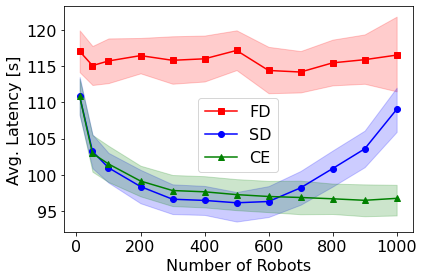

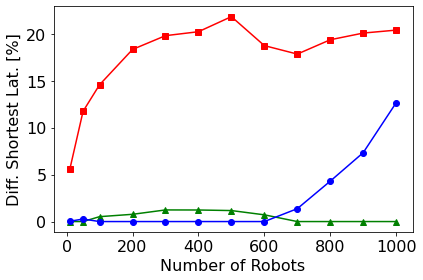

In [29]:
THINK_TIME = 10
POLICY_REFRESH = 10
COMM_COST = 1
Ns = [10,50,100,200,300,400,500,600,700,800,900,1000]

#############
## Latency ##
#############

dfCentralTmp = df[(df['N_robot'].isin(Ns)) & (df['comm_same_room']==COMM_COST) & (df['S_changePolicyToOpen']==POLICY_REFRESH) & (df['Z_robot']==THINK_TIME)]
dfSingleTmp = dfSingle[(dfSingle['N_robot'].isin(Ns)) & (dfSingle['comm_same_room']==COMM_COST) & (dfSingle['Z_robot']==THINK_TIME)]
dfIndTmp = dfInd[(dfInd['N_robot'].isin(Ns)) & (dfInd['Z_robot']==THINK_TIME)]

fig, ax1 = plt.subplots()

ax1.plot(dfIndTmp['N_robot'], dfIndTmp['R_robot_sys_mean'], color='red', marker='s', label='FD')
ax1.fill_between(dfIndTmp['N_robot'], dfIndTmp['R_robot_sys_low'], dfIndTmp['R_robot_sys_up'], color='red', alpha=.2)

ax1.plot(dfSingleTmp['N_robot'], dfSingleTmp['R_robot_sys_mean'], color='blue', marker='o', label='SD')
ax1.fill_between(dfSingleTmp['N_robot'], dfSingleTmp['R_robot_sys_low'], dfSingleTmp['R_robot_sys_up'], color='blue', alpha=.2)

ax1.plot(dfCentralTmp['N_robot'], dfCentralTmp['R_robot_sys_mean'], color='green', marker='^', label='CE')
ax1.fill_between(dfCentralTmp['N_robot'], dfCentralTmp['R_robot_sys_low'], dfCentralTmp['R_robot_sys_up'], color='green', alpha=.2)

plt.xlabel('Number of Robots', fontsize=16)
plt.ylabel('Avg. Latency [s]', fontsize=16)
#plt.title('N = '+str(NUM_ROBOT_MAX)+' | Z = '+str(THINK_TIME)+' | Comm. Cost = '+str(COMM_COST)+' | Policy Refresh = '+str(POLICY_REFRESH))
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16, loc='center', bbox_to_anchor=(0.5,0.43))

plt.tight_layout()
#plt.savefig('images/varNumRobots/50-50_emergencyExit_varN_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_lat.pdf')
plt.show()

#############
### Error ###
#############

df1 = dfCentralTmp[['N_robot','R_robot_sys_mean']].set_index('N_robot').reset_index()
df2 = dfSingleTmp[['N_robot','R_robot_sys_mean']].set_index('N_robot').reset_index()
df3 = dfIndTmp[['N_robot','R_robot_sys_mean']].set_index('N_robot').reset_index()

dfTot = df1.join(df2.join(df3, rsuffix='_distr'), lsuffix='_central', rsuffix='_semi')
dfTot.drop(['N_robot_semi', 'N_robot_distr'], axis=1, inplace=True)
dfTot.rename({'N_robot_central':'N_robot'}, inplace=True)

dfTot['min_R_robot_sys_mean'] = dfTot[['R_robot_sys_mean_central', 'R_robot_sys_mean_semi', 'R_robot_sys_mean_distr']].min(axis=1)

dfTot['diffCentralMin'] = abs(dfTot['R_robot_sys_mean_central'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffSemiMin'] = abs(dfTot['R_robot_sys_mean_semi'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffDistrMin'] = abs(dfTot['R_robot_sys_mean_distr'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']

fig, ax1 = plt.subplots()

ax1.plot(dfCentralTmp['N_robot'], dfTot['diffCentralMin']*100, color='green', marker='^', label='CE')
ax1.plot(dfCentralTmp['N_robot'], dfTot['diffSemiMin']*100, color='blue', marker='o', label='SD')
ax1.plot(dfCentralTmp['N_robot'], dfTot['diffDistrMin']*100, color='red', marker='s', label='FD')

plt.xlabel('Number of Robots', fontsize=16)
plt.ylabel('Diff. Shortest Lat. [%]', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/varNumRobots/50-50_emergencyExit_varN_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_diff.pdf')
plt.show()

# Figure 13

Time required to simulate:
- the centralized architecture = ~20 minutes
- the semi-distributed architecture = ~20 minutes
- the fully-distributed architecture = ~15 minutes

In [30]:
df = pd.read_csv('./figures11and13/results/stairs_elevator/slidingDoor_centralizedDecision_stairsElevator_varArrivals/slidingDoor_centralizedDecision_stairsElevator_collectResults.csv')
df.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
df.drop(list(df.filter(regex = 'reqB')), axis=1, inplace=True)
df['p_openDoor'] = df['S_door_closing'] / (df['S_door_opening'] + df['S_door_closing'])
df.sort_values(by=['N_robot_legs'], inplace=True)
df[df == np.inf] = 0.0

In [31]:
#############
### Robot ###
#############

###### Mean values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    df['X1_'+str(t)+'_A_mean'] = df['X_'+str(t)+'_success1_A_mean'] + df['X_'+str(t)+'_fail1_A_mean'] + df['X_'+str(t)+'_goSlow1_A_mean']
    df['p'+str(t)+'_fastSucc1_A_mean'] = df['X_'+str(t)+'_success1_A_mean'] / df['X1_'+str(t)+'_A_mean']
    df['p'+str(t)+'_fastFail1_A_mean'] = df['X_'+str(t)+'_fail1_A_mean'] / df['X1_'+str(t)+'_A_mean']
    df['p'+str(t)+'_slow1_A_mean'] = df['X_'+str(t)+'_goSlow1_A_mean'] / df['X1_'+str(t)+'_A_mean']
    df['X1_'+str(t)+'_B_mean'] = df['X_'+str(t)+'_success1_B_mean'] + df['X_'+str(t)+'_fail1_B_mean'] + df['X_'+str(t)+'_goSlow1_B_mean']
    df['p'+str(t)+'_fastSucc1_B_mean'] = df['X_'+str(t)+'_success1_B_mean'] / df['X1_'+str(t)+'_B_mean']
    df['p'+str(t)+'_fastFail1_B_mean'] = df['X_'+str(t)+'_fail1_B_mean'] / df['X1_'+str(t)+'_B_mean']
    df['p'+str(t)+'_slow1_B_mean'] = df['X_'+str(t)+'_goSlow1_B_mean'] / df['X1_'+str(t)+'_B_mean']    
    df['X2_'+str(t)+'_A_mean'] = df['X_'+str(t)+'_success2_A_mean'] + df['X_'+str(t)+'_fail2_A_mean'] + df['X_'+str(t)+'_elevator2_A_mean']
    df['p'+str(t)+'_fastSucc2_A_mean'] = df['X_'+str(t)+'_success2_A_mean'] / df['X2_'+str(t)+'_A_mean']
    df['p'+str(t)+'_fastFail2_A_mean'] = df['X_'+str(t)+'_fail2_A_mean'] / df['X2_'+str(t)+'_A_mean']
    df['p'+str(t)+'_elevator2_A_mean'] = df['X_'+str(t)+'_elevator2_A_mean'] / df['X2_'+str(t)+'_A_mean']
    df['X2_'+str(t)+'_B_mean'] = df['X_'+str(t)+'_success2_B_mean'] + df['X_'+str(t)+'_fail2_B_mean'] + df['X_'+str(t)+'_elevator2_B_mean']
    df['p'+str(t)+'_fastSucc2_B_mean'] = df['X_'+str(t)+'_success2_B_mean'] / df['X2_'+str(t)+'_B_mean']
    df['p'+str(t)+'_fastFail2_B_mean'] = df['X_'+str(t)+'_fail2_B_mean'] / df['X2_'+str(t)+'_B_mean']
    df['p'+str(t)+'_elevator2_B_mean'] = df['X_'+str(t)+'_elevator2_B_mean'] / df['X2_'+str(t)+'_B_mean']

df[df.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    df['R1_'+str(t)+'_A_mean'] = df['R_'+str(t)+'_choosing1_A_mean'] + df['p'+str(t)+'_fastSucc1_A_mean'] * (df['R_'+str(t)+'_reachDoor1_A_mean'] + df['R_'+str(t)+'_driveThru1_A_mean'] + df['R_'+str(t)+'_driveFwd1_A_mean']) + df['p'+str(t)+'_fastFail1_A_mean'] * (df['R_'+str(t)+'_reachDoor1_A_mean'] + df['R_'+str(t)+'_driveThru1_A_mean'] + df['R_'+str(t)+'_driveBack1_A_mean'] + df['R_'+str(t)+'_driveAround1_A_mean']) + df['p'+str(t)+'_slow1_A_mean'] * df['R_'+str(t)+'_driveAround1_A_mean']
    df['R1_'+str(t)+'_B_mean'] = df['R_'+str(t)+'_choosing1_B_mean'] + df['p'+str(t)+'_fastSucc1_B_mean'] * (df['R_'+str(t)+'_reachDoor1_B_mean'] + df['R_'+str(t)+'_driveThru1_B_mean'] + df['R_'+str(t)+'_driveFwd1_B_mean']) + df['p'+str(t)+'_fastFail1_B_mean'] * (df['R_'+str(t)+'_reachDoor1_B_mean'] + df['R_'+str(t)+'_driveThru1_B_mean'] + df['R_'+str(t)+'_driveBack1_B_mean'] + df['R_'+str(t)+'_driveAround1_B_mean']) + df['p'+str(t)+'_slow1_B_mean'] * df['R_'+str(t)+'_driveAround1_B_mean']
    df['R2_'+str(t)+'_A_mean'] = df['R_'+str(t)+'_choosing2_A_mean'] + df['p'+str(t)+'_fastSucc2_A_mean'] * (df['R_'+str(t)+'_startClimbing2_A_mean'] + df['R_'+str(t)+'_obstacles?2_A_mean'] + df['R_'+str(t)+'_keepClimbing2_A_mean']) + df['p'+str(t)+'_fastFail2_A_mean'] * (df['R_'+str(t)+'_startClimbing2_A_mean'] + df['R_'+str(t)+'_obstacles?2_A_mean'] + df['R_'+str(t)+'_goBack2_A_mean'] + df['R_'+str(t)+'_boarding2_A_mean'] + df['R_'+str(t)+'_onBoard2_A_mean']) + df['p'+str(t)+'_elevator2_A_mean'] * (df['R_'+str(t)+'_boarding2_A_mean'] + df['R_'+str(t)+'_onBoard2_A_mean'])
    df['R2_'+str(t)+'_B_mean'] = df['R_'+str(t)+'_choosing2_B_mean'] + df['p'+str(t)+'_fastSucc2_B_mean'] * (df['R_'+str(t)+'_startClimbing2_B_mean'] + df['R_'+str(t)+'_obstacles?2_B_mean'] + df['R_'+str(t)+'_keepClimbing2_B_mean']) + df['p'+str(t)+'_fastFail2_B_mean'] * (df['R_'+str(t)+'_startClimbing2_B_mean'] + df['R_'+str(t)+'_obstacles?2_B_mean'] + df['R_'+str(t)+'_goBack2_B_mean'] + df['R_'+str(t)+'_boarding2_B_mean'] + df['R_'+str(t)+'_onBoard2_B_mean']) + df['p'+str(t)+'_elevator2_B_mean'] * (df['R_'+str(t)+'_boarding2_B_mean'] + df['R_'+str(t)+'_onBoard2_B_mean'])

df['X1_A_mean'] = df['X1_legs_A_mean'] + df['X1_wheels_A_mean']
df['X1_B_mean'] = df['X1_legs_B_mean'] + df['X1_wheels_B_mean']
df['R1_sys_mean'] = (df['X1_legs_A_mean']/df['X1_A_mean']) * df['R1_legs_A_mean'] + (df['X1_wheels_A_mean']/df['X1_A_mean']) * df['R1_wheels_A_mean'] + (df['X1_legs_B_mean']/df['X1_B_mean']) * df['R1_legs_B_mean'] + (df['X1_wheels_B_mean']/df['X1_B_mean']) * df['R1_wheels_B_mean']
df['X2_A_mean'] = df['X2_legs_A_mean'] + df['X2_wheels_A_mean']
df['X2_B_mean'] = df['X2_legs_B_mean'] + df['X2_wheels_B_mean']
df['R2_sys_mean'] = (df['X2_legs_A_mean']/df['X2_A_mean']) * df['R2_legs_A_mean'] + (df['X2_wheels_A_mean']/df['X2_A_mean']) * df['R2_wheels_A_mean'] + (df['X2_legs_B_mean']/df['X2_B_mean']) * df['R2_legs_B_mean'] + (df['X2_wheels_B_mean']/df['X2_B_mean']) * df['R2_wheels_B_mean']
    
    
###### Lower bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    df['X1_'+str(t)+'_A_low'] = df['X_'+str(t)+'_success1_A_low'] + df['X_'+str(t)+'_fail1_A_low'] + df['X_'+str(t)+'_goSlow1_A_low']
    df['p'+str(t)+'_fastSucc1_A_low'] = df['X_'+str(t)+'_success1_A_low'] / df['X1_'+str(t)+'_A_low']
    df['p'+str(t)+'_fastFail1_A_low'] = df['X_'+str(t)+'_fail1_A_low'] / df['X1_'+str(t)+'_A_low']
    df['p'+str(t)+'_slow1_A_low'] = df['X_'+str(t)+'_goSlow1_A_low'] / df['X1_'+str(t)+'_A_low']
    df['X1_'+str(t)+'_B_low'] = df['X_'+str(t)+'_success1_B_low'] + df['X_'+str(t)+'_fail1_B_low'] + df['X_'+str(t)+'_goSlow1_B_low']
    df['p'+str(t)+'_fastSucc1_B_low'] = df['X_'+str(t)+'_success1_B_low'] / df['X1_'+str(t)+'_B_low']
    df['p'+str(t)+'_fastFail1_B_low'] = df['X_'+str(t)+'_fail1_B_low'] / df['X1_'+str(t)+'_B_low']
    df['p'+str(t)+'_slow1_B_low'] = df['X_'+str(t)+'_goSlow1_B_low'] / df['X1_'+str(t)+'_B_low']    
    df['X2_'+str(t)+'_A_low'] = df['X_'+str(t)+'_success2_A_low'] + df['X_'+str(t)+'_fail2_A_low'] + df['X_'+str(t)+'_elevator2_A_low']
    df['p'+str(t)+'_fastSucc2_A_low'] = df['X_'+str(t)+'_success2_A_low'] / df['X2_'+str(t)+'_A_low']
    df['p'+str(t)+'_fastFail2_A_low'] = df['X_'+str(t)+'_fail2_A_low'] / df['X2_'+str(t)+'_A_low']
    df['p'+str(t)+'_elevator2_A_low'] = df['X_'+str(t)+'_elevator2_A_low'] / df['X2_'+str(t)+'_A_low']
    df['X2_'+str(t)+'_B_low'] = df['X_'+str(t)+'_success2_B_low'] + df['X_'+str(t)+'_fail2_B_low'] + df['X_'+str(t)+'_elevator2_B_low']
    df['p'+str(t)+'_fastSucc2_B_low'] = df['X_'+str(t)+'_success2_B_low'] / df['X2_'+str(t)+'_B_low']
    df['p'+str(t)+'_fastFail2_B_low'] = df['X_'+str(t)+'_fail2_B_low'] / df['X2_'+str(t)+'_B_low']
    df['p'+str(t)+'_elevator2_B_low'] = df['X_'+str(t)+'_elevator2_B_low'] / df['X2_'+str(t)+'_B_low']

df[df.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    df['R1_'+str(t)+'_A_low'] = df['R_'+str(t)+'_choosing1_A_low'] + df['p'+str(t)+'_fastSucc1_A_low'] * (df['R_'+str(t)+'_reachDoor1_A_low'] + df['R_'+str(t)+'_driveThru1_A_low'] + df['R_'+str(t)+'_driveFwd1_A_low']) + df['p'+str(t)+'_fastFail1_A_low'] * (df['R_'+str(t)+'_reachDoor1_A_low'] + df['R_'+str(t)+'_driveThru1_A_low'] + df['R_'+str(t)+'_driveBack1_A_low'] + df['R_'+str(t)+'_driveAround1_A_low']) + df['p'+str(t)+'_slow1_A_low'] * df['R_'+str(t)+'_driveAround1_A_low']
    df['R1_'+str(t)+'_B_low'] = df['R_'+str(t)+'_choosing1_B_low'] + df['p'+str(t)+'_fastSucc1_B_low'] * (df['R_'+str(t)+'_reachDoor1_B_low'] + df['R_'+str(t)+'_driveThru1_B_low'] + df['R_'+str(t)+'_driveFwd1_B_low']) + df['p'+str(t)+'_fastFail1_B_low'] * (df['R_'+str(t)+'_reachDoor1_B_low'] + df['R_'+str(t)+'_driveThru1_B_low'] + df['R_'+str(t)+'_driveBack1_B_low'] + df['R_'+str(t)+'_driveAround1_B_low']) + df['p'+str(t)+'_slow1_B_low'] * df['R_'+str(t)+'_driveAround1_B_low']
    df['R2_'+str(t)+'_A_low'] = df['R_'+str(t)+'_choosing2_A_low'] + df['p'+str(t)+'_fastSucc2_A_low'] * (df['R_'+str(t)+'_startClimbing2_A_low'] + df['R_'+str(t)+'_obstacles?2_A_low'] + df['R_'+str(t)+'_keepClimbing2_A_low']) + df['p'+str(t)+'_fastFail2_A_low'] * (df['R_'+str(t)+'_startClimbing2_A_low'] + df['R_'+str(t)+'_obstacles?2_A_low'] + df['R_'+str(t)+'_goBack2_A_low'] + df['R_'+str(t)+'_boarding2_A_low'] + df['R_'+str(t)+'_onBoard2_A_low']) + df['p'+str(t)+'_elevator2_A_low'] * (df['R_'+str(t)+'_boarding2_A_low'] + df['R_'+str(t)+'_onBoard2_A_low'])
    df['R2_'+str(t)+'_B_low'] = df['R_'+str(t)+'_choosing2_B_low'] + df['p'+str(t)+'_fastSucc2_B_low'] * (df['R_'+str(t)+'_startClimbing2_B_low'] + df['R_'+str(t)+'_obstacles?2_B_low'] + df['R_'+str(t)+'_keepClimbing2_B_low']) + df['p'+str(t)+'_fastFail2_B_low'] * (df['R_'+str(t)+'_startClimbing2_B_low'] + df['R_'+str(t)+'_obstacles?2_B_low'] + df['R_'+str(t)+'_goBack2_B_low'] + df['R_'+str(t)+'_boarding2_B_low'] + df['R_'+str(t)+'_onBoard2_B_low']) + df['p'+str(t)+'_elevator2_B_low'] * (df['R_'+str(t)+'_boarding2_B_low'] + df['R_'+str(t)+'_onBoard2_B_low'])

df['X1_A_low'] = df['X1_legs_A_low'] + df['X1_wheels_A_low']
df['X1_B_low'] = df['X1_legs_B_low'] + df['X1_wheels_B_low']
df['R1_sys_low'] = (df['X1_legs_A_low']/df['X1_A_low']) * df['R1_legs_A_low'] + (df['X1_wheels_A_low']/df['X1_A_low']) * df['R1_wheels_A_low'] + (df['X1_legs_B_low']/df['X1_B_low']) * df['R1_legs_B_low'] + (df['X1_wheels_B_low']/df['X1_B_low']) * df['R1_wheels_B_low']
df['X2_A_low'] = df['X2_legs_A_low'] + df['X2_wheels_A_low']
df['X2_B_low'] = df['X2_legs_B_low'] + df['X2_wheels_B_low']
df['R2_sys_low'] = (df['X2_legs_A_low']/df['X2_A_low']) * df['R2_legs_A_low'] + (df['X2_wheels_A_low']/df['X2_A_low']) * df['R2_wheels_A_low'] + (df['X2_legs_B_low']/df['X2_B_low']) * df['R2_legs_B_low'] + (df['X2_wheels_B_low']/df['X2_B_low']) * df['R2_wheels_B_low']

    
###### Upper bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    df['X1_'+str(t)+'_A_up'] = df['X_'+str(t)+'_success1_A_up'] + df['X_'+str(t)+'_fail1_A_up'] + df['X_'+str(t)+'_goSlow1_A_up']
    df['p'+str(t)+'_fastSucc1_A_up'] = df['X_'+str(t)+'_success1_A_up'] / df['X1_'+str(t)+'_A_up']
    df['p'+str(t)+'_fastFail1_A_up'] = df['X_'+str(t)+'_fail1_A_up'] / df['X1_'+str(t)+'_A_up']
    df['p'+str(t)+'_slow1_A_up'] = df['X_'+str(t)+'_goSlow1_A_up'] / df['X1_'+str(t)+'_A_up']
    df['X1_'+str(t)+'_B_up'] = df['X_'+str(t)+'_success1_B_up'] + df['X_'+str(t)+'_fail1_B_up'] + df['X_'+str(t)+'_goSlow1_B_up']
    df['p'+str(t)+'_fastSucc1_B_up'] = df['X_'+str(t)+'_success1_B_up'] / df['X1_'+str(t)+'_B_up']
    df['p'+str(t)+'_fastFail1_B_up'] = df['X_'+str(t)+'_fail1_B_up'] / df['X1_'+str(t)+'_B_up']
    df['p'+str(t)+'_slow1_B_up'] = df['X_'+str(t)+'_goSlow1_B_up'] / df['X1_'+str(t)+'_B_up']    
    df['X2_'+str(t)+'_A_up'] = df['X_'+str(t)+'_success2_A_up'] + df['X_'+str(t)+'_fail2_A_up'] + df['X_'+str(t)+'_elevator2_A_up']
    df['p'+str(t)+'_fastSucc2_A_up'] = df['X_'+str(t)+'_success2_A_up'] / df['X2_'+str(t)+'_A_up']
    df['p'+str(t)+'_fastFail2_A_up'] = df['X_'+str(t)+'_fail2_A_up'] / df['X2_'+str(t)+'_A_up']
    df['p'+str(t)+'_elevator2_A_up'] = df['X_'+str(t)+'_elevator2_A_up'] / df['X2_'+str(t)+'_A_up']
    df['X2_'+str(t)+'_B_up'] = df['X_'+str(t)+'_success2_B_up'] + df['X_'+str(t)+'_fail2_B_up'] + df['X_'+str(t)+'_elevator2_B_up']
    df['p'+str(t)+'_fastSucc2_B_up'] = df['X_'+str(t)+'_success2_B_up'] / df['X2_'+str(t)+'_B_up']
    df['p'+str(t)+'_fastFail2_B_up'] = df['X_'+str(t)+'_fail2_B_up'] / df['X2_'+str(t)+'_B_up']
    df['p'+str(t)+'_elevator2_B_up'] = df['X_'+str(t)+'_elevator2_B_up'] / df['X2_'+str(t)+'_B_up']

df[df.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    df['R1_'+str(t)+'_A_up'] = df['R_'+str(t)+'_choosing1_A_up'] + df['p'+str(t)+'_fastSucc1_A_up'] * (df['R_'+str(t)+'_reachDoor1_A_up'] + df['R_'+str(t)+'_driveThru1_A_up'] + df['R_'+str(t)+'_driveFwd1_A_up']) + df['p'+str(t)+'_fastFail1_A_up'] * (df['R_'+str(t)+'_reachDoor1_A_up'] + df['R_'+str(t)+'_driveThru1_A_up'] + df['R_'+str(t)+'_driveBack1_A_up'] + df['R_'+str(t)+'_driveAround1_A_up']) + df['p'+str(t)+'_slow1_A_up'] * df['R_'+str(t)+'_driveAround1_A_up']
    df['R1_'+str(t)+'_B_up'] = df['R_'+str(t)+'_choosing1_B_up'] + df['p'+str(t)+'_fastSucc1_B_up'] * (df['R_'+str(t)+'_reachDoor1_B_up'] + df['R_'+str(t)+'_driveThru1_B_up'] + df['R_'+str(t)+'_driveFwd1_B_up']) + df['p'+str(t)+'_fastFail1_B_up'] * (df['R_'+str(t)+'_reachDoor1_B_up'] + df['R_'+str(t)+'_driveThru1_B_up'] + df['R_'+str(t)+'_driveBack1_B_up'] + df['R_'+str(t)+'_driveAround1_B_up']) + df['p'+str(t)+'_slow1_B_up'] * df['R_'+str(t)+'_driveAround1_B_up']
    df['R2_'+str(t)+'_A_up'] = df['R_'+str(t)+'_choosing2_A_up'] + df['p'+str(t)+'_fastSucc2_A_up'] * (df['R_'+str(t)+'_startClimbing2_A_up'] + df['R_'+str(t)+'_obstacles?2_A_up'] + df['R_'+str(t)+'_keepClimbing2_A_up']) + df['p'+str(t)+'_fastFail2_A_up'] * (df['R_'+str(t)+'_startClimbing2_A_up'] + df['R_'+str(t)+'_obstacles?2_A_up'] + df['R_'+str(t)+'_goBack2_A_up'] + df['R_'+str(t)+'_boarding2_A_up'] + df['R_'+str(t)+'_onBoard2_A_up']) + df['p'+str(t)+'_elevator2_A_up'] * (df['R_'+str(t)+'_boarding2_A_up'] + df['R_'+str(t)+'_onBoard2_A_up'])
    df['R2_'+str(t)+'_B_up'] = df['R_'+str(t)+'_choosing2_B_up'] + df['p'+str(t)+'_fastSucc2_B_up'] * (df['R_'+str(t)+'_startClimbing2_B_up'] + df['R_'+str(t)+'_obstacles?2_B_up'] + df['R_'+str(t)+'_keepClimbing2_B_up']) + df['p'+str(t)+'_fastFail2_B_up'] * (df['R_'+str(t)+'_startClimbing2_B_up'] + df['R_'+str(t)+'_obstacles?2_B_up'] + df['R_'+str(t)+'_goBack2_B_up'] + df['R_'+str(t)+'_boarding2_B_up'] + df['R_'+str(t)+'_onBoard2_B_up']) + df['p'+str(t)+'_elevator2_B_up'] * (df['R_'+str(t)+'_boarding2_B_up'] + df['R_'+str(t)+'_onBoard2_B_up'])

df['X1_A_up'] = df['X1_legs_A_up'] + df['X1_wheels_A_up']
df['X1_B_up'] = df['X1_legs_B_up'] + df['X1_wheels_B_up']
df['R1_sys_up'] = (df['X1_legs_A_up']/df['X1_A_up']) * df['R1_legs_A_up'] + (df['X1_wheels_A_up']/df['X1_A_up']) * df['R1_wheels_A_up'] + (df['X1_legs_B_up']/df['X1_B_up']) * df['R1_legs_B_up'] + (df['X1_wheels_B_up']/df['X1_B_up']) * df['R1_wheels_B_up']
df['X2_A_up'] = df['X2_legs_A_up'] + df['X2_wheels_A_up']
df['X2_B_up'] = df['X2_legs_B_up'] + df['X2_wheels_B_up']
df['R2_sys_up'] = (df['X2_legs_A_up']/df['X2_A_up']) * df['R2_legs_A_up'] + (df['X2_wheels_A_up']/df['X2_A_up']) * df['R2_wheels_A_up'] + (df['X2_legs_B_up']/df['X2_B_up']) * df['R2_legs_B_up'] + (df['X2_wheels_B_up']/df['X2_B_up']) * df['R2_wheels_B_up']


df['R_robot_sys_mean'] = df['R1_sys_mean'] + df['R2_sys_mean']
df['R_robot_sys_low'] = df['R1_sys_low'] + df['R2_sys_low']
df['R_robot_sys_up'] = df['R1_sys_up'] + df['R2_sys_up']

In [32]:
dfSingle = pd.read_csv('./figures11and13/results/stairs_elevator/slidingDoor_semiDistrDecision_stairsElevator_varArrivals/slidingDoor_semiDistrDecision_stairsElevator_collectResults.csv')
dfSingle.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfSingle.drop(list(dfSingle.filter(regex = 'reqB')), axis=1, inplace=True)
dfSingle['p_openDoor'] = dfSingle['S_door_closing'] / (dfSingle['S_door_opening'] + dfSingle['S_door_closing'])
dfSingle.sort_values(by=['N_robot_legs'], inplace=True)
dfSingle[dfSingle == np.inf] = 0.0

In [33]:
#############
### Robot ###
#############

###### Mean values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfSingle['X1_'+str(t)+'_A_mean'] = dfSingle['X_'+str(t)+'_success1_A_mean'] + dfSingle['X_'+str(t)+'_fail1_A_mean'] + dfSingle['X_'+str(t)+'_follow1_A_mean']
    dfSingle['p'+str(t)+'_fast1_A_mean'] = dfSingle['X_'+str(t)+'_success1_A_mean'] / dfSingle['X1_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_leader1_A_mean'] = dfSingle['X_'+str(t)+'_fail1_A_mean'] / dfSingle['X1_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_slow1_A_mean'] = dfSingle['X_'+str(t)+'_follow1_A_mean'] / dfSingle['X1_'+str(t)+'_A_mean']
    dfSingle['X1_'+str(t)+'_B_mean'] = dfSingle['X_'+str(t)+'_success1_B_mean'] + dfSingle['X_'+str(t)+'_fail1_B_mean'] + dfSingle['X_'+str(t)+'_follow1_B_mean']
    dfSingle['p'+str(t)+'_fast1_B_mean'] = dfSingle['X_'+str(t)+'_success1_B_mean'] / dfSingle['X1_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_leader1_B_mean'] = dfSingle['X_'+str(t)+'_fail1_B_mean'] / dfSingle['X1_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_slow1_B_mean'] = dfSingle['X_'+str(t)+'_follow1_B_mean'] / dfSingle['X1_'+str(t)+'_B_mean']        
    dfSingle['X2_'+str(t)+'_A_mean'] = dfSingle['X_'+str(t)+'_success2_A_mean'] + dfSingle['X_'+str(t)+'_fail2_A_mean'] + dfSingle['X_'+str(t)+'_follow2_A_mean'] + dfSingle['X_'+str(t)+'_elevator2_A_mean']
    dfSingle['p'+str(t)+'_fast2_A_mean'] = dfSingle['X_'+str(t)+'_success2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_leader2_A_mean'] = dfSingle['X_'+str(t)+'_fail2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_slow2_A_mean'] = dfSingle['X_'+str(t)+'_follow2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['p'+str(t)+'_elevator2_A_mean'] = dfSingle['X_'+str(t)+'_elevator2_A_mean'] / dfSingle['X2_'+str(t)+'_A_mean']
    dfSingle['X2_'+str(t)+'_B_mean'] = dfSingle['X_'+str(t)+'_success2_B_mean'] + dfSingle['X_'+str(t)+'_fail2_B_mean'] + dfSingle['X_'+str(t)+'_follow2_B_mean'] + dfSingle['X_'+str(t)+'_elevator2_B_mean']
    dfSingle['p'+str(t)+'_fast2_B_mean'] = dfSingle['X_'+str(t)+'_success2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_leader2_B_mean'] = dfSingle['X_'+str(t)+'_fail2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_slow2_B_mean'] = dfSingle['X_'+str(t)+'_follow2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']
    dfSingle['p'+str(t)+'_elevator2_B_mean'] = dfSingle['X_'+str(t)+'_elevator2_B_mean'] / dfSingle['X2_'+str(t)+'_B_mean']

    dfSingle[dfSingle.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfSingle['R1_'+str(t)+'_A_mean'] = dfSingle['R_'+str(t)+'_choosing1_A_mean'] + dfSingle['p'+str(t)+'_fast1_A_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_mean'] + dfSingle['R_'+str(t)+'_driveThru1_A_mean'] + dfSingle['R_'+str(t)+'_driveFwd1_A_mean']) + dfSingle['p'+str(t)+'_slow1_A_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_mean'] + dfSingle['R_'+str(t)+'_driveAround1_A_mean']) + dfSingle['p'+str(t)+'_leader1_A_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_mean'] + dfSingle['R_'+str(t)+'_communicate1_A_mean'] + dfSingle['R_'+str(t)+'_driveBack1_A_mean'] + dfSingle['R_'+str(t)+'_driveAround1_A_mean'])
    dfSingle['R1_'+str(t)+'_B_mean'] = dfSingle['R_'+str(t)+'_choosing1_B_mean'] + dfSingle['p'+str(t)+'_fast1_B_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_mean'] + dfSingle['R_'+str(t)+'_driveThru1_B_mean'] + dfSingle['R_'+str(t)+'_driveFwd1_B_mean']) + dfSingle['p'+str(t)+'_slow1_B_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_mean'] + dfSingle['R_'+str(t)+'_driveAround1_B_mean']) + dfSingle['p'+str(t)+'_leader1_B_mean'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_mean'] + dfSingle['R_'+str(t)+'_communicate1_B_mean'] + dfSingle['R_'+str(t)+'_driveBack1_B_mean'] + dfSingle['R_'+str(t)+'_driveAround1_B_mean'])
    dfSingle['R2_'+str(t)+'_A_mean'] = dfSingle['R_'+str(t)+'_choosing2_A_mean'] + dfSingle['p'+str(t)+'_fast2_A_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_mean'] + dfSingle['R_'+str(t)+'_obstacles?2_A_mean'] + dfSingle['R_'+str(t)+'_keepClimbing2_A_mean']) + dfSingle['p'+str(t)+'_slow2_A_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_mean'] + dfSingle['R_'+str(t)+'_boarding2_A_mean'] + dfSingle['R_'+str(t)+'_onBoard2_A_mean']) + dfSingle['p'+str(t)+'_leader2_A_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_mean'] + dfSingle['R_'+str(t)+'_communicate2_A_mean'] + dfSingle['R_'+str(t)+'_goBack2_A_mean'] + dfSingle['R_'+str(t)+'_boarding2_A_mean'] + dfSingle['R_'+str(t)+'_onBoard2_A_mean']) + dfSingle['p'+str(t)+'_elevator2_A_mean'] * (dfSingle['R_'+str(t)+'_boarding2_A_mean'] + dfSingle['R_'+str(t)+'_onBoard2_A_mean'])
    dfSingle['R2_'+str(t)+'_B_mean'] = dfSingle['R_'+str(t)+'_choosing2_B_mean'] + dfSingle['p'+str(t)+'_fast2_B_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_mean'] + dfSingle['R_'+str(t)+'_obstacles?2_B_mean'] + dfSingle['R_'+str(t)+'_keepClimbing2_B_mean']) + dfSingle['p'+str(t)+'_slow2_B_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_mean'] + dfSingle['R_'+str(t)+'_boarding2_B_mean'] + dfSingle['R_'+str(t)+'_onBoard2_B_mean']) + dfSingle['p'+str(t)+'_leader2_B_mean'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_mean'] + dfSingle['R_'+str(t)+'_communicate2_B_mean'] + dfSingle['R_'+str(t)+'_goBack2_B_mean'] + dfSingle['R_'+str(t)+'_boarding2_B_mean'] + dfSingle['R_'+str(t)+'_onBoard2_B_mean']) + dfSingle['p'+str(t)+'_elevator2_B_mean'] * (dfSingle['R_'+str(t)+'_boarding2_B_mean'] + dfSingle['R_'+str(t)+'_onBoard2_B_mean'])
dfSingle['X1_A_mean'] = dfSingle['X1_legs_A_mean'] + dfSingle['X1_wheels_A_mean']
dfSingle['X1_B_mean'] = dfSingle['X1_legs_B_mean'] + dfSingle['X1_wheels_B_mean']
dfSingle['R1_sys_mean'] = (dfSingle['X1_legs_A_mean']/dfSingle['X1_A_mean']) * dfSingle['R1_legs_A_mean'] + (dfSingle['X1_wheels_A_mean']/dfSingle['X1_A_mean']) * dfSingle['R1_wheels_A_mean'] + (dfSingle['X1_legs_B_mean']/dfSingle['X1_B_mean']) * dfSingle['R1_legs_B_mean'] + (dfSingle['X1_wheels_B_mean']/dfSingle['X1_B_mean']) * dfSingle['R1_wheels_B_mean']
dfSingle['X2_A_mean'] = dfSingle['X2_legs_A_mean'] + dfSingle['X2_wheels_A_mean']
dfSingle['X2_B_mean'] = dfSingle['X2_legs_B_mean'] + dfSingle['X2_wheels_B_mean']
dfSingle['R2_sys_mean'] = (dfSingle['X2_legs_A_mean']/dfSingle['X2_A_mean']) * dfSingle['R2_legs_A_mean'] + (dfSingle['X2_wheels_A_mean']/dfSingle['X2_A_mean']) * dfSingle['R2_wheels_A_mean'] + (dfSingle['X2_legs_B_mean']/dfSingle['X2_B_mean']) * dfSingle['R2_legs_B_mean'] + (dfSingle['X2_wheels_B_mean']/dfSingle['X2_B_mean']) * dfSingle['R2_wheels_B_mean']
    
    
###### Lower bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfSingle['X1_'+str(t)+'_A_low'] = dfSingle['X_'+str(t)+'_success1_A_low'] + dfSingle['X_'+str(t)+'_fail1_A_low'] + dfSingle['X_'+str(t)+'_follow1_A_low']
    dfSingle['p'+str(t)+'_fast1_A_low'] = dfSingle['X_'+str(t)+'_success1_A_low'] / dfSingle['X1_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_leader1_A_low'] = dfSingle['X_'+str(t)+'_fail1_A_low'] / dfSingle['X1_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_slow1_A_low'] = dfSingle['X_'+str(t)+'_follow1_A_low'] / dfSingle['X1_'+str(t)+'_A_low']
    dfSingle['X1_'+str(t)+'_B_low'] = dfSingle['X_'+str(t)+'_success1_B_low'] + dfSingle['X_'+str(t)+'_fail1_B_low'] + dfSingle['X_'+str(t)+'_follow1_B_low']
    dfSingle['p'+str(t)+'_fast1_B_low'] = dfSingle['X_'+str(t)+'_success1_B_low'] / dfSingle['X1_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_leader1_B_low'] = dfSingle['X_'+str(t)+'_fail1_B_low'] / dfSingle['X1_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_slow1_B_low'] = dfSingle['X_'+str(t)+'_follow1_B_low'] / dfSingle['X1_'+str(t)+'_B_low']        
    dfSingle['X2_'+str(t)+'_A_low'] = dfSingle['X_'+str(t)+'_success2_A_low'] + dfSingle['X_'+str(t)+'_fail2_A_low'] + dfSingle['X_'+str(t)+'_follow2_A_low'] + dfSingle['X_'+str(t)+'_elevator2_A_low']
    dfSingle['p'+str(t)+'_fast2_A_low'] = dfSingle['X_'+str(t)+'_success2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_leader2_A_low'] = dfSingle['X_'+str(t)+'_fail2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_slow2_A_low'] = dfSingle['X_'+str(t)+'_follow2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['p'+str(t)+'_elevator2_A_low'] = dfSingle['X_'+str(t)+'_elevator2_A_low'] / dfSingle['X2_'+str(t)+'_A_low']
    dfSingle['X2_'+str(t)+'_B_low'] = dfSingle['X_'+str(t)+'_success2_B_low'] + dfSingle['X_'+str(t)+'_fail2_B_low'] + dfSingle['X_'+str(t)+'_follow2_B_low'] + dfSingle['X_'+str(t)+'_elevator2_B_low']
    dfSingle['p'+str(t)+'_fast2_B_low'] = dfSingle['X_'+str(t)+'_success2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_leader2_B_low'] = dfSingle['X_'+str(t)+'_fail2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_slow2_B_low'] = dfSingle['X_'+str(t)+'_follow2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']
    dfSingle['p'+str(t)+'_elevator2_B_low'] = dfSingle['X_'+str(t)+'_elevator2_B_low'] / dfSingle['X2_'+str(t)+'_B_low']

    dfSingle[dfSingle.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfSingle['R1_'+str(t)+'_A_low'] = dfSingle['R_'+str(t)+'_choosing1_A_low'] + dfSingle['p'+str(t)+'_fast1_A_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_low'] + dfSingle['R_'+str(t)+'_driveThru1_A_low'] + dfSingle['R_'+str(t)+'_driveFwd1_A_low']) + dfSingle['p'+str(t)+'_slow1_A_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_low'] + dfSingle['R_'+str(t)+'_driveAround1_A_low']) + dfSingle['p'+str(t)+'_leader1_A_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_low'] + dfSingle['R_'+str(t)+'_communicate1_A_low'] + dfSingle['R_'+str(t)+'_driveBack1_A_low'] + dfSingle['R_'+str(t)+'_driveAround1_A_low'])
    dfSingle['R1_'+str(t)+'_B_low'] = dfSingle['R_'+str(t)+'_choosing1_B_low'] + dfSingle['p'+str(t)+'_fast1_B_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_low'] + dfSingle['R_'+str(t)+'_driveThru1_B_low'] + dfSingle['R_'+str(t)+'_driveFwd1_B_low']) + dfSingle['p'+str(t)+'_slow1_B_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_low'] + dfSingle['R_'+str(t)+'_driveAround1_B_low']) + dfSingle['p'+str(t)+'_leader1_B_low'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_low'] + dfSingle['R_'+str(t)+'_communicate1_B_low'] + dfSingle['R_'+str(t)+'_driveBack1_B_low'] + dfSingle['R_'+str(t)+'_driveAround1_B_low'])
    dfSingle['R2_'+str(t)+'_A_low'] = dfSingle['R_'+str(t)+'_choosing2_A_low'] + dfSingle['p'+str(t)+'_fast2_A_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_low'] + dfSingle['R_'+str(t)+'_obstacles?2_A_low'] + dfSingle['R_'+str(t)+'_keepClimbing2_A_low']) + dfSingle['p'+str(t)+'_slow2_A_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_low'] + dfSingle['R_'+str(t)+'_boarding2_A_low'] + dfSingle['R_'+str(t)+'_onBoard2_A_low']) + dfSingle['p'+str(t)+'_leader2_A_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_low'] + dfSingle['R_'+str(t)+'_communicate2_A_low'] + dfSingle['R_'+str(t)+'_goBack2_A_low'] + dfSingle['R_'+str(t)+'_boarding2_A_low'] + dfSingle['R_'+str(t)+'_onBoard2_A_low']) + dfSingle['p'+str(t)+'_elevator2_A_low'] * (dfSingle['R_'+str(t)+'_boarding2_A_low'] + dfSingle['R_'+str(t)+'_onBoard2_A_low'])
    dfSingle['R2_'+str(t)+'_B_low'] = dfSingle['R_'+str(t)+'_choosing2_B_low'] + dfSingle['p'+str(t)+'_fast2_B_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_low'] + dfSingle['R_'+str(t)+'_obstacles?2_B_low'] + dfSingle['R_'+str(t)+'_keepClimbing2_B_low']) + dfSingle['p'+str(t)+'_slow2_B_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_low'] + dfSingle['R_'+str(t)+'_boarding2_B_low'] + dfSingle['R_'+str(t)+'_onBoard2_B_low']) + dfSingle['p'+str(t)+'_leader2_B_low'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_low'] + dfSingle['R_'+str(t)+'_communicate2_B_low'] + dfSingle['R_'+str(t)+'_goBack2_B_low'] + dfSingle['R_'+str(t)+'_boarding2_B_low'] + dfSingle['R_'+str(t)+'_onBoard2_B_low']) + dfSingle['p'+str(t)+'_elevator2_B_low'] * (dfSingle['R_'+str(t)+'_boarding2_B_low'] + dfSingle['R_'+str(t)+'_onBoard2_B_low'])
dfSingle['X1_A_low'] = dfSingle['X1_legs_A_low'] + dfSingle['X1_wheels_A_low']
dfSingle['X1_B_low'] = dfSingle['X1_legs_B_low'] + dfSingle['X1_wheels_B_low']
dfSingle['R1_sys_low'] = (dfSingle['X1_legs_A_low']/dfSingle['X1_A_low']) * dfSingle['R1_legs_A_low'] + (dfSingle['X1_wheels_A_low']/dfSingle['X1_A_low']) * dfSingle['R1_wheels_A_low'] + (dfSingle['X1_legs_B_low']/dfSingle['X1_B_low']) * dfSingle['R1_legs_B_low'] + (dfSingle['X1_wheels_B_low']/dfSingle['X1_B_low']) * dfSingle['R1_wheels_B_low']
dfSingle['X2_A_low'] = dfSingle['X2_legs_A_low'] + dfSingle['X2_wheels_A_low']
dfSingle['X2_B_low'] = dfSingle['X2_legs_B_low'] + dfSingle['X2_wheels_B_low']
dfSingle['R2_sys_low'] = (dfSingle['X2_legs_A_low']/dfSingle['X2_A_low']) * dfSingle['R2_legs_A_low'] + (dfSingle['X2_wheels_A_low']/dfSingle['X2_A_low']) * dfSingle['R2_wheels_A_low'] + (dfSingle['X2_legs_B_low']/dfSingle['X2_B_low']) * dfSingle['R2_legs_B_low'] + (dfSingle['X2_wheels_B_low']/dfSingle['X2_B_low']) * dfSingle['R2_wheels_B_low']
 
    
###### Upper bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfSingle['X1_'+str(t)+'_A_up'] = dfSingle['X_'+str(t)+'_success1_A_up'] + dfSingle['X_'+str(t)+'_fail1_A_up'] + dfSingle['X_'+str(t)+'_follow1_A_up']
    dfSingle['p'+str(t)+'_fast1_A_up'] = dfSingle['X_'+str(t)+'_success1_A_up'] / dfSingle['X1_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_leader1_A_up'] = dfSingle['X_'+str(t)+'_fail1_A_up'] / dfSingle['X1_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_slow1_A_up'] = dfSingle['X_'+str(t)+'_follow1_A_up'] / dfSingle['X1_'+str(t)+'_A_up']
    dfSingle['X1_'+str(t)+'_B_up'] = dfSingle['X_'+str(t)+'_success1_B_up'] + dfSingle['X_'+str(t)+'_fail1_B_up'] + dfSingle['X_'+str(t)+'_follow1_B_up']
    dfSingle['p'+str(t)+'_fast1_B_up'] = dfSingle['X_'+str(t)+'_success1_B_up'] / dfSingle['X1_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_leader1_B_up'] = dfSingle['X_'+str(t)+'_fail1_B_up'] / dfSingle['X1_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_slow1_B_up'] = dfSingle['X_'+str(t)+'_follow1_B_up'] / dfSingle['X1_'+str(t)+'_B_up']        
    dfSingle['X2_'+str(t)+'_A_up'] = dfSingle['X_'+str(t)+'_success2_A_up'] + dfSingle['X_'+str(t)+'_fail2_A_up'] + dfSingle['X_'+str(t)+'_follow2_A_up'] + dfSingle['X_'+str(t)+'_elevator2_A_up']
    dfSingle['p'+str(t)+'_fast2_A_up'] = dfSingle['X_'+str(t)+'_success2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_leader2_A_up'] = dfSingle['X_'+str(t)+'_fail2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_slow2_A_up'] = dfSingle['X_'+str(t)+'_follow2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['p'+str(t)+'_elevator2_A_up'] = dfSingle['X_'+str(t)+'_elevator2_A_up'] / dfSingle['X2_'+str(t)+'_A_up']
    dfSingle['X2_'+str(t)+'_B_up'] = dfSingle['X_'+str(t)+'_success2_B_up'] + dfSingle['X_'+str(t)+'_fail2_B_up'] + dfSingle['X_'+str(t)+'_follow2_B_up'] + dfSingle['X_'+str(t)+'_elevator2_B_up']
    dfSingle['p'+str(t)+'_fast2_B_up'] = dfSingle['X_'+str(t)+'_success2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_leader2_B_up'] = dfSingle['X_'+str(t)+'_fail2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_slow2_B_up'] = dfSingle['X_'+str(t)+'_follow2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']
    dfSingle['p'+str(t)+'_elevator2_B_up'] = dfSingle['X_'+str(t)+'_elevator2_B_up'] / dfSingle['X2_'+str(t)+'_B_up']

    dfSingle[dfSingle.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfSingle['R1_'+str(t)+'_A_up'] = dfSingle['R_'+str(t)+'_choosing1_A_up'] + dfSingle['p'+str(t)+'_fast1_A_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_up'] + dfSingle['R_'+str(t)+'_driveThru1_A_up'] + dfSingle['R_'+str(t)+'_driveFwd1_A_up']) + dfSingle['p'+str(t)+'_slow1_A_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_up'] + dfSingle['R_'+str(t)+'_driveAround1_A_up']) + dfSingle['p'+str(t)+'_leader1_A_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_A_up'] + dfSingle['R_'+str(t)+'_communicate1_A_up'] + dfSingle['R_'+str(t)+'_driveBack1_A_up'] + dfSingle['R_'+str(t)+'_driveAround1_A_up'])
    dfSingle['R1_'+str(t)+'_B_up'] = dfSingle['R_'+str(t)+'_choosing1_B_up'] + dfSingle['p'+str(t)+'_fast1_B_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_up'] + dfSingle['R_'+str(t)+'_driveThru1_B_up'] + dfSingle['R_'+str(t)+'_driveFwd1_B_up']) + dfSingle['p'+str(t)+'_slow1_B_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_up'] + dfSingle['R_'+str(t)+'_driveAround1_B_up']) + dfSingle['p'+str(t)+'_leader1_B_up'] * (dfSingle['R_'+str(t)+'_reachDoor1_B_up'] + dfSingle['R_'+str(t)+'_communicate1_B_up'] + dfSingle['R_'+str(t)+'_driveBack1_B_up'] + dfSingle['R_'+str(t)+'_driveAround1_B_up'])
    dfSingle['R2_'+str(t)+'_A_up'] = dfSingle['R_'+str(t)+'_choosing2_A_up'] + dfSingle['p'+str(t)+'_fast2_A_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_up'] + dfSingle['R_'+str(t)+'_obstacles?2_A_up'] + dfSingle['R_'+str(t)+'_keepClimbing2_A_up']) + dfSingle['p'+str(t)+'_slow2_A_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_up'] + dfSingle['R_'+str(t)+'_boarding2_A_up'] + dfSingle['R_'+str(t)+'_onBoard2_A_up']) + dfSingle['p'+str(t)+'_leader2_A_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_A_up'] + dfSingle['R_'+str(t)+'_communicate2_A_up'] + dfSingle['R_'+str(t)+'_goBack2_A_up'] + dfSingle['R_'+str(t)+'_boarding2_A_up'] + dfSingle['R_'+str(t)+'_onBoard2_A_up']) + dfSingle['p'+str(t)+'_elevator2_A_up'] * (dfSingle['R_'+str(t)+'_boarding2_A_up'] + dfSingle['R_'+str(t)+'_onBoard2_A_up'])
    dfSingle['R2_'+str(t)+'_B_up'] = dfSingle['R_'+str(t)+'_choosing2_B_up'] + dfSingle['p'+str(t)+'_fast2_B_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_up'] + dfSingle['R_'+str(t)+'_obstacles?2_B_up'] + dfSingle['R_'+str(t)+'_keepClimbing2_B_up']) + dfSingle['p'+str(t)+'_slow2_B_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_up'] + dfSingle['R_'+str(t)+'_boarding2_B_up'] + dfSingle['R_'+str(t)+'_onBoard2_B_up']) + dfSingle['p'+str(t)+'_leader2_B_up'] * (dfSingle['R_'+str(t)+'_startClimbing2_B_up'] + dfSingle['R_'+str(t)+'_communicate2_B_up'] + dfSingle['R_'+str(t)+'_goBack2_B_up'] + dfSingle['R_'+str(t)+'_boarding2_B_up'] + dfSingle['R_'+str(t)+'_onBoard2_B_up']) + dfSingle['p'+str(t)+'_elevator2_B_up'] * (dfSingle['R_'+str(t)+'_boarding2_B_up'] + dfSingle['R_'+str(t)+'_onBoard2_B_up'])
dfSingle['X1_A_up'] = dfSingle['X1_legs_A_up'] + dfSingle['X1_wheels_A_up']
dfSingle['X1_B_up'] = dfSingle['X1_legs_B_up'] + dfSingle['X1_wheels_B_up']
dfSingle['R1_sys_up'] = (dfSingle['X1_legs_A_up']/dfSingle['X1_A_up']) * dfSingle['R1_legs_A_up'] + (dfSingle['X1_wheels_A_up']/dfSingle['X1_A_up']) * dfSingle['R1_wheels_A_up'] + (dfSingle['X1_legs_B_up']/dfSingle['X1_B_up']) * dfSingle['R1_legs_B_up'] + (dfSingle['X1_wheels_B_up']/dfSingle['X1_B_up']) * dfSingle['R1_wheels_B_up']
dfSingle['X2_A_up'] = dfSingle['X2_legs_A_up'] + dfSingle['X2_wheels_A_up']
dfSingle['X2_B_up'] = dfSingle['X2_legs_B_up'] + dfSingle['X2_wheels_B_up']
dfSingle['R2_sys_up'] = (dfSingle['X2_legs_A_up']/dfSingle['X2_A_up']) * dfSingle['R2_legs_A_up'] + (dfSingle['X2_wheels_A_up']/dfSingle['X2_A_up']) * dfSingle['R2_wheels_A_up'] + (dfSingle['X2_legs_B_up']/dfSingle['X2_B_up']) * dfSingle['R2_legs_B_up'] + (dfSingle['X2_wheels_B_up']/dfSingle['X2_B_up']) * dfSingle['R2_wheels_B_up']


dfSingle['R_robot_sys_mean'] = dfSingle['R1_sys_mean'] + dfSingle['R2_sys_mean']
dfSingle['R_robot_sys_low'] = dfSingle['R1_sys_low'] + dfSingle['R2_sys_low']
dfSingle['R_robot_sys_up'] = dfSingle['R1_sys_up'] + dfSingle['R2_sys_up']

In [34]:
dfInd = pd.read_csv('./figures11and13/results/stairs_elevator/slidingDoor_independentDecision_stairsElevator_varArrivals/slidingDoor_independentDecision_stairsElevator_collectResults.csv')
dfInd.drop(['A_reqA', 'reqAonRobot'], axis=1, inplace=True)
dfInd.drop(list(dfInd.filter(regex = 'reqB')), axis=1, inplace=True)
dfInd['p_openDoor'] = dfInd['S_door_closing'] / (dfInd['S_door_opening'] + dfInd['S_door_closing'])
dfInd.sort_values(by=['N_robot_legs'], inplace=True)
dfInd[dfInd == np.inf] = 0.0

In [35]:
#############
### Robot ###
#############

###### Mean values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfInd['X1_'+str(t)+'_A_mean'] = dfInd['X_'+str(t)+'_success1_A_mean'] + dfInd['X_'+str(t)+'_fail1_A_mean']
    dfInd['p'+str(t)+'_fastSucc1_A_mean'] = dfInd['X_'+str(t)+'_success1_A_mean'] / dfInd['X1_'+str(t)+'_A_mean']
    dfInd['p'+str(t)+'_fastFail1_A_mean'] = dfInd['X_'+str(t)+'_fail1_A_mean'] / dfInd['X1_'+str(t)+'_A_mean']
    dfInd['X1_'+str(t)+'_B_mean'] = dfInd['X_'+str(t)+'_success1_B_mean'] + dfInd['X_'+str(t)+'_fail1_B_mean']
    dfInd['p'+str(t)+'_fastSucc1_B_mean'] = dfInd['X_'+str(t)+'_success1_B_mean'] / dfInd['X1_'+str(t)+'_B_mean']
    dfInd['p'+str(t)+'_fastFail1_B_mean'] = dfInd['X_'+str(t)+'_fail1_B_mean'] / dfInd['X1_'+str(t)+'_B_mean']
    dfInd['X2_'+str(t)+'_A_mean'] = dfInd['X_'+str(t)+'_success2_A_mean'] + dfInd['X_'+str(t)+'_fail2_A_mean'] + dfInd['X_'+str(t)+'_elevator2_A_mean']
    dfInd['p'+str(t)+'_fastSucc2_A_mean'] = dfInd['X_'+str(t)+'_success2_A_mean'] / dfInd['X2_'+str(t)+'_A_mean']
    dfInd['p'+str(t)+'_fastFail2_A_mean'] = dfInd['X_'+str(t)+'_fail2_A_mean'] / dfInd['X2_'+str(t)+'_A_mean']
    dfInd['p'+str(t)+'_elevator2_A_mean'] = dfInd['X_'+str(t)+'_elevator2_A_mean'] / dfInd['X2_'+str(t)+'_A_mean']
    dfInd['X2_'+str(t)+'_B_mean'] = dfInd['X_'+str(t)+'_success2_B_mean'] + dfInd['X_'+str(t)+'_fail2_B_mean'] + dfInd['X_'+str(t)+'_elevator2_B_mean']
    dfInd['p'+str(t)+'_fastSucc2_B_mean'] = dfInd['X_'+str(t)+'_success2_B_mean'] / dfInd['X2_'+str(t)+'_B_mean']
    dfInd['p'+str(t)+'_fastFail2_B_mean'] = dfInd['X_'+str(t)+'_fail2_B_mean'] / dfInd['X2_'+str(t)+'_B_mean']
    dfInd['p'+str(t)+'_elevator2_B_mean'] = dfInd['X_'+str(t)+'_elevator2_B_mean'] / dfInd['X2_'+str(t)+'_B_mean']

dfInd[dfInd.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfInd['R1_'+str(t)+'_A_mean'] = dfInd['R_'+str(t)+'_choosing1_A_mean'] + dfInd['p'+str(t)+'_fastSucc1_A_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_A_mean'] + dfInd['R_'+str(t)+'_driveThru1_A_mean'] + dfInd['R_'+str(t)+'_driveFwd1_A_mean']) + dfInd['p'+str(t)+'_fastFail1_A_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_A_mean'] + dfInd['R_'+str(t)+'_driveThru1_A_mean'] + dfInd['R_'+str(t)+'_driveBack1_A_mean'] + dfInd['R_'+str(t)+'_driveAround1_A_mean'])
    dfInd['R1_'+str(t)+'_B_mean'] = dfInd['R_'+str(t)+'_choosing1_B_mean'] + dfInd['p'+str(t)+'_fastSucc1_B_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_B_mean'] + dfInd['R_'+str(t)+'_driveThru1_B_mean'] + dfInd['R_'+str(t)+'_driveFwd1_B_mean']) + dfInd['p'+str(t)+'_fastFail1_B_mean'] * (dfInd['R_'+str(t)+'_reachDoor1_B_mean'] + dfInd['R_'+str(t)+'_driveThru1_B_mean'] + dfInd['R_'+str(t)+'_driveBack1_B_mean'] + dfInd['R_'+str(t)+'_driveAround1_B_mean'])
    dfInd['R2_'+str(t)+'_A_mean'] = dfInd['R_'+str(t)+'_choosing2_A_mean'] + dfInd['p'+str(t)+'_fastSucc2_A_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_A_mean'] + dfInd['R_'+str(t)+'_obstacles?2_A_mean'] + dfInd['R_'+str(t)+'_keepClimbing2_A_mean']) + dfInd['p'+str(t)+'_fastFail2_A_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_A_mean'] + dfInd['R_'+str(t)+'_obstacles?2_A_mean'] + dfInd['R_'+str(t)+'_goBack2_A_mean'] + dfInd['R_'+str(t)+'_boarding2_A_mean'] + dfInd['R_'+str(t)+'_onBoard2_A_mean']) + dfInd['p'+str(t)+'_elevator2_A_mean'] * (dfInd['R_'+str(t)+'_boarding2_A_mean'] + dfInd['R_'+str(t)+'_onBoard2_A_mean'])
    dfInd['R2_'+str(t)+'_B_mean'] = dfInd['R_'+str(t)+'_choosing2_B_mean'] + dfInd['p'+str(t)+'_fastSucc2_B_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_B_mean'] + dfInd['R_'+str(t)+'_obstacles?2_B_mean'] + dfInd['R_'+str(t)+'_keepClimbing2_B_mean']) + dfInd['p'+str(t)+'_fastFail2_B_mean'] * (dfInd['R_'+str(t)+'_startClimbing2_B_mean'] + dfInd['R_'+str(t)+'_obstacles?2_B_mean'] + dfInd['R_'+str(t)+'_goBack2_B_mean'] + dfInd['R_'+str(t)+'_boarding2_B_mean'] + dfInd['R_'+str(t)+'_onBoard2_B_mean']) + dfInd['p'+str(t)+'_elevator2_B_mean'] * (dfInd['R_'+str(t)+'_boarding2_B_mean'] + dfInd['R_'+str(t)+'_onBoard2_B_mean'])

dfInd['X1_A_mean'] = dfInd['X1_legs_A_mean'] + dfInd['X1_wheels_A_mean']
dfInd['X1_B_mean'] = dfInd['X1_legs_B_mean'] + dfInd['X1_wheels_B_mean']
dfInd['R1_sys_mean'] = (dfInd['X1_legs_A_mean']/dfInd['X1_A_mean']) * dfInd['R1_legs_A_mean'] + (dfInd['X1_wheels_A_mean']/dfInd['X1_A_mean']) * dfInd['R1_wheels_A_mean'] + (dfInd['X1_legs_B_mean']/dfInd['X1_B_mean']) * dfInd['R1_legs_B_mean'] + (dfInd['X1_wheels_B_mean']/dfInd['X1_B_mean']) * dfInd['R1_wheels_B_mean']
dfInd['X2_A_mean'] = dfInd['X2_legs_A_mean'] + dfInd['X2_wheels_A_mean']
dfInd['X2_B_mean'] = dfInd['X2_legs_B_mean'] + dfInd['X2_wheels_B_mean']
dfInd['R2_sys_mean'] = (dfInd['X2_legs_A_mean']/dfInd['X2_A_mean']) * dfInd['R2_legs_A_mean'] + (dfInd['X2_wheels_A_mean']/dfInd['X2_A_mean']) * dfInd['R2_wheels_A_mean'] + (dfInd['X2_legs_B_mean']/dfInd['X2_B_mean']) * dfInd['R2_legs_B_mean'] + (dfInd['X2_wheels_B_mean']/dfInd['X2_B_mean']) * dfInd['R2_wheels_B_mean']
    
    
###### Lower bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfInd['X1_'+str(t)+'_A_low'] = dfInd['X_'+str(t)+'_success1_A_low'] + dfInd['X_'+str(t)+'_fail1_A_low']
    dfInd['p'+str(t)+'_fastSucc1_A_low'] = dfInd['X_'+str(t)+'_success1_A_low'] / dfInd['X1_'+str(t)+'_A_low']
    dfInd['p'+str(t)+'_fastFail1_A_low'] = dfInd['X_'+str(t)+'_fail1_A_low'] / dfInd['X1_'+str(t)+'_A_low']
    dfInd['X1_'+str(t)+'_B_low'] = dfInd['X_'+str(t)+'_success1_B_low'] + dfInd['X_'+str(t)+'_fail1_B_low']
    dfInd['p'+str(t)+'_fastSucc1_B_low'] = dfInd['X_'+str(t)+'_success1_B_low'] / dfInd['X1_'+str(t)+'_B_low']
    dfInd['p'+str(t)+'_fastFail1_B_low'] = dfInd['X_'+str(t)+'_fail1_B_low'] / dfInd['X1_'+str(t)+'_B_low']
    dfInd['X2_'+str(t)+'_A_low'] = dfInd['X_'+str(t)+'_success2_A_low'] + dfInd['X_'+str(t)+'_fail2_A_low'] + dfInd['X_'+str(t)+'_elevator2_A_low']
    dfInd['p'+str(t)+'_fastSucc2_A_low'] = dfInd['X_'+str(t)+'_success2_A_low'] / dfInd['X2_'+str(t)+'_A_low']
    dfInd['p'+str(t)+'_fastFail2_A_low'] = dfInd['X_'+str(t)+'_fail2_A_low'] / dfInd['X2_'+str(t)+'_A_low']
    dfInd['p'+str(t)+'_elevator2_A_low'] = dfInd['X_'+str(t)+'_elevator2_A_low'] / dfInd['X2_'+str(t)+'_A_low']
    dfInd['X2_'+str(t)+'_B_low'] = dfInd['X_'+str(t)+'_success2_B_low'] + dfInd['X_'+str(t)+'_fail2_B_low'] + dfInd['X_'+str(t)+'_elevator2_B_low']
    dfInd['p'+str(t)+'_fastSucc2_B_low'] = dfInd['X_'+str(t)+'_success2_B_low'] / dfInd['X2_'+str(t)+'_B_low']
    dfInd['p'+str(t)+'_fastFail2_B_low'] = dfInd['X_'+str(t)+'_fail2_B_low'] / dfInd['X2_'+str(t)+'_B_low']
    dfInd['p'+str(t)+'_elevator2_B_low'] = dfInd['X_'+str(t)+'_elevator2_B_low'] / dfInd['X2_'+str(t)+'_B_low']

dfInd[dfInd.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfInd['R1_'+str(t)+'_A_low'] = dfInd['R_'+str(t)+'_choosing1_A_low'] + dfInd['p'+str(t)+'_fastSucc1_A_low'] * (dfInd['R_'+str(t)+'_reachDoor1_A_low'] + dfInd['R_'+str(t)+'_driveThru1_A_low'] + dfInd['R_'+str(t)+'_driveFwd1_A_low']) + dfInd['p'+str(t)+'_fastFail1_A_low'] * (dfInd['R_'+str(t)+'_reachDoor1_A_low'] + dfInd['R_'+str(t)+'_driveThru1_A_low'] + dfInd['R_'+str(t)+'_driveBack1_A_low'] + dfInd['R_'+str(t)+'_driveAround1_A_low'])
    dfInd['R1_'+str(t)+'_B_low'] = dfInd['R_'+str(t)+'_choosing1_B_low'] + dfInd['p'+str(t)+'_fastSucc1_B_low'] * (dfInd['R_'+str(t)+'_reachDoor1_B_low'] + dfInd['R_'+str(t)+'_driveThru1_B_low'] + dfInd['R_'+str(t)+'_driveFwd1_B_low']) + dfInd['p'+str(t)+'_fastFail1_B_low'] * (dfInd['R_'+str(t)+'_reachDoor1_B_low'] + dfInd['R_'+str(t)+'_driveThru1_B_low'] + dfInd['R_'+str(t)+'_driveBack1_B_low'] + dfInd['R_'+str(t)+'_driveAround1_B_low'])
    dfInd['R2_'+str(t)+'_A_low'] = dfInd['R_'+str(t)+'_choosing2_A_low'] + dfInd['p'+str(t)+'_fastSucc2_A_low'] * (dfInd['R_'+str(t)+'_startClimbing2_A_low'] + dfInd['R_'+str(t)+'_obstacles?2_A_low'] + dfInd['R_'+str(t)+'_keepClimbing2_A_low']) + dfInd['p'+str(t)+'_fastFail2_A_low'] * (dfInd['R_'+str(t)+'_startClimbing2_A_low'] + dfInd['R_'+str(t)+'_obstacles?2_A_low'] + dfInd['R_'+str(t)+'_goBack2_A_low'] + dfInd['R_'+str(t)+'_boarding2_A_low'] + dfInd['R_'+str(t)+'_onBoard2_A_low']) + dfInd['p'+str(t)+'_elevator2_A_low'] * (dfInd['R_'+str(t)+'_boarding2_A_low'] + dfInd['R_'+str(t)+'_onBoard2_A_low'])
    dfInd['R2_'+str(t)+'_B_low'] = dfInd['R_'+str(t)+'_choosing2_B_low'] + dfInd['p'+str(t)+'_fastSucc2_B_low'] * (dfInd['R_'+str(t)+'_startClimbing2_B_low'] + dfInd['R_'+str(t)+'_obstacles?2_B_low'] + dfInd['R_'+str(t)+'_keepClimbing2_B_low']) + dfInd['p'+str(t)+'_fastFail2_B_low'] * (dfInd['R_'+str(t)+'_startClimbing2_B_low'] + dfInd['R_'+str(t)+'_obstacles?2_B_low'] + dfInd['R_'+str(t)+'_goBack2_B_low'] + dfInd['R_'+str(t)+'_boarding2_B_low'] + dfInd['R_'+str(t)+'_onBoard2_B_low']) + dfInd['p'+str(t)+'_elevator2_B_low'] * (dfInd['R_'+str(t)+'_boarding2_B_low'] + dfInd['R_'+str(t)+'_onBoard2_B_low'])

dfInd['X1_A_low'] = dfInd['X1_legs_A_low'] + dfInd['X1_wheels_A_low']
dfInd['X1_B_low'] = dfInd['X1_legs_B_low'] + dfInd['X1_wheels_B_low']
dfInd['R1_sys_low'] = (dfInd['X1_legs_A_low']/dfInd['X1_A_low']) * dfInd['R1_legs_A_low'] + (dfInd['X1_wheels_A_low']/dfInd['X1_A_low']) * dfInd['R1_wheels_A_low'] + (dfInd['X1_legs_B_low']/dfInd['X1_B_low']) * dfInd['R1_legs_B_low'] + (dfInd['X1_wheels_B_low']/dfInd['X1_B_low']) * dfInd['R1_wheels_B_low']
dfInd['X2_A_low'] = dfInd['X2_legs_A_low'] + dfInd['X2_wheels_A_low']
dfInd['X2_B_low'] = dfInd['X2_legs_B_low'] + dfInd['X2_wheels_B_low']
dfInd['R2_sys_low'] = (dfInd['X2_legs_A_low']/dfInd['X2_A_low']) * dfInd['R2_legs_A_low'] + (dfInd['X2_wheels_A_low']/dfInd['X2_A_low']) * dfInd['R2_wheels_A_low'] + (dfInd['X2_legs_B_low']/dfInd['X2_B_low']) * dfInd['R2_legs_B_low'] + (dfInd['X2_wheels_B_low']/dfInd['X2_B_low']) * dfInd['R2_wheels_B_low']

    
###### Upper bound values ######
for t in ['legs', 'wheels']:
#Compute the probability of each path
    dfInd['X1_'+str(t)+'_A_up'] = dfInd['X_'+str(t)+'_success1_A_up'] + dfInd['X_'+str(t)+'_fail1_A_up']
    dfInd['p'+str(t)+'_fastSucc1_A_up'] = dfInd['X_'+str(t)+'_success1_A_up'] / dfInd['X1_'+str(t)+'_A_up']
    dfInd['p'+str(t)+'_fastFail1_A_up'] = dfInd['X_'+str(t)+'_fail1_A_up'] / dfInd['X1_'+str(t)+'_A_up']
    dfInd['X1_'+str(t)+'_B_up'] = dfInd['X_'+str(t)+'_success1_B_up'] + dfInd['X_'+str(t)+'_fail1_B_up']
    dfInd['p'+str(t)+'_fastSucc1_B_up'] = dfInd['X_'+str(t)+'_success1_B_up'] / dfInd['X1_'+str(t)+'_B_up']
    dfInd['p'+str(t)+'_fastFail1_B_up'] = dfInd['X_'+str(t)+'_fail1_B_up'] / dfInd['X1_'+str(t)+'_B_up']
    dfInd['X2_'+str(t)+'_A_up'] = dfInd['X_'+str(t)+'_success2_A_up'] + dfInd['X_'+str(t)+'_fail2_A_up'] + dfInd['X_'+str(t)+'_elevator2_A_up']
    dfInd['p'+str(t)+'_fastSucc2_A_up'] = dfInd['X_'+str(t)+'_success2_A_up'] / dfInd['X2_'+str(t)+'_A_up']
    dfInd['p'+str(t)+'_fastFail2_A_up'] = dfInd['X_'+str(t)+'_fail2_A_up'] / dfInd['X2_'+str(t)+'_A_up']
    dfInd['p'+str(t)+'_elevator2_A_up'] = dfInd['X_'+str(t)+'_elevator2_A_up'] / dfInd['X2_'+str(t)+'_A_up']
    dfInd['X2_'+str(t)+'_B_up'] = dfInd['X_'+str(t)+'_success2_B_up'] + dfInd['X_'+str(t)+'_fail2_B_up'] + dfInd['X_'+str(t)+'_elevator2_B_up']
    dfInd['p'+str(t)+'_fastSucc2_B_up'] = dfInd['X_'+str(t)+'_success2_B_up'] / dfInd['X2_'+str(t)+'_B_up']
    dfInd['p'+str(t)+'_fastFail2_B_up'] = dfInd['X_'+str(t)+'_fail2_B_up'] / dfInd['X2_'+str(t)+'_B_up']
    dfInd['p'+str(t)+'_elevator2_B_up'] = dfInd['X_'+str(t)+'_elevator2_B_up'] / dfInd['X2_'+str(t)+'_B_up']

dfInd[dfInd.isna()] = 0.0

for t in ['legs', 'wheels']:
#Use probabilities for computing the system response time
    dfInd['R1_'+str(t)+'_A_up'] = dfInd['R_'+str(t)+'_choosing1_A_up'] + dfInd['p'+str(t)+'_fastSucc1_A_up'] * (dfInd['R_'+str(t)+'_reachDoor1_A_up'] + dfInd['R_'+str(t)+'_driveThru1_A_up'] + dfInd['R_'+str(t)+'_driveFwd1_A_up']) + dfInd['p'+str(t)+'_fastFail1_A_up'] * (dfInd['R_'+str(t)+'_reachDoor1_A_up'] + dfInd['R_'+str(t)+'_driveThru1_A_up'] + dfInd['R_'+str(t)+'_driveBack1_A_up'] + dfInd['R_'+str(t)+'_driveAround1_A_up'])
    dfInd['R1_'+str(t)+'_B_up'] = dfInd['R_'+str(t)+'_choosing1_B_up'] + dfInd['p'+str(t)+'_fastSucc1_B_up'] * (dfInd['R_'+str(t)+'_reachDoor1_B_up'] + dfInd['R_'+str(t)+'_driveThru1_B_up'] + dfInd['R_'+str(t)+'_driveFwd1_B_up']) + dfInd['p'+str(t)+'_fastFail1_B_up'] * (dfInd['R_'+str(t)+'_reachDoor1_B_up'] + dfInd['R_'+str(t)+'_driveThru1_B_up'] + dfInd['R_'+str(t)+'_driveBack1_B_up'] + dfInd['R_'+str(t)+'_driveAround1_B_up'])
    dfInd['R2_'+str(t)+'_A_up'] = dfInd['R_'+str(t)+'_choosing2_A_up'] + dfInd['p'+str(t)+'_fastSucc2_A_up'] * (dfInd['R_'+str(t)+'_startClimbing2_A_up'] + dfInd['R_'+str(t)+'_obstacles?2_A_up'] + dfInd['R_'+str(t)+'_keepClimbing2_A_up']) + dfInd['p'+str(t)+'_fastFail2_A_up'] * (dfInd['R_'+str(t)+'_startClimbing2_A_up'] + dfInd['R_'+str(t)+'_obstacles?2_A_up'] + dfInd['R_'+str(t)+'_goBack2_A_up'] + dfInd['R_'+str(t)+'_boarding2_A_up'] + dfInd['R_'+str(t)+'_onBoard2_A_up']) + dfInd['p'+str(t)+'_elevator2_A_up'] * (dfInd['R_'+str(t)+'_boarding2_A_up'] + dfInd['R_'+str(t)+'_onBoard2_A_up'])
    dfInd['R2_'+str(t)+'_B_up'] = dfInd['R_'+str(t)+'_choosing2_B_up'] + dfInd['p'+str(t)+'_fastSucc2_B_up'] * (dfInd['R_'+str(t)+'_startClimbing2_B_up'] + dfInd['R_'+str(t)+'_obstacles?2_B_up'] + dfInd['R_'+str(t)+'_keepClimbing2_B_up']) + dfInd['p'+str(t)+'_fastFail2_B_up'] * (dfInd['R_'+str(t)+'_startClimbing2_B_up'] + dfInd['R_'+str(t)+'_obstacles?2_B_up'] + dfInd['R_'+str(t)+'_goBack2_B_up'] + dfInd['R_'+str(t)+'_boarding2_B_up'] + dfInd['R_'+str(t)+'_onBoard2_B_up']) + dfInd['p'+str(t)+'_elevator2_B_up'] * (dfInd['R_'+str(t)+'_boarding2_B_up'] + dfInd['R_'+str(t)+'_onBoard2_B_up'])

dfInd['X1_A_up'] = dfInd['X1_legs_A_up'] + dfInd['X1_wheels_A_up']
dfInd['X1_B_up'] = dfInd['X1_legs_B_up'] + dfInd['X1_wheels_B_up']
dfInd['R1_sys_up'] = (dfInd['X1_legs_A_up']/dfInd['X1_A_up']) * dfInd['R1_legs_A_up'] + (dfInd['X1_wheels_A_up']/dfInd['X1_A_up']) * dfInd['R1_wheels_A_up'] + (dfInd['X1_legs_B_up']/dfInd['X1_B_up']) * dfInd['R1_legs_B_up'] + (dfInd['X1_wheels_B_up']/dfInd['X1_B_up']) * dfInd['R1_wheels_B_up']
dfInd['X2_A_up'] = dfInd['X2_legs_A_up'] + dfInd['X2_wheels_A_up']
dfInd['X2_B_up'] = dfInd['X2_legs_B_up'] + dfInd['X2_wheels_B_up']
dfInd['R2_sys_up'] = (dfInd['X2_legs_A_up']/dfInd['X2_A_up']) * dfInd['R2_legs_A_up'] + (dfInd['X2_wheels_A_up']/dfInd['X2_A_up']) * dfInd['R2_wheels_A_up'] + (dfInd['X2_legs_B_up']/dfInd['X2_B_up']) * dfInd['R2_legs_B_up'] + (dfInd['X2_wheels_B_up']/dfInd['X2_B_up']) * dfInd['R2_wheels_B_up']


dfInd['R_robot_sys_mean'] = dfInd['R1_sys_mean'] + dfInd['R2_sys_mean']
dfInd['R_robot_sys_low'] = dfInd['R1_sys_low'] + dfInd['R2_sys_low']
dfInd['R_robot_sys_up'] = dfInd['R1_sys_up'] + dfInd['R2_sys_up']

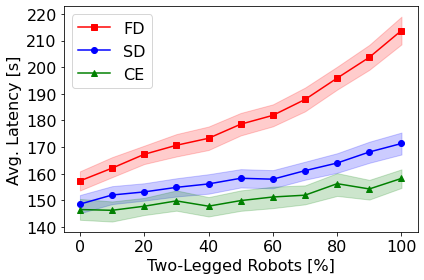

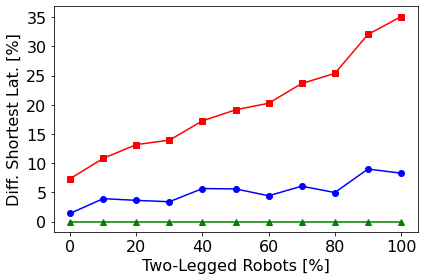

In [36]:
THINK_TIME = 10
POLICY_REFRESH = 300
COMM_COST = 1
ELEV_CAPACITY = 20
N_ROBOT_TOT = 100

#############
## Latency ##
#############

dfCentralTmp = df[(df['comm_same_room']==COMM_COST) & (df['S_changePolicyToOpen']==POLICY_REFRESH) & (df['Z_robot']==THINK_TIME) & (df['elevator_capacity']==ELEV_CAPACITY)]
dfSingleTmp = dfSingle[(dfSingle['comm_same_room']==COMM_COST) & (dfSingle['Z_robot']==THINK_TIME) & (dfSingle['elevator_capacity']==ELEV_CAPACITY)]
dfIndTmp = dfInd[(dfInd['Z_robot']==THINK_TIME) & (dfInd['elevator_capacity']==ELEV_CAPACITY)]

fig, ax1 = plt.subplots()

ax1.plot(dfIndTmp['N_robot_legs']*100/N_ROBOT_TOT, dfIndTmp['R_robot_sys_mean'], color='red', marker='s', label='FD')
ax1.fill_between(dfIndTmp['N_robot_legs']*100/N_ROBOT_TOT, dfIndTmp['R_robot_sys_low'], dfIndTmp['R_robot_sys_up'], color='red', alpha=.2)

ax1.plot(dfSingleTmp['N_robot_legs']*100/N_ROBOT_TOT, dfSingleTmp['R_robot_sys_mean'], color='blue', marker='o', label='SD')
ax1.fill_between(dfSingleTmp['N_robot_legs']*100/N_ROBOT_TOT, dfSingleTmp['R_robot_sys_low'], dfSingleTmp['R_robot_sys_up'], color='blue', alpha=.2)

ax1.plot(dfCentralTmp['N_robot_legs']*100/N_ROBOT_TOT, dfCentralTmp['R_robot_sys_mean'], color='green', marker='^', label='CE')
ax1.fill_between(dfCentralTmp['N_robot_legs']*100/N_ROBOT_TOT, dfCentralTmp['R_robot_sys_low'], dfCentralTmp['R_robot_sys_up'], color='green', alpha=.2)

plt.xlabel('Two-Legged Robots [%]', fontsize=16)
plt.ylabel('Avg. Latency [s]', fontsize=16)
#plt.title('N = '+str(NUM_ROBOT_MAX)+' | Z = '+str(THINK_TIME)+' | Comm. Cost = '+str(COMM_COST)+' | Policy Refresh = '+str(POLICY_REFRESH))
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/varNumRobots/50-50_stairsElevator_varN_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_capacity'+str(ELEV_CAPACITY)+'_lat.pdf')
plt.show()

#############
### Error ###
#############

df1 = dfCentralTmp[['N_robot_legs','R_robot_sys_mean']].set_index('N_robot_legs').reset_index()
df2 = dfSingleTmp[['N_robot_legs','R_robot_sys_mean']].set_index('N_robot_legs').reset_index()
df3 = dfIndTmp[['N_robot_legs','R_robot_sys_mean']].set_index('N_robot_legs').reset_index()

dfTot = df1.join(df2.join(df3, rsuffix='_distr'), lsuffix='_central', rsuffix='_semi')
dfTot.drop(['N_robot_legs_semi', 'N_robot_legs_distr'], axis=1, inplace=True)
dfTot.rename({'N_robot_legs_central':'N_robot_legs'}, inplace=True)

dfTot['min_R_robot_sys_mean'] = dfTot[['R_robot_sys_mean_central', 'R_robot_sys_mean_semi', 'R_robot_sys_mean_distr']].min(axis=1)

dfTot['diffCentralMin'] = abs(dfTot['R_robot_sys_mean_central'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffSemiMin'] = abs(dfTot['R_robot_sys_mean_semi'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']
dfTot['diffDistrMin'] = abs(dfTot['R_robot_sys_mean_distr'] - dfTot['min_R_robot_sys_mean']) / dfTot['min_R_robot_sys_mean']

fig, ax1 = plt.subplots()

ax1.plot(dfCentralTmp['N_robot_legs']*100/N_ROBOT_TOT, dfTot['diffCentralMin']*100, color='green', marker='^', label='CE')
ax1.plot(dfCentralTmp['N_robot_legs']*100/N_ROBOT_TOT, dfTot['diffSemiMin']*100, color='blue', marker='o', label='SD')
ax1.plot(dfCentralTmp['N_robot_legs']*100/N_ROBOT_TOT, dfTot['diffDistrMin']*100, color='red', marker='s', label='FD')

plt.xlabel('Two-Legged Robots [%]', fontsize=16)
plt.ylabel('Diff. Shortest Lat. [%]', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
#plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig('images/varNumRobots/50-50_stairsElevator_varN_Z'+str(THINK_TIME)+'_refresh'+str(POLICY_REFRESH)+'_cost'+str(COMM_COST)+'_capacity'+str(ELEV_CAPACITY)+'_diff.pdf')
plt.show()